In [2]:
import json
from postprocessor_3C import *
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')
import subprocess
import time
from os import makedirs
from os.path import isdir, join

evolution_h2 = {}
evolution_elec = {}
evolution_inter = {}
dictionaries = {}
evolution_ep = {}



C:\Users\jocel\AppData\Local\Temp\ipykernel_36524\2784500447.py:6: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('png', 'pdf')


# Coût import H2 pour base case

In [3]:
# Load json files

h2_cost = [0.075,0.1,0.105,0.125,0.15,0.2,0.3] #,0.2,0.3]
h2_cost = [0.075,0.1,0.105,0.108,0.1125,0.125,0.1375,0.15,0.1625,0.175,0.1875,0.2,0.225,0.25,0.275,0.3]
scenario = 'DAC_cost_h2'
titles = []
for value in h2_cost:
    titles.append(scenario + '_' + str(value))

dictionaries[scenario] = {}
for value in h2_cost:
    
    name_file = '3_clusters_Belgium_'+ scenario + '_' + str(value)
    name_output = name_file
    file_path = 'C:/Users/jocel/Documents/Doctorat/3_clusters/' + name_file + '.json' # path to the json file
    
    with open (file_path, 'r') as myfile:
        data = myfile.read() 
        
    # parse file
    dictionary_3C = json.loads(data)
    dictionaries[scenario][value] = {}
    dictionaries[scenario][value] = dictionary_3C



In [15]:
value = 0.174
h2_cost.append(value)
h2_cost.sort()
scenario = 'DAC_cost_h2'
name_file = '3_clusters_Belgium_'+ scenario + '_' + str(value)
name_output = name_file
file_path = 'C:/Users/jocel/Documents/Doctorat/3_clusters/' + name_file + '.json' # path to the json file

with open (file_path, 'r') as myfile:
    data = myfile.read()

# parse file
dictionary_3C = json.loads(data)
dictionaries[scenario][value] = {}
dictionaries[scenario][value] = dictionary_3C

                         75.0   100.0  105.0   108.0   112.5  125.0   137.5  \
Offshore electrolyser     0.03   0.43   0.57  0.5800  0.5000  0.280  0.1700   
Coastal electrolyser      1.03   2.69   2.91  2.7000  2.7600  3.030  3.2200   
Inland electrolyser       0.00   0.00   0.03  0.0000  0.0000  0.000  0.0000   
Steam methane reformers   0.00   0.00   0.00  2.8432  3.0843  3.457  3.7644   

                          150.0   162.5   174.0   175.0   187.5   200.0  \
Offshore electrolyser    0.1300  0.1000  0.1000  0.1000  0.3300  0.7100   
Coastal electrolyser     3.2300  3.1600  3.0100  2.8900  2.4500  2.1000   
Inland electrolyser      0.0000  0.0000  0.0000  0.0000  0.0000  0.0000   
Steam methane reformers  3.9952  4.1845  4.5587  4.9276  6.1782  6.8951   

                          225.0   250.0   275.0   300.0  
Offshore electrolyser    0.6000  0.3500  0.3900  0.5200  
Coastal electrolyser     1.8500  2.0500  1.9800  1.8600  
Inland electrolyser      0.0000  0.0000  0.0000  0.000

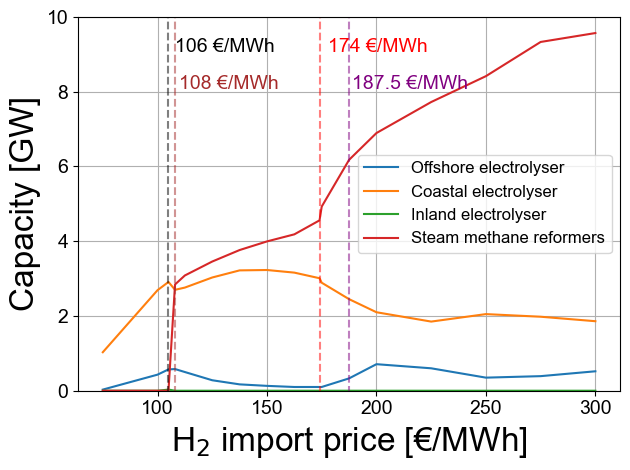

In [88]:
# graph capacities h2

scenario = 'DAC_cost_h2'
clusters = ['OFFSHORE', 'ZEEBRUGGE','INLAND']
element = 'ELECTROLYSIS_PLANTS'
variable = 'new_capacity'

names = dict()

names['OFFSHORE ELECTROLYSIS_PLANTS'] = 'Offshore electrolyser'
names['ZEEBRUGGE ELECTROLYSIS_PLANTS'] = 'Coastal electrolyser'
names['INLAND ELECTROLYSIS_PLANTS'] = 'Inland electrolyser'
names['INLAND SMR'] = 'Steam methane reformers'
evolution_h2[variable] = {}

for cluster in clusters:
    evolution_h2[variable][names[cluster + ' ' +  element]] = {}   
    for value in h2_cost:    
        evolution_h2[variable][names[cluster + ' ' +  element]][value * 1000] = round(get_cluster_element_variable(cluster,element,variable,dictionaries[scenario][value])['values'][0],2)

cluster = 'INLAND'
element = 'SMR'
evolution_h2[variable][names[cluster + ' ' +  element]] = {}  
for value in h2_cost:    
    evolution_h2[variable][names[cluster + ' ' +  element]][value * 1000] = round(get_cluster_element_variable(cluster,element,variable,dictionaries[scenario][value])['values'][0],4)

# Define a function to set the font to match LaTeX
def set_font():
    plt.rc('text', usetex=False)
    plt.rc('font')

# Call the function before creating the plot
set_font()

print(transform_into_table(evolution_h2[variable]))
transform_into_table(evolution_h2[variable]).transpose().plot()
plt.xlabel('H$_2$ import price [€/MWh]', fontsize = 24)
plt.ylabel('Capacity [GW]', fontsize = 24)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
color = 'black'
plt.plot([105]*2,[-5,10],color = color,linestyle='dashed',alpha=0.5)
plt.text(108, 9.2, '106 €/MWh', fontsize=14, ha='left', va='center', color=color)
color = 'brown'
plt.plot([108]*2,[-5000,90000],color = color,linestyle='dashed',alpha=0.5)
plt.text(110, 8.2, '108 €/MWh', fontsize=14, ha='left', va='center', color=color)
color = 'red'
plt.plot([174]*2,[-5000,90000],color = color,linestyle='dashed',alpha=0.5)
plt.text(178, 9.2, '174 €/MWh', fontsize=14, ha='left', va='center', color=color)
color = 'purple'
plt.plot([187.5]*2,[-5000,90000],color = color,linestyle='dashed',alpha=0.5)
plt.text(189, 8.2, '187.5 €/MWh', fontsize=14, ha='left', va='center', color=color)
plt.ylim(0,10)
plt.legend(loc = 'center right', fontsize = 12)
plt.grid(True)
plt.tight_layout()
plt.savefig('C:\\Users\\jocel\\OneDrive\\Doctorat\\My papers\\Impact of wind offshore on the Belgium energy system\\Article\\Images\\' + scenario + '_h2_cap'+ '.pdf',dpi=600)
plt.show()


                                 75.0     100.0    105.0    108.0    112.5  \
OFFSHORE ELECTROLYSIS_PLANTS     67.82  1442.90  1931.35  1916.66  1619.58   
ZEEBRUGGE ELECTROLYSIS_PLANTS  1643.38  4703.79  5104.28  4531.40  4614.72   
INLAND ELECTROLYSIS_PLANTS        0.00     0.00    54.59     0.00     0.00   

                                 125.0    137.5    150.0    162.5    174.0  \
OFFSHORE ELECTROLYSIS_PLANTS    885.86   490.68   320.01   248.04   228.54   
ZEEBRUGGE ELECTROLYSIS_PLANTS  5005.34  5169.21  5204.33  5088.24  4807.91   
INLAND ELECTROLYSIS_PLANTS        0.00     0.00     0.00     0.00     0.00   

                                 175.0    187.5    200.0    225.0    250.0  \
OFFSHORE ELECTROLYSIS_PLANTS    223.79   855.79  1749.78  1476.32   905.39   
ZEEBRUGGE ELECTROLYSIS_PLANTS  4622.57  4127.58  3798.47  3249.66  3622.87   
INLAND ELECTROLYSIS_PLANTS        0.00     0.00     0.00     0.00     0.00   

                                 275.0    300.0  
OFFSHORE EL

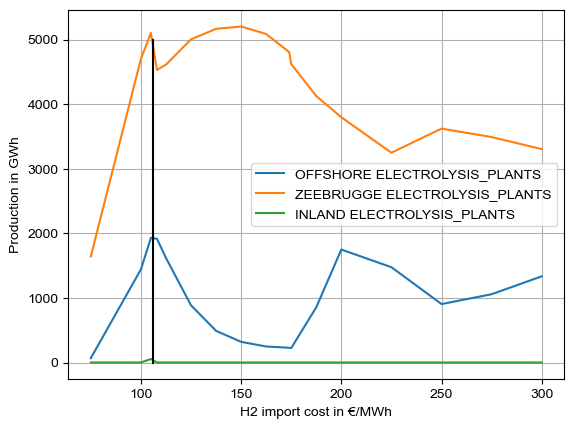

                                 75.0      100.0     105.0     108.0  \
ELECTROLYSIS_PLANTS            1711.20   6146.69   7090.22   6448.06   
INLAND SMR                        0.00      0.00      0.00  24500.09   
INLAND H2_INTERCONNECTION_NL  75970.63  71540.93  70598.75  46740.20   

                                 112.5     125.0     137.5     150.0  \
ELECTROLYSIS_PLANTS            6234.30   5891.20   5659.89   5524.34   
INLAND SMR                    26589.66  29768.06  32340.83  34305.18   
INLAND H2_INTERCONNECTION_NL  44863.92  42027.61  39685.56  37856.47   

                                 162.5     174.0     175.0     187.5  \
ELECTROLYSIS_PLANTS            5336.28   5036.45   4846.36   4983.37   
INLAND SMR                    35898.54  39063.66  42235.62  52168.25   
INLAND H2_INTERCONNECTION_NL  36450.92  33585.31  30603.23  20544.41   

                                 200.0     225.0     250.0     275.0     300.0  
ELECTROLYSIS_PLANTS            5548.25   4725.98   4

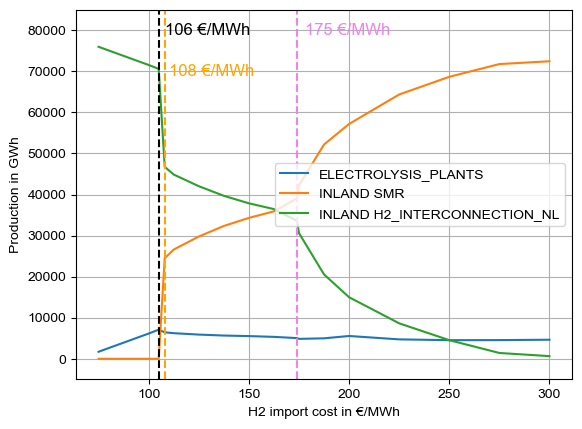

                        75.0      100.0     105.0     108.0     112.5  \
Hydrogen import      75.97063  71.54093  70.59875  46.74020  44.86392   
Hydrogen production   1.71120   6.14669   7.09022  30.94815  32.82396   

                        125.0     137.5     150.0     162.5     174.0  \
Hydrogen import      42.02761  39.68556  37.85647  36.45092  33.58531   
Hydrogen production  35.65926  38.00072  39.82952  41.23482  44.10011   

                        175.0     187.5     200.0     225.0     250.0  \
Hydrogen import      30.60323  20.54441  14.98633   8.63390   4.52970   
Hydrogen production  47.08198  57.15162  62.72613  69.08258  73.18859   

                        275.0     300.0  
Hydrogen import       1.41298   0.64712  
Hydrogen production  76.31542  77.08730  


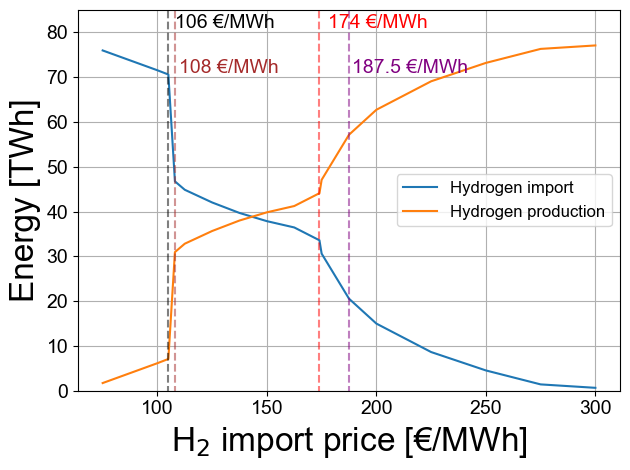

In [89]:
# graph production EP

scenario = 'DAC_cost_h2'
clusters = ['OFFSHORE', 'ZEEBRUGGE','INLAND']
element = 'ELECTROLYSIS_PLANTS'
variable = 'h2_produced'

evolution_ep[variable] = {}

for cluster in clusters:
    evolution_ep[variable][cluster + ' ' +  element] = {}   
    for value in h2_cost:    
        evolution_ep[variable][cluster + ' ' +  element][value * 1000] = round(sum(get_cluster_element_variable(cluster,element,variable,dictionaries[scenario][value])['values']),2)

print(transform_into_table(evolution_ep['h2_produced']))    
transform_into_table(evolution_ep['h2_produced']).transpose().plot()
plt.plot([106]*2,[0,5000],color = 'black')
plt.xlabel('H2 import cost in €/MWh')
plt.ylabel('Production in GWh')
plt.grid(True)
plt.savefig('C:\\Users\\jocel\\OneDrive\\Doctorat\\My papers\\Impact of wind offshore on the Belgium energy system\\Article\\Images\\' + scenario + '_ep_prod'+ '.pdf',dpi=600)
plt.show()

evolution_h2[variable] = {}
evolution_h2[variable]['ELECTROLYSIS_PLANTS'] = {}
for value in h2_cost:
    evolution_h2[variable]['ELECTROLYSIS_PLANTS'][value * 1000] = sum(evolution_ep[variable][i][value * 1000] for i in evolution_ep[variable])

cluster = 'INLAND'
element = 'SMR'
evolution_h2[variable][cluster + ' ' +  element] = {}  
for value in h2_cost:    
    evolution_h2[variable][cluster + ' ' +  element][value * 1000] = round(sum(get_cluster_element_variable(cluster,element,variable,dictionaries[scenario][value])['values']),2)

element = 'H2_INTERCONNECTION_NL'
variable_d = 'imported'
evolution_h2['h2_produced'][cluster + ' ' +  element] = {}  
for value in h2_cost:    
    evolution_h2[variable][cluster + ' ' +  element][value * 1000] = round(sum(get_cluster_element_variable(cluster,element,variable_d,dictionaries[scenario][value])['values']),2)

    

print(transform_into_table(evolution_h2['h2_produced']))    
transform_into_table(evolution_h2['h2_produced']).transpose().plot()
plt.xlabel('H2 import cost in €/MWh')
plt.ylabel('Production in GWh')
color = 'black'
plt.plot([105]*2,[-5000,90000],color = color,linestyle='dashed')
plt.text(108, 80000, '106 €/MWh', fontsize=12, ha='left', va='center', color=color)
color = 'orange'
plt.plot([108]*2,[-5000,90000],color = color,linestyle='dashed')
plt.text(110, 70000, '108 €/MWh', fontsize=12, ha='left', va='center', color=color)
color = 'violet'
plt.plot([174]*2,[-5000,90000],color = color,linestyle='dashed')
plt.text(178, 80000, '175 €/MWh', fontsize=12, ha='left', va='center', color=color)
plt.ylim(-5000, 85000)
plt.grid(True)
plt.legend(loc='center right')
plt.savefig('C:\\Users\\jocel\\OneDrive\\Doctorat\\My papers\\Impact of wind offshore on the Belgium energy system\\Article\\Images\\' + scenario + '_h2_prod'+ '.pdf',dpi=600)
plt.show()

evolution_h2_tot = {}
evolution_h2_tot[variable] = {}
evolution_h2_tot[variable]['Hydrogen import'] = {}
evolution_h2_tot[variable]['Hydrogen production'] = {}
for value in h2_cost:
    evolution_h2_tot[variable]['Hydrogen import'][value * 1000] = evolution_h2[variable]['INLAND H2_INTERCONNECTION_NL'][value * 1000]/1000 
    evolution_h2_tot[variable]['Hydrogen production'][value * 1000] = (evolution_h2[variable]['ELECTROLYSIS_PLANTS'][value * 1000] + evolution_h2[variable]['INLAND SMR'][value * 1000])/1000
    
print(transform_into_table(evolution_h2_tot['h2_produced']))    
transform_into_table(evolution_h2_tot['h2_produced']).transpose().plot()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
color = 'black'
plt.plot([105]*2,[-5000,90000],color = color,linestyle='dashed',alpha=0.5)
plt.text(108, 82, '106 €/MWh', fontsize=14, ha='left', va='center', color=color)
color = 'brown'
plt.plot([108]*2,[-5000,90000],color = color,linestyle='dashed',alpha=0.5)
plt.text(110, 72, '108 €/MWh', fontsize=14, ha='left', va='center', color=color)
color = 'red'
plt.plot([174]*2,[-5000,90000],color = color,linestyle='dashed',alpha=0.5)
plt.text(178, 82, '174 €/MWh', fontsize=14, ha='left', va='center', color=color)
color = 'purple'
plt.plot([187.5]*2,[-5000,90000],color = color,linestyle='dashed',alpha=0.5)
plt.text(189, 72, '187.5 €/MWh', fontsize=14, ha='left', va='center', color=color)
plt.ylim(0,5)
plt.ylim(0, 85)
plt.xlabel('H$_2$ import price [€/MWh]', fontsize = 24)
plt.ylabel('Energy [TWh]', fontsize = 24)
plt.legend(fontsize = 12)
plt.grid(True) 
plt.tight_layout()
plt.savefig('C:\\Users\\jocel\\OneDrive\\Doctorat\\My papers\\Impact of wind offshore on the Belgium energy system\\Article\\Images\\' + scenario + '_h2_tot_prod'+ '.pdf',dpi=600)
plt.show()




## Cost of SMR as pivot point

In [166]:
cost = 0.125
cost_ng_imp = 0.05
cost_ng_smr = 0.05
### cost of electricity
cost_el = 0
# offshore
cluster = 'OFFSHORE'
for node in dictionaries[scenario][cost]['solution']['elements'][cluster]['sub_elements']:
    if 'energy_electricity' in dictionaries[scenario][cost]['model']['nodes'][cluster]['sub_nodes'][node]['parameters']:
        cost_node = 0
        for name in dictionaries[scenario][cost]['solution']['elements'][cluster]['sub_elements'][node]['objectives']['named']:
            cost_name = dictionaries[scenario][cost]['solution']['elements'][cluster]['sub_elements'][node]['objectives']['named'][name]
            cost_node+= cost_name
        cost_el+=cost_node
#         print(node)
#         print(cost_node)
#         print(cost_el)
# Zeebrugge
cluster = 'ZEEBRUGGE'
for node in dictionaries[scenario][cost]['solution']['elements'][cluster]['sub_elements']:
    if 'energy_electricity' in dictionaries[scenario][cost]['model']['nodes'][cluster]['sub_nodes'][node]['parameters']:
        cost_node = 0
        for name in dictionaries[scenario][cost]['solution']['elements'][cluster]['sub_elements'][node]['objectives']['named']:
            cost_name = dictionaries[scenario][cost]['solution']['elements'][cluster]['sub_elements'][node]['objectives']['named'][name]
            cost_node+= cost_name
        cost_el+=cost_node
#         print(node)
#         print(cost_node)
#         print(cost_el)  
# Inland elec
cluster = 'INLAND'
for node in dictionaries[scenario][cost]['solution']['elements'][cluster]['sub_elements']:
    if 'energy_electricity' in dictionaries[scenario][cost]['model']['nodes'][cluster]['sub_nodes'][node]['parameters']:
        cost_node = 0
        for name in dictionaries[scenario][cost]['solution']['elements'][cluster]['sub_elements'][node]['objectives']['named']:
            cost_name = dictionaries[scenario][cost]['solution']['elements'][cluster]['sub_elements'][node]['objectives']['named'][name]
            cost_node+= cost_name
        cost_el+=cost_node
#         print(node)
#         print(cost_node)
#         print(cost_el)    
        
# gaz for CCGT
P_C = sum(get_cluster_element_variable('INLAND','CCGT','e_produced',dictionaries[scenario][cost])['values'])
cost_el+= P_C * cost_ng_imp/0.6
        
# Inland CO_2
cluster = 'INLAND'
for node in dictionaries[scenario][cost]['solution']['elements'][cluster]['sub_elements']:
    if 'energy_carbon_dioxide' in dictionaries[scenario][cost]['model']['nodes'][cluster]['sub_nodes'][node]['parameters']:
        cost_node = 0
        for name in dictionaries[scenario][cost]['solution']['elements'][cluster]['sub_elements'][node]['objectives']['named']:
            cost_name = dictionaries[scenario][cost]['solution']['elements'][cluster]['sub_elements'][node]['objectives']['named'][name]
            cost_node+= cost_name
        cost_el+=cost_node
#         print(node)
#         print(cost_node)
#         print(cost_el)  

# All
for cluster in dictionaries[scenario][cost]['model']['nodes']:
    if 'energy_electricity' in dictionaries[scenario][cost]['model']['nodes'][cluster]['parameters']:
        cost_node = 0
        for name in dictionaries[scenario][cost]['solution']['elements'][cluster]['objectives']['named']:
            cost_name = dictionaries[scenario][cost]['solution']['elements'][cluster]['objectives']['named'][name]
            cost_node+= cost_name
        cost_el+=cost_node
#         print(cluster)
#         print(cost_node)
#         print(cost_el)  

cost_el_MWh = cost_el/129410 * 1000
print(cost_el_MWh)

# cost SMR

K = get_cluster_element_variable('INLAND','SMR','new_capacity',dictionaries[scenario][cost])['values'][0]
P = sum(get_cluster_element_variable('INLAND','SMR','h2_produced',dictionaries[scenario][cost])['values'])
K_P = get_cluster_element_variable('INLAND','PCCC_SMR','new_capacity',dictionaries[scenario][cost])['values'][0] #['values'][0]
P_P = sum(get_cluster_element_variable('INLAND','PCCC_SMR','co2_captured',dictionaries[scenario][cost])['values'])
cost_SMR = (K*(69.077+37.8)+P * (0.17e-3 + cost_ng_smr/0.76) + P * cost_el_MWh/1000 * 0.02 + ((P/0.76) * 0.202 - P_P) * 0.08 + K_P * 297.34 + P_P * 2e-3 + P_P * 0.4125 * cost_el_MWh/1000)/P

print(cost_SMR)
# print(K_P)
# print(P_P)
# print(P_P/(P/0.76 * 0.202))

# # Cost of electricity from CCGT
# K_C =  get_cluster_element_variable('INLAND','CCGT','new_capacity',dictionaries[scenario][cost])['values'][0]
# P_C = sum(get_cluster_element_variable('INLAND','CCGT','e_produced',dictionaries[scenario][cost])['values'])
# y_cap_C = get_cluster_element_parameter('INLAND','CCGT','yearly_capex',dictionaries[scenario][cost])[0]
# fom_C = get_cluster_element_parameter('INLAND','CCGT','fom',dictionaries[scenario][cost])[0]
# vom_C = get_cluster_element_parameter('INLAND','CCGT','vom',dictionaries[scenario][cost])[0]
# K_P_C = get_cluster_element_variable('INLAND','PCCC_CCGT','new_capacity',dictionaries[scenario][cost])['values'][0] #['values'][0]
# P_P_C = sum(get_cluster_element_variable('INLAND','PCCC_CCGT','co2_captured',dictionaries[scenario][cost])['values'])


# cost_CCGT = (K_C * (y_cap_C + fom_C) + P_C * (vom_C + 0.04/0.6) + ((P_C/0.6) * 0.202 - P_P_C) * 0.08 + K_P_C * 297.34 + P_P_C * 2e-3 + P_P_C * 0.4125 * 0.113)/P_C

# print(cost_CCGT)
# print(P_C)
# print(fom_C)



114.37564630554351
0.10280948364256924


                        75.0   100.0  105.0  108.0  112.5  125.0  137.5  \
HVAC lines OFF-ZB        4.54   4.05   3.86   3.84   3.96   4.28   4.45   
HVAC lines ZB-INL        3.54   2.95   2.78   2.73   2.85   3.16   3.49   
H$_2$ pipelines OFF-ZB   0.03   0.43   0.57   0.58   0.50   0.28   0.17   
H$_2$ pipelines ZB-INL   1.06   3.12   3.48   3.28   3.25   3.32   3.39   

                        150.0  162.5  174.0  175.0  187.5  200.0  225.0  \
HVAC lines OFF-ZB        4.52   4.55   4.56   4.56   4.51   4.51   4.52   
HVAC lines ZB-INL        3.71   3.85   3.96   3.95   4.09   4.13   3.73   
H$_2$ pipelines OFF-ZB   0.13   0.10   0.10   0.10   0.33   0.71   0.60   
H$_2$ pipelines ZB-INL   3.35   3.26   3.11   2.99   2.77   2.77   2.45   

                        250.0  275.0  300.0  
HVAC lines OFF-ZB        4.41   4.36   4.38  
HVAC lines ZB-INL        3.62   3.65   3.65  
H$_2$ pipelines OFF-ZB   0.35   0.39   0.52  
H$_2$ pipelines ZB-INL   2.40   2.37   2.38  


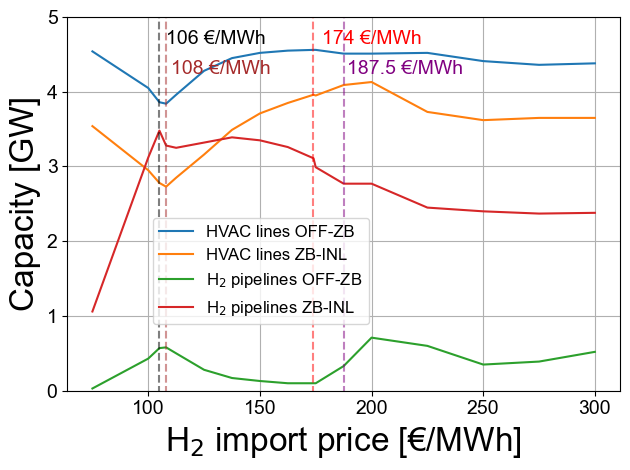

In [90]:
# graph capacities interconnection

scenario = 'DAC_cost_h2'
clusters = ['HV_OFF_ZB','HV_ZB_INL']
variable = 'new_capacity'

names = dict()
names['HV_OFF_ZB'] = 'HVAC lines OFF-ZB'
names['HV_ZB_INL'] = 'HVAC lines ZB-INL'
names['PIPE_H2_OFF_ZB'] = 'H$_2$ pipelines OFF-ZB'
names['PIPE_H2_ZB_INL'] = 'H$_2$ pipelines ZB-INL'

evolution_inter[variable] = {}
for cluster in clusters:
    evolution_inter[variable][names[cluster]] = {}
    for value in h2_cost:
        evolution_inter[variable][names[cluster]][value * 1000] = round(get_cluster_variable(cluster,variable,dictionaries[scenario][value])['values'][0],2)

clusters = ['PIPE_H2_OFF_ZB','PIPE_H2_ZB_INL']
variable = 'new_capacity'
variable_v = 'new_capacity_forward'
for cluster in clusters:
    evolution_inter[variable][names[cluster]] = {}
    for value in h2_cost:
        evolution_inter[variable][names[cluster]][value * 1000] = round(get_cluster_variable(cluster,variable_v,dictionaries[scenario][value])['values'][0],2)

print(transform_into_table(evolution_inter[variable]))
transform_into_table(evolution_inter[variable]).transpose().plot()
color = 'black'
plt.plot([105]*2,[-5,10],color = color,linestyle='dashed',alpha=0.5)
plt.text(108, 4.7, '106 €/MWh', fontsize=14, ha='left', va='center', color=color)
color = 'brown'
plt.plot([108]*2,[-5000,90000],color = color,linestyle='dashed',alpha=0.5)
plt.text(110, 4.3, '108 €/MWh', fontsize=14, ha='left', va='center', color=color)
color = 'red'
plt.plot([174]*2,[-5000,90000],color = color,linestyle='dashed',alpha=0.5)
plt.text(178, 4.7, '174 €/MWh', fontsize=14, ha='left', va='center', color=color)
color = 'purple'
plt.plot([187.5]*2,[-5000,90000],color = color,linestyle='dashed',alpha=0.5)
plt.text(189, 4.3, '187.5 €/MWh', fontsize=14, ha='left', va='center', color=color)
plt.ylim(0,5)
plt.grid(True)
plt.xlabel('H$_2$ import price [€/MWh]', fontsize = 24)
plt.ylabel('Capacity [GW]', fontsize = 24)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize = 12,loc='center', bbox_to_anchor=(0.35, 0.32))
plt.tight_layout()
plt.savefig('C:\\Users\\jocel\\OneDrive\\Doctorat\\My papers\\Impact of wind offshore on the Belgium energy system\\Article\\Images\\' + scenario + '_inter_cap'+ '.pdf',dpi=600)
plt.show()

                        75.0   100.0  105.0  108.0  112.5  125.0  137.5  \
INLAND PV               28.32  30.03  30.14  30.98  32.36  36.00  39.49   
INLAND CCGT             11.91  12.26  12.38  12.40  12.34  12.07  11.74   
INLAND WIND_ONSHORE      9.00   9.00   9.00   9.00   9.00   9.00   9.00   
OFFSHORE WIND_OFFSHORE   8.00   8.00   8.00   8.00   8.00   8.00   8.00   

                        150.0  162.5  164.8  170.0  173.0  174.0  175.0  \
INLAND PV               42.62  45.27  45.88  47.28  48.17  48.43  48.43   
INLAND CCGT             11.55  11.38  11.35  11.30  11.19  11.16  11.16   
INLAND WIND_ONSHORE      9.00   9.00   9.00   9.00   9.00   9.00   9.00   
OFFSHORE WIND_OFFSHORE   8.00   8.00   8.00   8.00   8.00   8.00   8.00   

                        187.5  200.0  225.0  250.0  275.0  300.0  
INLAND PV               50.00   50.0  50.00  50.00  50.00  50.00  
INLAND CCGT             10.96   10.8  10.69  10.67  10.72  10.74  
INLAND WIND_ONSHORE      9.00    9.0   9.00   9

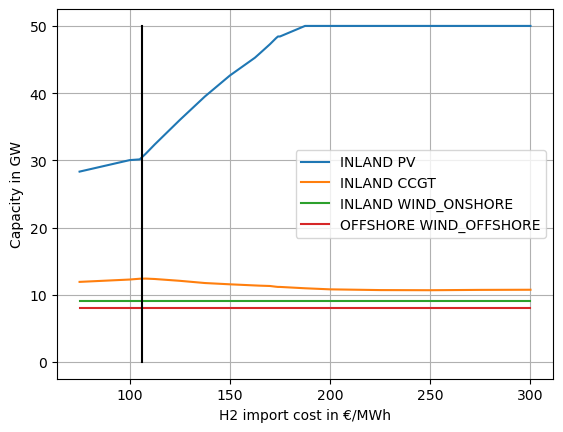

In [168]:
# graph capacities elec

scenario = 'DAC_cost_h2'
cluster = 'INLAND'
elements = ['PV','CCGT','WIND_ONSHORE']
variable = 'new_capacity'

evolution_elec = {}
evolution_elec[variable] = {}

for element in elements:
    evolution_elec[variable][cluster + ' ' +  element] = {}   
    for value in h2_cost:    
        evolution_elec[variable][cluster + ' ' +  element][value * 1000] = round(get_cluster_element_variable(cluster,element,variable,dictionaries[scenario][value])['values'][0],2)

cluster = 'OFFSHORE'
element = 'WIND_OFFSHORE'
evolution_elec[variable][cluster + ' ' +  element] = {} 
for value in h2_cost:
    evolution_elec[variable][cluster + ' ' +  element][value * 1000] = round(get_cluster_element_variable(cluster,element,variable,dictionaries[scenario][value])['values'][0],2)

print(transform_into_table(evolution_elec[variable]))
transform_into_table(evolution_elec[variable]).transpose().plot()
plt.xlabel('H2 import cost in €/MWh')
plt.ylabel('Capacity in GW')
plt.plot([106]*2,[0,50],color = 'black')
plt.grid(True)
plt.savefig('C:\\Users\\jocel\\OneDrive\\Doctorat\\My papers\\Impact of wind offshore on the Belgium energy system\\Article\\Images\\' + scenario + '_elec_cap'+ '.pdf',dpi=600)
plt.show()


                           75.0      100.0     105.0     108.0     112.5  \
PV Panels               28.73474  30.42015  30.52085  31.23138  32.35250   
CCGT                    61.32334  63.31557  64.36242  67.48926  66.52521   
Onshore Wind turbines   17.79384  17.73138  17.72257  17.66495  17.56285   
Offshore Wind turbines  26.78630  27.88198  27.98418  28.03341  28.06863   

                           125.0     137.5     150.0     162.5     174.0  \
PV Panels               35.04476  37.36042  39.21477  40.66356  42.26320   
CCGT                    63.98190  61.88295  60.34256  59.04826  57.20807   
Onshore Wind turbines   17.33569  17.13795  16.96021  16.81882  16.65972   
Offshore Wind turbines  28.21256  28.37538  28.42953  28.44967  28.45608   

                           175.0     187.5     200.0     225.0     250.0  \
PV Panels               42.26414  43.05164  43.11091  43.15408  43.16005   
CCGT                    56.39217  54.17097  53.82310  52.75946  52.63820   
Onshore Wi

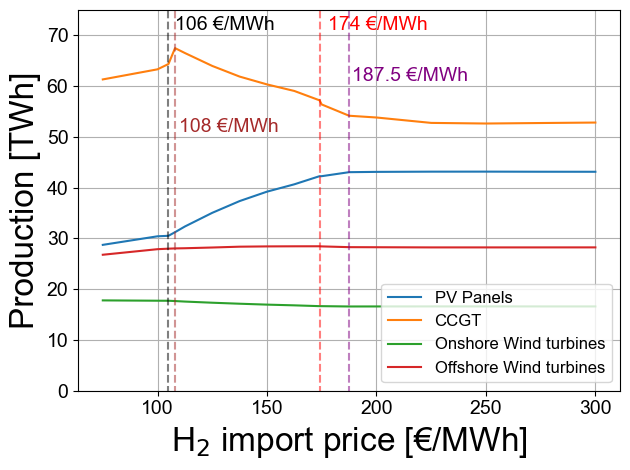

In [121]:
# graph elec production

scenario = 'DAC_cost_h2'
cluster = 'INLAND'
elements = ['PV','CCGT','WIND_ONSHORE']
variable = 'e_produced'

names = dict()
names['INLAND PV'] = 'PV Panels'
names['INLAND CCGT'] = 'CCGT'
names['INLAND WIND_ONSHORE'] = 'Onshore Wind turbines'
names['OFFSHORE WIND_OFFSHORE'] = 'Offshore Wind turbines'
evolution_elec[variable] = {}
for element in elements:
    evolution_elec[variable][names[cluster + ' ' +  element]] = {}   
    for value in h2_cost:    
        evolution_elec[variable][names[cluster + ' ' +  element]][value * 1000] = round(sum(get_cluster_element_variable(cluster,element,variable,dictionaries[scenario][value])['values']),2)/1000

cluster = 'OFFSHORE'
element = 'WIND_OFFSHORE'
evolution_elec[variable][names[cluster + ' ' +  element]] = {} 
for value in h2_cost:
    evolution_elec[variable][names[cluster + ' ' +  element]][value * 1000] = round(sum(get_cluster_element_variable(cluster,element,variable,dictionaries[scenario][value])['values']),2)/1000        

print(transform_into_table(evolution_elec[variable]))
transform_into_table(evolution_elec['e_produced']).transpose().plot()
plt.xlabel('H$_2$ import price [€/MWh]',fontsize=24)
plt.ylabel('Production [TWh]',fontsize=24)
color = 'black'
plt.plot([105]*2,[-5000,90],color = color,linestyle='dashed',alpha=0.5)
plt.text(108, 72, '106 €/MWh', fontsize=14, ha='left', va='center', color=color)
color = 'brown'
plt.plot([108]*2,[-5000,90000],color = color,linestyle='dashed',alpha=0.5)
plt.text(110, 52, '108 €/MWh', fontsize=14, ha='left', va='center', color=color)
color = 'red'
plt.plot([174]*2,[-5000,90000],color = color,linestyle='dashed',alpha=0.5)
plt.text(178, 72, '174 €/MWh', fontsize=14, ha='left', va='center', color=color)
color = 'purple'
plt.plot([187.5]*2,[-5000,90000],color = color,linestyle='dashed',alpha=0.5)
plt.text(189, 62, '187.5 €/MWh', fontsize=14, ha='left', va='center', color=color)
plt.ylim(0, 75)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize = 12, loc = 'lower right')
plt.tight_layout()
plt.grid(True)
plt.savefig('C:\\Users\\jocel\\OneDrive\\Doctorat\\My papers\\Impact of wind offshore on the Belgium energy system\\Article\\Images\\' + scenario + '_elec_prod' + '.pdf',dpi=600)
plt.show()

                      75.0      100.0    105.0     108.0     112.5     125.0  \
INLAND CO2_EXPORT  21758.44  22429.16  22781.6  30346.17  30576.99  30565.53   

                     137.5    150.0     162.5     164.8     170.0     173.0  \
INLAND CO2_EXPORT  30542.7  30546.2  30533.95  30533.29  30530.37  30520.23   

                      174.0    175.0     187.5     200.0     225.0     250.0  \
INLAND CO2_EXPORT  30517.35  30519.8  30503.37  30482.18  30475.19  30456.51   

                     275.0     300.0  
INLAND CO2_EXPORT  30473.3  30475.35  


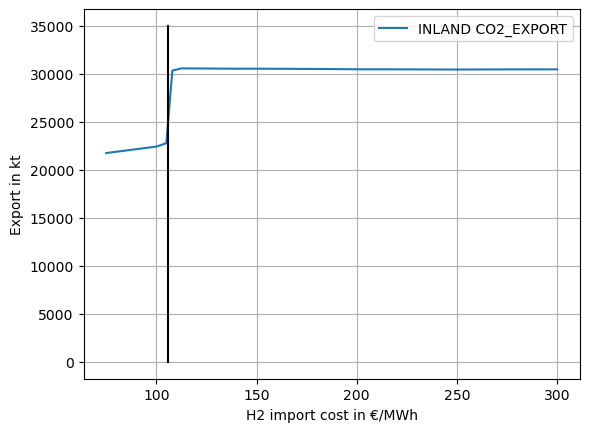

In [170]:
# CO2 export

scenario = 'DAC_cost_h2'
cluster = 'INLAND'
elements = ['CO2_EXPORT']
variable = 'exported'

evolution_elec[variable] = {}
for element in elements:
    evolution_elec[variable][cluster + ' ' +  element] = {}   
    for value in h2_cost:    
        evolution_elec[variable][cluster + ' ' +  element][value * 1000] = round(sum(get_cluster_element_variable(cluster,element,variable,dictionaries[scenario][value])['values']),2)

transform_into_table(evolution_elec['exported']).transpose().plot()
print(transform_into_table(evolution_elec['exported']))
plt.plot([106]*2,[0,35000],color = 'black')
plt.xlabel('H2 import cost in €/MWh')
plt.ylabel('Export in kt')
plt.grid(True)
plt.savefig('C:\\Users\\jocel\\OneDrive\\Doctorat\\My papers\\Impact of wind offshore on the Belgium energy system\\Article\\Images\\' + scenario + '_co2_exp' + '.pdf',dpi=600)
plt.show()

                     75.0      100.0     105.0     108.0     112.5     125.0  \
INLAND PCCC_CCGT  18093.88  18751.12  19067.73  20039.35  19764.16  19000.27   
INLAND PCCC_SMR       0.00      0.00      0.00   5860.68   6360.53   7120.83   
INLAND DAC         3664.56   3678.04   3713.87   4446.14   4452.30   4444.42   

                     137.5     150.0     162.5     164.8     170.0     173.0  \
INLAND PCCC_CCGT  18347.47  17885.61  17493.12  17417.19  17237.19  17055.36   
INLAND PCCC_SMR    7736.27   8206.16   8587.31   8664.10   8844.44   9019.28   
INLAND DAC         4458.96   4454.43   4453.52   4452.00   4448.74   4445.59   

                     174.0     175.0     187.5     200.0     225.0     250.0  \
INLAND PCCC_CCGT  16939.78  16692.55  16000.04  15536.24  14060.44  13484.31   
INLAND PCCC_SMR    9344.44  10103.20  12479.19  13677.55  15380.39  15931.01   
INLAND DAC         4233.12   3724.05   2024.13   1268.39   1034.36   1041.20   

                     275.0     300.0 

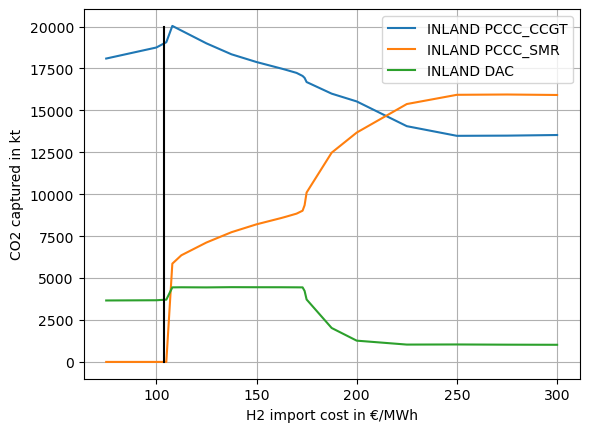

In [171]:
# Capture de CO2

scenario = 'DAC_cost_h2'
cluster = 'INLAND'
elements = ['PCCC_CCGT','PCCC_SMR','DAC']
variable = 'co2_captured'

evolution_elec[variable] = {}
for element in elements:
    evolution_elec[variable][cluster + ' ' +  element] = {}   
    for value in h2_cost:    
        evolution_elec[variable][cluster + ' ' +  element][value * 1000] = round(sum(get_cluster_element_variable(cluster,element,variable,dictionaries[scenario][value])['values']),2)

transform_into_table(evolution_elec['co2_captured']).transpose().plot()
print(transform_into_table(evolution_elec['co2_captured']))
plt.plot([104]*2,[0,20000],color = 'black')
plt.xlabel('H2 import cost in €/MWh')
plt.ylabel('CO2 captured in kt')
plt.grid(True)
plt.savefig('C:\\Users\\jocel\\OneDrive\\Doctorat\\My papers\\Impact of wind offshore on the Belgium energy system\\Article\\Images\\' + scenario + '_co2_capt' + '.pdf',dpi=600)
plt.show()

                      0.0750  0.1000  0.1050  0.1080  0.1125  0.1250  0.1375  \
OFFSHORE H2_STORAGE      0.0     0.0     0.0     0.0     0.0     0.0     0.0   
ZEEBRUGGE H2_STORAGE     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
INLAND H2_STORAGE        0.0     0.0     0.0     0.0     0.0     0.0     0.0   

                      0.1500  0.1625  0.1648  0.1700  0.1730  0.1740  0.1750  \
OFFSHORE H2_STORAGE      0.0     0.0     0.0     0.0     0.0     0.0     0.0   
ZEEBRUGGE H2_STORAGE     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
INLAND H2_STORAGE        0.0     0.0     0.0     0.0     0.0     0.0     0.0   

                      0.1875  0.2000  0.2250  0.2500  0.2750  0.3000  
OFFSHORE H2_STORAGE     0.00    0.83    0.34    0.00    0.00   -0.00  
ZEEBRUGGE H2_STORAGE    0.00    2.48    0.40    0.00    0.00    0.00  
INLAND H2_STORAGE       6.06    8.63   11.82   10.58   13.03   15.65  


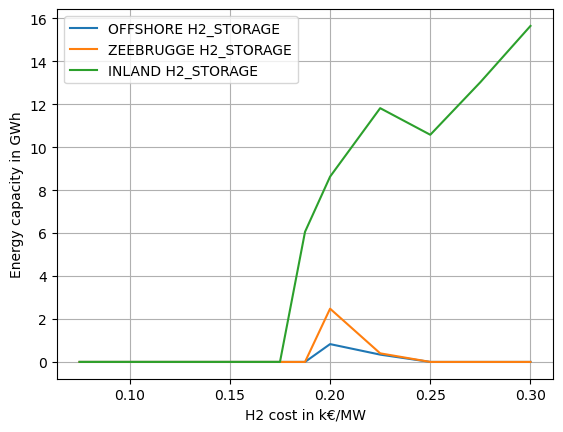

In [172]:
# stockages

scenario = 'DAC_cost_h2'
cluster = 'OFFSHORE'
elements = ['H2_STORAGE']
variable = 'new_energy_capacity'

evolution_elec[variable] = {}
for element in elements:
    evolution_elec[variable][cluster + ' ' +  element] = {}   
    for value in h2_cost:    
        evolution_elec[variable][cluster + ' ' +  element][value] = round(sum(get_cluster_element_variable(cluster,element,variable,dictionaries[scenario][value])['values']),2)

cluster = 'ZEEBRUGGE'
#elements = ['BATTERIES','H2_STORAGE']

for element in elements:
    evolution_elec[variable][cluster + ' ' +  element] = {}   
    for value in h2_cost:    
        evolution_elec[variable][cluster + ' ' +  element][value] = round(sum(get_cluster_element_variable(cluster,element,variable,dictionaries[scenario][value])['values']),2)

cluster = 'INLAND'
#elements = ['BATTERIES','H2_STORAGE']

for element in elements:
    evolution_elec[variable][cluster + ' ' +  element] = {}   
    for value in h2_cost:    
        evolution_elec[variable][cluster + ' ' +  element][value] = round(sum(get_cluster_element_variable(cluster,element,variable,dictionaries[scenario][value])['values']),2)

transform_into_table(evolution_elec[variable]).transpose().plot()
print(transform_into_table(evolution_elec[variable]))
plt.xlabel('H2 cost in k€/MW')
plt.ylabel('Energy capacity in GWh')
plt.grid(True)
plt.savefig('C:\\Users\\jocel\\OneDrive\\Doctorat\\My papers\\Impact of wind offshore on the Belgium energy system\\Article\\Images\\' + scenario + '_sto_h2' + '.pdf',dpi=600)
plt.show()

                     0.0750  0.1000  0.1050  0.1080  0.1125  0.1250  0.1375  \
OFFSHORE BATTERIES     1.14    0.62    0.60    0.69    0.62    0.34    0.19   
ZEEBRUGGE BATTERIES   10.36    4.99    3.89    5.69    7.14   10.83   12.93   
INLAND BATTERIES      16.25   12.33    9.81    8.36   10.74   14.08   18.15   
INLAND CO2_STORAGE     0.00    0.00    0.00  100.00  100.00  100.00  100.00   

                     0.1500  0.1625  0.1648  0.1700  0.1730  0.1740  0.1750  \
OFFSHORE BATTERIES     0.14    0.10    0.10    0.10    0.09    0.09    0.09   
ZEEBRUGGE BATTERIES   15.64   17.99   18.17   19.12   20.61   20.93   21.95   
INLAND BATTERIES      19.96   22.90   23.85   24.51   24.64   24.92   25.06   
INLAND CO2_STORAGE   100.00  100.00  100.00  100.00  100.00  100.00  100.00   

                     0.1875  0.2000  0.2250  0.2500  0.2750  0.3000  
OFFSHORE BATTERIES     0.37    0.70    0.57    0.32    0.39    0.65  
ZEEBRUGGE BATTERIES   23.86   23.17   28.38   29.80   29.90   29.67 

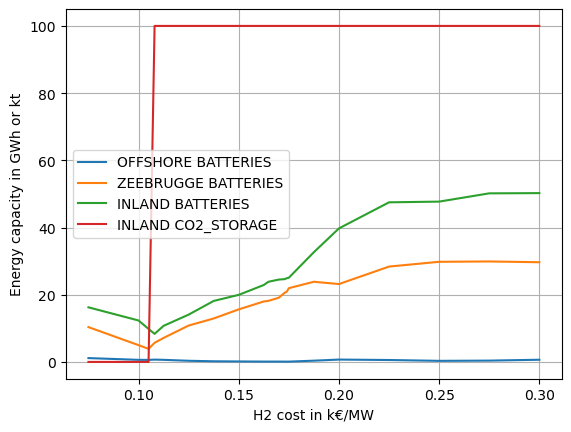

In [173]:
# stockages

scenario = 'DAC_cost_h2'
cluster = 'OFFSHORE'
elements = ['BATTERIES']
variable = 'new_energy_capacity'

evolution_elec[variable] = {}
for element in elements:
    evolution_elec[variable][cluster + ' ' +  element] = {}   
    for value in h2_cost:    
        evolution_elec[variable][cluster + ' ' +  element][value] = round(sum(get_cluster_element_variable(cluster,element,variable,dictionaries[scenario][value])['values']),2)

cluster = 'ZEEBRUGGE'
#elements = ['BATTERIES','H2_STORAGE']

for element in elements:
    evolution_elec[variable][cluster + ' ' +  element] = {}   
    for value in h2_cost:    
        evolution_elec[variable][cluster + ' ' +  element][value] = round(sum(get_cluster_element_variable(cluster,element,variable,dictionaries[scenario][value])['values']),2)

cluster = 'INLAND'
elements = ['BATTERIES','CO2_STORAGE']

for element in elements:
    evolution_elec[variable][cluster + ' ' +  element] = {}   
    for value in h2_cost:    
        evolution_elec[variable][cluster + ' ' +  element][value] = round(sum(get_cluster_element_variable(cluster,element,variable,dictionaries[scenario][value])['values']),2)

transform_into_table(evolution_elec[variable]).transpose().plot()
print(transform_into_table(evolution_elec[variable]))
plt.xlabel('H2 cost in k€/MW')
plt.ylabel('Energy capacity in GWh or kt')
plt.grid(True)
plt.savefig('C:\\Users\\jocel\\OneDrive\\Doctorat\\My papers\\Impact of wind offshore on the Belgium energy system\\Article\\Images\\' + scenario + '_batt' + '.pdf',dpi=600)
plt.show()

        75.0   100.0  105.0  108.0  112.5  125.0  137.5  150.0  162.5  164.8  \
e_ens    9.38   9.61  10.32    8.1   5.56   5.64   8.63   8.55   7.73   7.13   
h2_ens   0.00   0.00   0.00    0.0   0.00   0.00   0.00   0.00   0.00   0.00   
ng_ens   0.00   0.00   0.00    0.0   0.00   0.00   0.00   0.00   0.00   0.00   

        170.0  173.0  174.0  175.0  187.5  200.0  225.0  250.0  275.0  300.0  
e_ens    7.09   9.03   9.39   8.18   6.35   7.31   0.22    0.0    0.0   4.16  
h2_ens   0.00   0.00   0.00   0.00   0.00   0.00   0.00    0.0    0.0   0.00  
ng_ens   0.00   0.00   0.00   0.00   0.00   0.00   0.00    0.0    0.0   0.00  


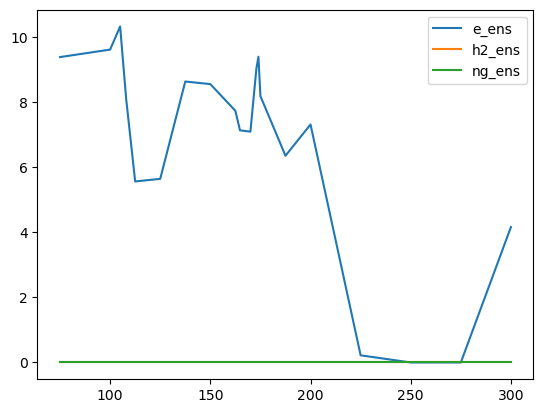

In [174]:
# energy not served

scenario = 'DAC_cost_h2'
cluster = 'INLAND'
variables = ['e_ens','h2_ens','ng_ens']

evolution_ens = {}
for variable in variables:
    evolution_ens[variable] = {}
    for value in h2_cost:
        evolution_ens[variable][value * 1000] = round(sum(get_cluster_variable(cluster,variable,dictionaries[scenario][value])['values']),2)
        
transform_into_table(evolution_ens).transpose().plot()
print(transform_into_table(evolution_ens))

                             75.0      100.0     105.0     108.0     112.5  \
Synthetic methane import   0.00000   0.00000   0.00000   0.00000   0.00000   
NV natural gas import      0.00000   0.00047   0.00284   0.14123   0.18012   
UK natural gas import      0.00000   0.00000   0.00000   0.00000   0.00000   
NL natural gas import      0.00000   0.00000   0.00000   0.00000   0.00000   
DE natural gas import     29.00371  31.76179  33.19625  68.05097  69.15479   
Carbon dioxide export     21.75844  22.42916  22.78160  30.34617  30.57699   

                             125.0     137.5     150.0     162.5     174.0  \
Synthetic methane import   0.00000   0.00000   0.00000   0.00000   1.17984   
NV natural gas import      0.17076   0.15962   0.17080   0.13122   0.05504   
UK natural gas import      0.00000   0.00000   0.00000   0.00000   0.00000   
NL natural gas import      0.00000   0.00000   0.00000   0.00000   0.00000   
DE natural gas import     69.10741  69.00551  69.01169  68.9905

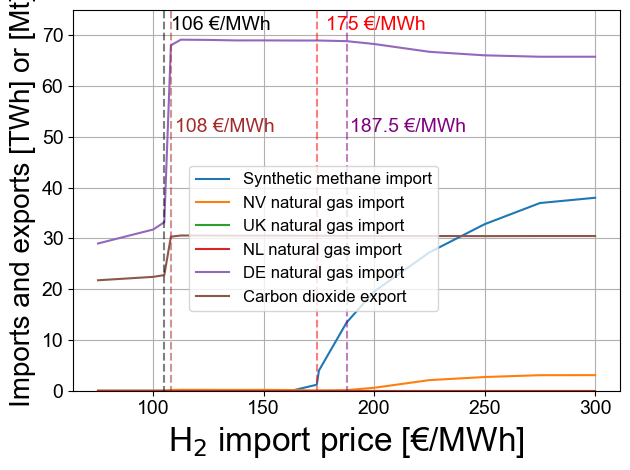

In [138]:
# import gas

scenario = 'DAC_cost_h2'
cluster = 'ZEEBRUGGE'
elements = ['REGAS_GREEN','NG_INTERCONNECTION_NV','NG_INTERCONNECTION_UK']
variable = 'imported'

names = dict()
names['ZEEBRUGGE REGAS_GREEN'] = 'Synthetic methane import'
names['ZEEBRUGGE NG_INTERCONNECTION_NV'] = 'NV natural gas import'
names['ZEEBRUGGE NG_INTERCONNECTION_UK'] = 'UK natural gas import'
names['INLAND NG_INTERCONNECTION_DE'] = 'DE natural gas import'
names['INLAND NG_INTERCONNECTION_NL'] = 'NL natural gas import'
names['INLAND CO2_EXPORT'] = 'Carbon dioxide export'




evolution_elec[variable] = {}
for element in elements:
    evolution_elec[variable][names[cluster + ' ' +  element]] = {}   
    for value in h2_cost:    
        evolution_elec[variable][names[cluster + ' ' +  element]][value * 1000] = round(sum(get_cluster_element_variable(cluster,element,variable,dictionaries[scenario][value])['values']),2)/1000

cluster = 'INLAND'
elements = ['NG_INTERCONNECTION_NL','NG_INTERCONNECTION_DE']
for element in elements:
    evolution_elec[variable][names[cluster + ' ' +  element]] = {}   
    for value in h2_cost:    
        evolution_elec[variable][names[cluster + ' ' +  element]][value * 1000] = round(sum(get_cluster_element_variable(cluster,element,variable,dictionaries[scenario][value])['values']),2)/1000

        
cluster = 'INLAND'
elements = ['CO2_EXPORT']
variable_v = 'exported'

for element in elements:
    evolution_elec[variable][names[cluster + ' ' +  element]] = {}   
    for value in h2_cost:    
        evolution_elec[variable][names[cluster + ' ' +  element]][value * 1000] = round(sum(get_cluster_element_variable(cluster,element,variable_v,dictionaries[scenario][value])['values']),2)/1000

transform_into_table(evolution_elec[variable]).transpose().plot()
print(transform_into_table(evolution_elec[variable]))
plt.xlabel('H$_2$ import price [€/MWh]', fontsize = 24)
plt.ylabel('Imports and exports [TWh] or [Mt]', fontsize = 20)
color = 'black'
plt.plot([105]*2,[-5000,90000],color = color,linestyle='dashed',alpha=0.5)
plt.text(108, 72, '106 €/MWh', fontsize=14, ha='left', va='center', color=color)
color = 'brown'
plt.plot([108]*2,[-5000,90000],color = color,linestyle='dashed',alpha=0.5)
plt.text(110, 52, '108 €/MWh', fontsize=14, ha='left', va='center', color=color)
color = 'red'
plt.plot([174]*2,[-5000,90000],color = color,linestyle='dashed',alpha=0.5)
plt.text(178, 72, '175 €/MWh', fontsize=14, ha='left', va='center', color=color)
color = 'purple'
plt.plot([187.5]*2,[-5000,90000],color = color,linestyle='dashed',alpha=0.5)
plt.text(189, 52, '187.5 €/MWh', fontsize=14, ha='left', va='center', color=color)
#plt.xlim(70,350)
plt.ylim(0, 75)
plt.grid(True)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize = 12, loc = 'center', bbox_to_anchor=(0.44, 0.4))
plt.tight_layout()
plt.savefig('C:\\Users\\jocel\\OneDrive\\Doctorat\\My papers\\Impact of wind offshore on the Belgium energy system\\Article\\Images\\' + scenario + '_ng_imp' + '.pdf',dpi=600)
plt.show()

                75.0       100.0      105.0     108.0      112.5      125.0  \
Total cost  20.400714  22.244626  22.599882  22.78069  22.985825  23.528452   

                137.5     150.0      162.5      174.0      175.0      187.5  \
Total cost  24.039008  24.52374  24.988053  25.397959  25.430167  25.729047   

                200.0      225.0      250.0      275.0      300.0  
Total cost  25.943466  26.230003  26.406901  26.472161  26.494259  


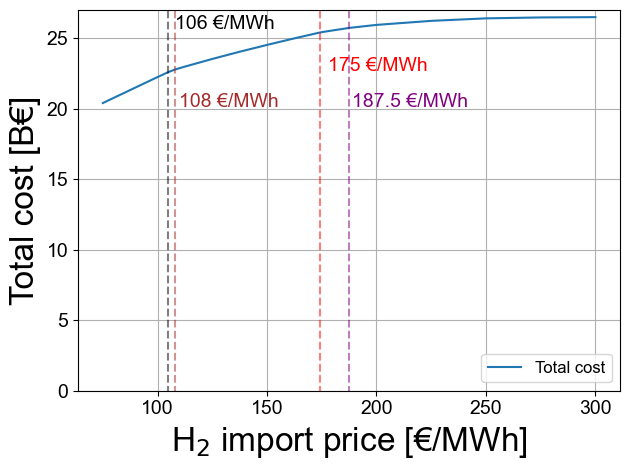

In [137]:
# Objective cost

scenario = 'DAC_cost_h2'
objectives = dict()
costs = dict()
costs['Total cost'] = dict()
NG_dem = ['demand_ng_heat','demand_ng_industry','demand_ng_transport','demand_ng_transport2']
cost_NG_dem_dict = get_total_value_of_global_parameters(NG_dem,dictionaries[scenario][0.075])
cost_NG_dem = sum(cost_NG_dem_dict[i]['Total value'] for i in cost_NG_dem_dict) * 0.202 * 0.08
load_shed = ['LOAD_SHEDDING_1','LOAD_SHEDDING_2','LOAD_SHEDDING_4','LOAD_SHEDDING_8','LOAD_SHEDDING_UNLIM']
cost_lsd = sum(get_cluster_element_parameter('INLAND',i,'yearly_existing_cost',dictionaries[scenario][0.075])[0] for i in load_shed)
#print(cost_NG_dem)
for value in h2_cost:
    objectives[value] = dictionaries[scenario][value]['solution']['objective']
    cost_HV_OZ = get_cluster_parameter('HV_OFF_ZB','yearly_existing_cost',dictionaries[scenario][value])[0]
    cost_HV_ZI = get_cluster_parameter('HV_ZB_INL','yearly_existing_cost',dictionaries[scenario][value])[0]
    cost_NG_pipe = get_cluster_parameter('PIPE_NG_ZB_INL','yearly_existing_cost',dictionaries[scenario][value])[0]
    cost_PH = get_cluster_element_parameter('INLAND','PUMPED_HYDRO','yearly_existing_cost',dictionaries[scenario][value])[0]
    cost_NG_sto = get_cluster_element_parameter('INLAND','NG_STORAGE','yearly_existing_cost',dictionaries[scenario][value])[0]
    costs['Total cost'][value * 1000] = (objectives[value] + cost_HV_OZ + cost_HV_ZI + cost_NG_pipe + cost_NG_dem + cost_PH + cost_NG_sto + cost_lsd)/1000
    
print(transform_into_table(costs))
transform_into_table(costs).transpose().plot()
plt.xlabel('H$_2$ import price [€/MWh]', fontsize = 24)
plt.ylabel('Total cost [B€]', fontsize = 24)
color = 'black'
plt.plot([105]*2,[-5000,90000],color = color,linestyle='dashed',alpha=0.5)
plt.text(108, 26, '106 €/MWh', fontsize=14, ha='left', va='center', color=color)
color = 'brown'
plt.plot([108]*2,[-5000,90000],color = color,linestyle='dashed',alpha=0.5)
plt.text(110, 20.5, '108 €/MWh', fontsize=14, ha='left', va='center', color=color)
color = 'red'
plt.plot([174]*2,[-5000,90000],color = color,linestyle='dashed',alpha=0.5)
plt.text(178, 23, '175 €/MWh', fontsize=14, ha='left', va='center', color=color)
color = 'purple'
plt.plot([187.5]*2,[-5000,90000],color = color,linestyle='dashed',alpha=0.5)
plt.text(189, 20.5, '187.5 €/MWh', fontsize=14, ha='left', va='center', color=color)
#plt.xlim(70,350)
plt.ylim(0, 27)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize = 12)
plt.grid(True)
plt.tight_layout()
plt.savefig('C:\\Users\\jocel\\OneDrive\\Doctorat\\My papers\\Impact of wind offshore on the Belgium energy system\\Article\\Images\\' + scenario + '_obj' + '.pdf',dpi=600)
plt.show()

# Distance Offshore Zeebrugge pour base case

In [55]:
# Load json files

h2_cost = [40,50,60,70,80,90,100,120,150,200,500,750,1000]
scenario = 'DC_off_zb'
titles = []
for value in h2_cost:
    titles.append(scenario + '_' + str(value))

dictionaries = {}
dictionaries[scenario] = {}
for value in h2_cost:
    
    name_file = '3_clusters_Belgium_'+ scenario + '_' + str(value)
    name_output = name_file
    file_path = 'C:/Users/jocel/Documents/Doctorat/3_clusters/' + name_file + '.json' # path to the json file
    
    with open (file_path, 'r') as myfile:
        data = myfile.read()
        
    # parse file
    dictionary_3C = json.loads(data)
    dictionaries[scenario][value] = {}
    dictionaries[scenario][value] = dictionary_3C

                 40         50         60         70         80         90    \
Total cost  20.412715  20.446248  20.474443  20.502237  20.529682  20.558759   

                 100        120        150        200        500        750   \
Total cost  20.565103  20.577775  20.596718  20.628083  20.810507  20.946584   

                 1000  
Total cost  21.047537  


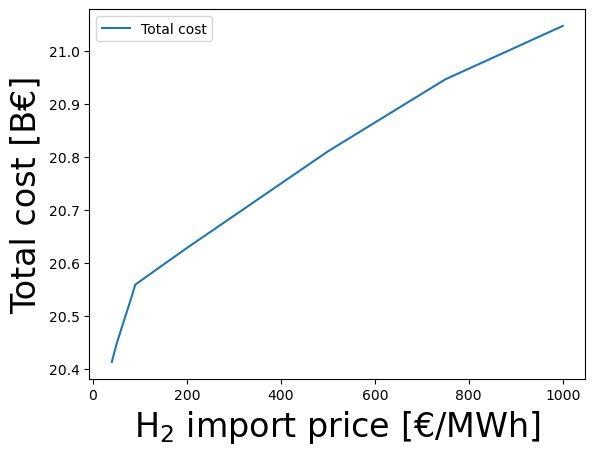

In [57]:
# Objective cost

scenario = 'DC_off_zb'
objectives = dict()
costs = dict()
costs['Total cost'] = dict()
NG_dem = ['demand_ng_heat','demand_ng_industry','demand_ng_transport','demand_ng_transport2']
cost_NG_dem_dict = get_total_value_of_global_parameters(NG_dem,dictionaries[scenario][h2_cost[0]])
cost_NG_dem = sum(cost_NG_dem_dict[i]['Total value'] for i in cost_NG_dem_dict) * 0.202 * 0.08
load_shed = ['LOAD_SHEDDING_1','LOAD_SHEDDING_2','LOAD_SHEDDING_4','LOAD_SHEDDING_8','LOAD_SHEDDING_UNLIM']
cost_lsd = sum(get_cluster_element_parameter('INLAND',i,'yearly_existing_cost',dictionaries[scenario][h2_cost[0]])[0] for i in load_shed)
#print(cost_NG_dem)
for value in h2_cost:
    objectives[value] = dictionaries[scenario][value]['solution']['objective']
    cost_HV_OZ = get_cluster_parameter('HV_OFF_ZB','yearly_existing_cost',dictionaries[scenario][value])[0]
    cost_HV_ZI = get_cluster_parameter('HV_ZB_INL','yearly_existing_cost',dictionaries[scenario][value])[0]
    cost_NG_pipe = get_cluster_parameter('PIPE_NG_ZB_INL','yearly_existing_cost',dictionaries[scenario][value])[0]
    cost_PH = get_cluster_element_parameter('INLAND','PUMPED_HYDRO','yearly_existing_cost',dictionaries[scenario][value])[0]
    cost_NG_sto = get_cluster_element_parameter('INLAND','NG_STORAGE','yearly_existing_cost',dictionaries[scenario][value])[0]
    costs['Total cost'][value] = (objectives[value] + cost_HV_OZ + cost_HV_ZI + cost_NG_pipe + cost_NG_dem + cost_PH + cost_NG_sto + cost_lsd)/1000

print(transform_into_table(costs))
transform_into_table(costs).transpose().plot()
plt.xlabel('H$_2$ import price [€/MWh]', fontsize = 24)
plt.ylabel('Total cost [B€]', fontsize = 24)
plt.savefig('C:\\Users\\jocel\\OneDrive\\Doctorat\\My papers\\Impact of wind offshore on the Belgium energy system\\Article\\Images\\' + scenario + '_obj' + '.pdf',dpi=600)
plt.show()
    

                               40    50    60    70    80    90    100   120   \
OFFSHORE ELECTROLYSIS_PLANTS   0.04  0.08  0.16  0.22  0.28  0.58  0.59  0.60   
ZEEBRUGGE ELECTROLYSIS_PLANTS  1.01  0.97  0.89  0.84  0.79  0.56  0.56  0.54   

                               150   200   500   750   1000  
OFFSHORE ELECTROLYSIS_PLANTS   0.64  0.69  1.10  0.82  0.44  
ZEEBRUGGE ELECTROLYSIS_PLANTS  0.50  0.44  0.03  0.00  0.00  


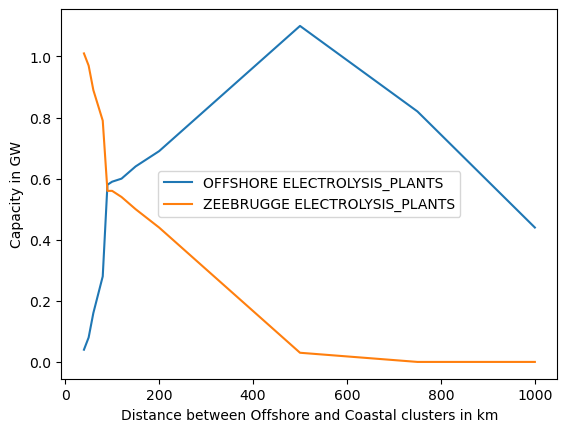

In [59]:
# graph capacities h2

scenario = 'DC_off_zb'
clusters = ['OFFSHORE', 'ZEEBRUGGE']
element = 'ELECTROLYSIS_PLANTS'
variable = 'new_capacity'

evolution_h2 = {}
evolution_h2[variable] = {}

for cluster in clusters:
    evolution_h2[variable][cluster + ' ' +  element] = {}   
    for value in h2_cost:    
        evolution_h2[variable][cluster + ' ' +  element][value] = round(get_cluster_element_variable(cluster,element,variable,dictionaries[scenario][value])['values'][0],2)

print(transform_into_table(evolution_h2[variable]))
transform_into_table(evolution_h2[variable]).transpose().plot()
plt.xlabel('Distance between Offshore and Coastal clusters in km')
plt.ylabel('Capacity in GW')
plt.savefig('C:\\Users\\jocel\\OneDrive\\Doctorat\\My papers\\Impact of wind offshore on the Belgium energy system\\Article\\Images\\' + scenario + '_h2_cap'+ '.pdf',dpi=600)
plt.show()

                            40       50       60      70       80       90    \
Offshore electrolysers   0.11011  0.21582  0.41653  0.5985  0.75900  1.57266   
Zeebrugge electrolysers  1.61023  1.53800  1.40090  1.3033  1.23147  0.86657   
Inland electrolysers     0.00000  0.00000  0.00000  0.0000  0.00000  0.00000   

                            100      120      150      200      500      750   \
Offshore electrolysers   1.60726  1.63214  1.72151  1.89719  3.21973  2.39693   
Zeebrugge electrolysers  0.85125  0.82746  0.76955  0.67621  0.05143  0.00000   
Inland electrolysers     0.00000  0.00000  0.00000  0.00000  0.00000  0.00000   

                            1000  
Offshore electrolysers   1.27102  
Zeebrugge electrolysers  0.00000  
Inland electrolysers     0.00000  


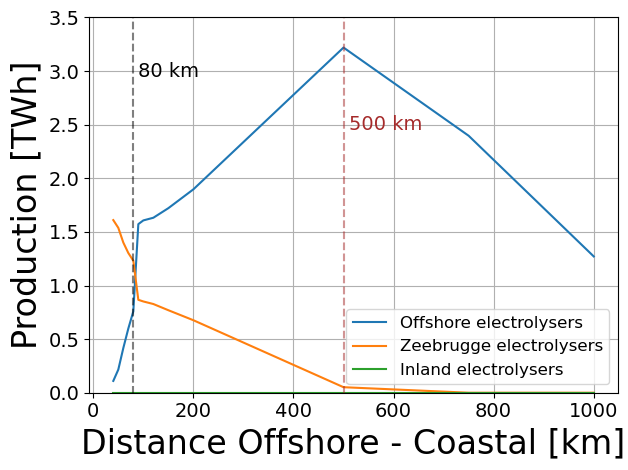

                                     40           50           60    \
ELECTROLYSIS_PLANTS               1.72034      1.75382      1.81743   
INLAND SMR                        0.00000      0.00000      0.00000   
INLAND H2_INTERCONNECTION_NL  75961.54000  75928.24000  75865.00000   

                                    70           80           90    \
ELECTROLYSIS_PLANTS               1.9018      1.99047      2.43923   
INLAND SMR                        0.0000      0.00000      0.00000   
INLAND H2_INTERCONNECTION_NL  75781.0900  75692.92000  75246.39000   

                                     100         120          150   \
ELECTROLYSIS_PLANTS               2.45851      2.4596      2.49106   
INLAND SMR                        0.00000      0.0000      0.00000   
INLAND H2_INTERCONNECTION_NL  75227.56000  75227.2400  75197.19000   

                                    200          500          750   \
ELECTROLYSIS_PLANTS               2.5734      3.27116      2.39693   
INLAND SMR   

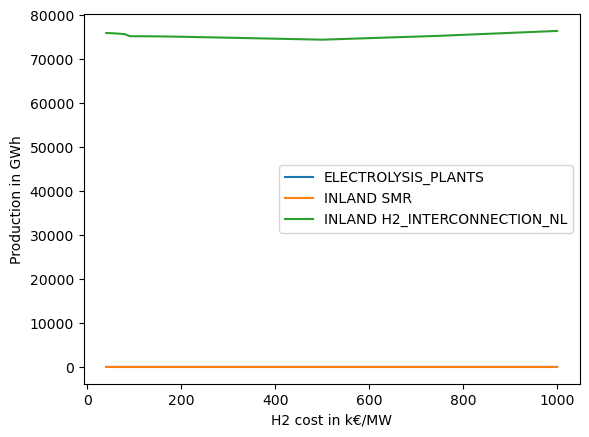

                            40           50           60          70    \
Hydrogen import      75961.54000  75928.24000  75865.00000  75781.0900   
Hydrogen production      1.72034      1.75382      1.81743      1.9018   

                            80           90           100         120   \
Hydrogen import      75692.92000  75246.39000  75227.56000  75227.2400   
Hydrogen production      1.99047      2.43923      2.45851      2.4596   

                            150         200          500          750   \
Hydrogen import      75197.19000  75117.6000  74447.60000  75325.06000   
Hydrogen production      2.49106      2.5734      3.27116      2.39693   

                            1000  
Hydrogen import      76438.23000  
Hydrogen production      1.27102  


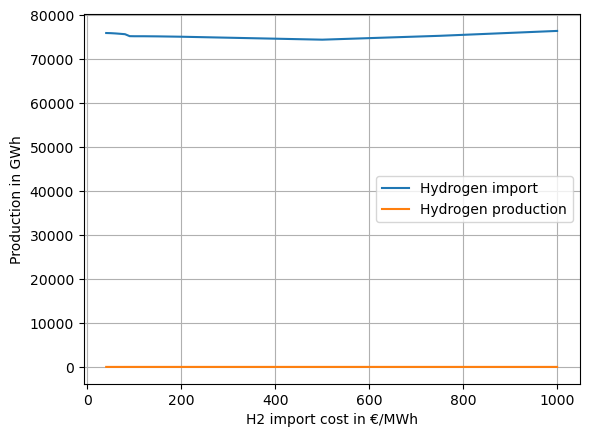

In [60]:
# graph production h2

scenario = 'DC_off_zb'
clusters = ['OFFSHORE', 'ZEEBRUGGE','INLAND']
element = 'ELECTROLYSIS_PLANTS'
variable = 'h2_produced'
names = dict()
names['OFFSHORE ELECTROLYSIS_PLANTS'] = 'Offshore electrolysers'
names['ZEEBRUGGE ELECTROLYSIS_PLANTS'] = 'Zeebrugge electrolysers'
names['INLAND ELECTROLYSIS_PLANTS'] = 'Inland electrolysers'

evolution_ep[variable] = {}

for cluster in clusters:
    evolution_ep[variable][names[cluster + ' ' +  element]] = {}   
    for value in h2_cost:    
        evolution_ep[variable][names[cluster + ' ' +  element]][value] = round(sum(get_cluster_element_variable(cluster,element,variable,dictionaries[scenario][value])['values']),2)/1000

print(transform_into_table(evolution_ep['h2_produced']))    
transform_into_table(evolution_ep['h2_produced']).transpose().plot()
color = 'black'
plt.plot([80]*2,[-5000,90000],color = color,linestyle='dashed',alpha=0.5)
plt.text(90, 3, '80 km', fontsize=14, ha='left', va='center', color=color)
color = 'brown'
plt.plot([500]*2,[-5000,90000],color = color,linestyle='dashed',alpha=0.5)
plt.text(510, 2.5, '500 km', fontsize=14, ha='left', va='center', color=color)
plt.ylim(0, 3.5)
plt.xlabel('Distance Offshore - Coastal [km]', fontsize = 24)
plt.ylabel('Production [TWh]', fontsize = 24)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize = 12)
plt.grid(True)
plt.tight_layout()
plt.savefig('C:\\Users\\jocel\\OneDrive\\Doctorat\\My papers\\Impact of wind offshore on the Belgium energy system\\Article\\Images\\' + scenario + '_ep_prod'+ '.pdf',dpi=600)
plt.show()

evolution_h2[variable] = {}
evolution_h2[variable]['ELECTROLYSIS_PLANTS'] = {}
for value in h2_cost:
    evolution_h2[variable]['ELECTROLYSIS_PLANTS'][value] = sum(evolution_ep[variable][i][value] for i in evolution_ep[variable])

cluster = 'INLAND'
element = 'SMR'
evolution_h2[variable][cluster + ' ' +  element] = {}  
for value in h2_cost:    
    evolution_h2[variable][cluster + ' ' +  element][value] = round(sum(get_cluster_element_variable(cluster,element,variable,dictionaries[scenario][value])['values']),2)

element = 'H2_INTERCONNECTION_NL'
variable_d = 'imported'
evolution_h2['h2_produced'][cluster + ' ' +  element] = {}  
for value in h2_cost:    
    evolution_h2[variable][cluster + ' ' +  element][value] = round(sum(get_cluster_element_variable(cluster,element,variable_d,dictionaries[scenario][value])['values']),2)

    

print(transform_into_table(evolution_h2['h2_produced']))    
transform_into_table(evolution_h2['h2_produced']).transpose().plot()
plt.xlabel('H2 cost in k€/MW')
plt.ylabel('Production in GWh')
plt.savefig('C:\\Users\\jocel\\OneDrive\\Doctorat\\My papers\\Impact of wind offshore on the Belgium energy system\\Article\\Images\\' + scenario + '_h2_prod'+ '.pdf',dpi=600)
plt.show()

evolution_h2_tot = {}
evolution_h2_tot[variable] = {}
evolution_h2_tot[variable]['Hydrogen import'] = {}
evolution_h2_tot[variable]['Hydrogen production'] = {}
for value in h2_cost:
    evolution_h2_tot[variable]['Hydrogen import'][value] = evolution_h2[variable]['INLAND H2_INTERCONNECTION_NL'][value] 
    evolution_h2_tot[variable]['Hydrogen production'][value] = evolution_h2[variable]['ELECTROLYSIS_PLANTS'][value] + evolution_h2[variable]['INLAND SMR'][value]
    
print(transform_into_table(evolution_h2_tot['h2_produced']))    
transform_into_table(evolution_h2_tot['h2_produced']).transpose().plot()
plt.xlabel('H2 import cost in €/MWh')
plt.ylabel('Production in GWh')
plt.grid(True) 
plt.savefig('C:\\Users\\jocel\\OneDrive\\Doctorat\\My papers\\Impact of wind offshore on the Belgium energy system\\Article\\Images\\' + scenario + '_h2_tot_prod'+ '.pdf',dpi=600)
plt.show()

                40    50    60    70    80    90    100   120   150   200   \
HV_OFF_ZB       6.82  6.90  6.79  6.69  6.61  5.96  5.94  5.92  5.87  5.79   
HV_ZB_INL       3.53  3.50  3.45  3.37  3.29  3.27  3.27  3.25  3.23  3.19   
PIPE_H2_OFF_ZB  0.04  0.08  0.16  0.22  0.28  0.58  0.59  0.60  0.64  0.69   
PIPE_H2_ZB_INL  1.06  1.06  1.05  1.06  1.07  1.15  1.15  1.14  1.14  1.13   

                500   750   1000  
HV_OFF_ZB       5.18  4.11  2.87  
HV_ZB_INL       2.97  2.14  1.22  
PIPE_H2_OFF_ZB  1.10  0.82  0.44  
PIPE_H2_ZB_INL  1.12  0.81  0.43  


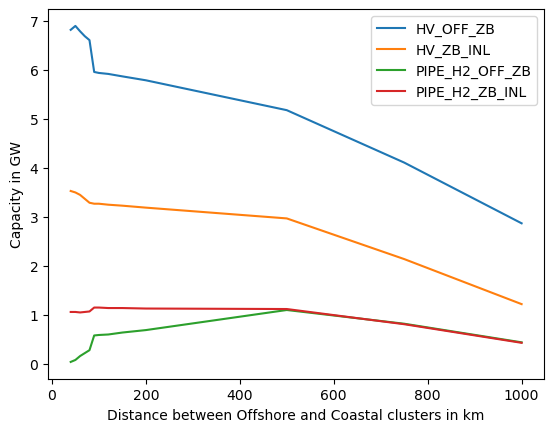

In [62]:
# graph capacities interconnection
scenario = 'DC_off_zb'
clusters = ['HV_OFF_ZB','HV_ZB_INL']
variable = 'new_capacity'
evolution_inter[variable] = {}
for cluster in clusters:
    evolution_inter[variable][cluster] = {}
    for value in h2_cost:
        evolution_inter[variable][cluster][value] = round(get_cluster_variable(cluster,variable,dictionaries[scenario][value])['values'][0],2)

clusters = ['PIPE_H2_OFF_ZB','PIPE_H2_ZB_INL']
variable = 'new_capacity'
variable_v = 'new_capacity_forward'
for cluster in clusters:
    evolution_inter[variable][cluster] = {}
    for value in h2_cost:
        evolution_inter[variable][cluster][value] = round(get_cluster_variable(cluster,variable_v,dictionaries[scenario][value])['values'][0],2)

print(transform_into_table(evolution_inter[variable]))
transform_into_table(evolution_inter[variable]).transpose().plot()
plt.xlabel('Distance between Offshore and Coastal clusters in km')
plt.ylabel('Capacity in GW')
plt.savefig('C:\\Users\\jocel\\OneDrive\\Doctorat\\My papers\\Impact of wind offshore on the Belgium energy system\\Article\\Images\\' + scenario + '_inter_cap'+ '.pdf',dpi=600)
plt.show()

                    50        60        70        80        120       200   \
HV_OFF_ZB       25018.09  24987.62  24999.34  24985.38  24884.19  24575.11   
HV_ZB_INL       29383.70  29360.99  29326.51  29308.64  29231.19  29030.33   
PIPE_H2_OFF_ZB   1530.52   1554.70   1531.93   1542.62   1632.14   1897.19   
PIPE_H2_ZB_INL   2401.46   2405.35   2415.68   2422.89   2455.29   2565.05   

                    500       750       1000  
HV_OFF_ZB       23059.39  18545.71  12955.17  
HV_ZB_INL       27905.93  23547.08  18252.76  
PIPE_H2_OFF_ZB   3219.74   2396.73   1271.02  
PIPE_H2_ZB_INL   3235.75   2357.18   1243.06  


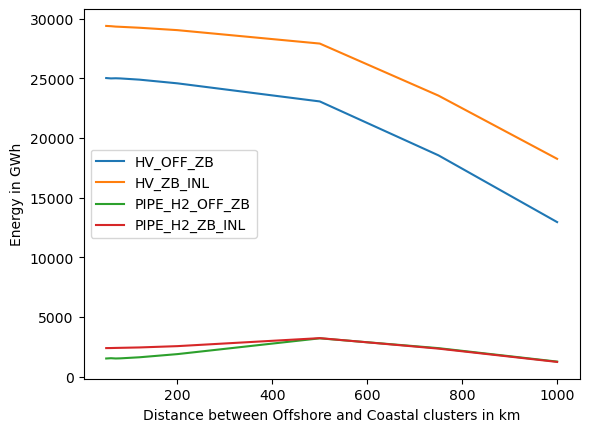

In [69]:
# graph energy interconnection
scenario = 'DC_off_zb'
clusters = ['HV_OFF_ZB','HV_ZB_INL']
variable = 'e_forward_in'
evolution_inter[variable] = {}
for cluster in clusters:
    evolution_inter[variable][cluster] = {}
    for value in h2_cost:
        evolution_inter[variable][cluster][value] = round(sum(get_cluster_variable(cluster,variable,dictionaries[scenario][value])['values']),2)

clusters = ['PIPE_H2_OFF_ZB','PIPE_H2_ZB_INL']
variable = 'e_forward_in'
variable_v = 'flow_forward_in'
for cluster in clusters:
    evolution_inter[variable][cluster] = {}
    for value in h2_cost:
        evolution_inter[variable][cluster][value] = round(sum(get_cluster_variable(cluster,variable_v,dictionaries[scenario][value])['values']),2)

print(transform_into_table(evolution_inter[variable]))
transform_into_table(evolution_inter[variable]).transpose().plot()
plt.xlabel('Distance between Offshore and Coastal clusters in km')
plt.ylabel('Energy in GWh')
plt.savefig('C:\\Users\\jocel\\OneDrive\\Doctorat\\My papers\\Impact of wind offshore on the Belgium energy system\\Article\\Images\\' + scenario + '_inter_ener'+ '.pdf',dpi=600)
plt.show()

In [75]:
# graph cost interconnection

scenario = 'DC_off_zb'
clusters = ['HV_OFF_ZB','PIPE_H2_OFF_ZB']
objectives = ['fix_cost','var_cost']
evolution_obj = dict()
evolution_obj['costs'] = dict()

for cluster in clusters:
    evolution_obj['costs'][cluster] = {}
    for value in h2_cost:
        total = 0
        for objective in objectives:
            total += get_cluster_objective(cluster, objective,dictionaries[scenario][value])
        evolution_obj['costs'][cluster][value] = total
        #print(total)
        
        
cluster = 'OFFSHORE'
element = 'WIND_OFFSHORE'
evolution_obj['costs'][element] = dict()
for value in h2_cost:
        total = 0
        for objective in objectives:
            total += get_objective_element(cluster,element,objective,dictionaries[scenario][value])
        evolution_obj['costs'][element][value] = total

print(transform_into_table(evolution_obj['costs']))



                       50           60           70           80    \
HV_OFF_ZB        438.781179   443.301130   448.183023   453.069807   
PIPE_H2_OFF_ZB     1.225002     1.490062     1.681982     1.929894   
WIND_OFFSHORE   1635.997164  1635.995546  1635.993698  1635.993639   

                       120          200          500          750         1000  
HV_OFF_ZB        470.544705   502.030559   589.061849   559.795637  455.269735  
PIPE_H2_OFF_ZB     3.045201     5.802868    23.023940    25.863682   18.502751  
WIND_OFFSHORE   1635.992428  1635.992204  1635.989346  1291.549454  867.898406  


                      50     60     70     80     120    200    500    750   \
OFFSHORE BATTERIES   12.86  12.92  12.77  12.76  13.64  14.56  17.81  14.22   
ZEEBRUGGE BATTERIES   4.43   4.30   4.21   4.19   3.81   3.75   2.19   2.87   
INLAND BATTERIES     12.83  12.88  13.08  13.10  12.69  12.01  11.73  10.54   
INLAND CO2_STORAGE    0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   

                     1000  
OFFSHORE BATTERIES   8.74  
ZEEBRUGGE BATTERIES  4.13  
INLAND BATTERIES     7.73  
INLAND CO2_STORAGE   6.39  


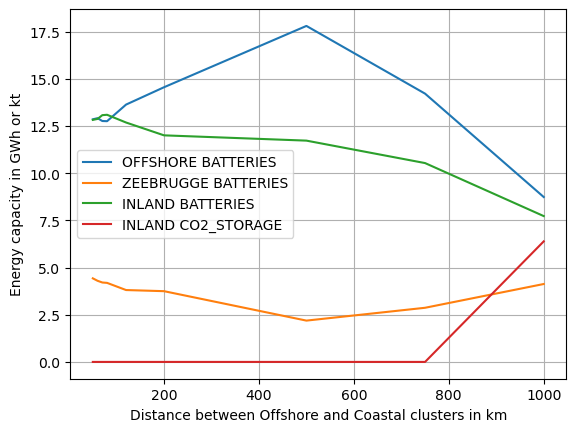

In [53]:
# batteries 

scenario = 'DC_off_zb'
cluster = 'OFFSHORE'
elements = ['BATTERIES']
variable = 'new_energy_capacity'

evolution_elec[variable] = {}
for element in elements:
    evolution_elec[variable][cluster + ' ' +  element] = {}   
    for value in h2_cost:    
        evolution_elec[variable][cluster + ' ' +  element][value] = round(sum(get_cluster_element_variable(cluster,element,variable,dictionaries[scenario][value])['values']),2)

cluster = 'ZEEBRUGGE'
#elements = ['BATTERIES','H2_STORAGE']

for element in elements:
    evolution_elec[variable][cluster + ' ' +  element] = {}   
    for value in h2_cost:    
        evolution_elec[variable][cluster + ' ' +  element][value] = round(sum(get_cluster_element_variable(cluster,element,variable,dictionaries[scenario][value])['values']),2)

cluster = 'INLAND'
elements = ['BATTERIES','CO2_STORAGE']

for element in elements:
    evolution_elec[variable][cluster + ' ' +  element] = {}   
    for value in h2_cost:    
        evolution_elec[variable][cluster + ' ' +  element][value] = round(sum(get_cluster_element_variable(cluster,element,variable,dictionaries[scenario][value])['values']),2)

transform_into_table(evolution_elec[variable]).transpose().plot()
print(transform_into_table(evolution_elec[variable]))
plt.xlabel('Distance between Offshore and Coastal clusters in km')
plt.ylabel('Energy capacity in GWh or kt')
plt.grid(True)
plt.savefig('C:\\Users\\jocel\\OneDrive\\Doctorat\\My papers\\Impact of wind offshore on the Belgium energy system\\Article\\Images\\' + scenario + '_batt' + '.pdf',dpi=600)
plt.show()

                      40    50    60    70    80    90    100   120   200   \
OFFSHORE H2_STORAGE    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
ZEEBRUGGE H2_STORAGE   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
INLAND H2_STORAGE      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   

                      500   750   1000  
OFFSHORE H2_STORAGE    0.0   0.0   0.0  
ZEEBRUGGE H2_STORAGE   0.0   0.0   0.0  
INLAND H2_STORAGE      0.0   0.0   0.0  


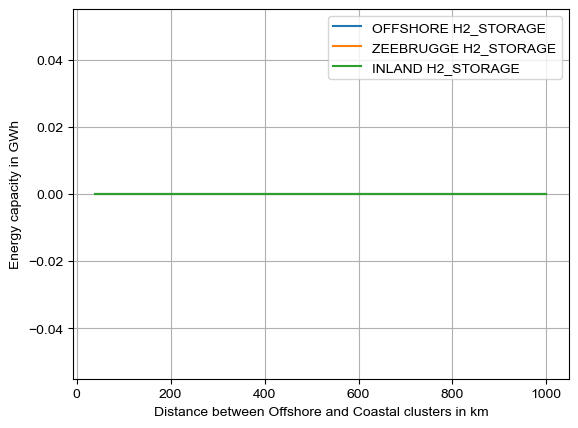

In [191]:
# h2 storage

scenario = 'DC_off_zb'
cluster = 'OFFSHORE'
elements = ['H2_STORAGE']
variable = 'new_energy_capacity'

evolution_elec[variable] = {}
for element in elements:
    evolution_elec[variable][cluster + ' ' +  element] = {}   
    for value in h2_cost:    
        evolution_elec[variable][cluster + ' ' +  element][value] = round(sum(get_cluster_element_variable(cluster,element,variable,dictionaries[scenario][value])['values']),2)

cluster = 'ZEEBRUGGE'
#elements = ['BATTERIES','H2_STORAGE']

for element in elements:
    evolution_elec[variable][cluster + ' ' +  element] = {}   
    for value in h2_cost:    
        evolution_elec[variable][cluster + ' ' +  element][value] = round(sum(get_cluster_element_variable(cluster,element,variable,dictionaries[scenario][value])['values']),2)

cluster = 'INLAND'
#elements = ['BATTERIES','CO2_STORAGE']

for element in elements:
    evolution_elec[variable][cluster + ' ' +  element] = {}   
    for value in h2_cost:    
        evolution_elec[variable][cluster + ' ' +  element][value] = round(sum(get_cluster_element_variable(cluster,element,variable,dictionaries[scenario][value])['values']),2)

transform_into_table(evolution_elec[variable]).transpose().plot()
print(transform_into_table(evolution_elec[variable]))
plt.xlabel('Distance between Offshore and Coastal clusters in km')
plt.ylabel('Energy capacity in GWh')
plt.grid(True)
plt.savefig('C:\\Users\\jocel\\OneDrive\\Doctorat\\My papers\\Impact of wind offshore on the Belgium energy system\\Article\\Images\\' + scenario + '_h2_sto' + '.pdf',dpi=600)
plt.show()

                         40     50     60     70     80     90     100   \
INLAND PV               28.31  28.31  28.32  28.28  28.24  28.27  28.29   
INLAND CCGT             11.91  11.91  11.91  11.91  11.91  11.76  11.76   
INLAND WIND_ONSHORE      9.00   9.00   9.00   9.00   9.00   9.00   9.00   
OFFSHORE WIND_OFFSHORE   8.00   8.00   8.00   8.00   8.00   8.00   8.00   

                         120    200    500    750    1000  
INLAND PV               28.27  28.35  28.36  28.55  28.49  
INLAND CCGT             11.76  11.74  11.87  12.28  12.65  
INLAND WIND_ONSHORE      9.00   9.00   9.00   9.00   9.00  
OFFSHORE WIND_OFFSHORE   8.00   8.00   8.00   6.32   4.24  


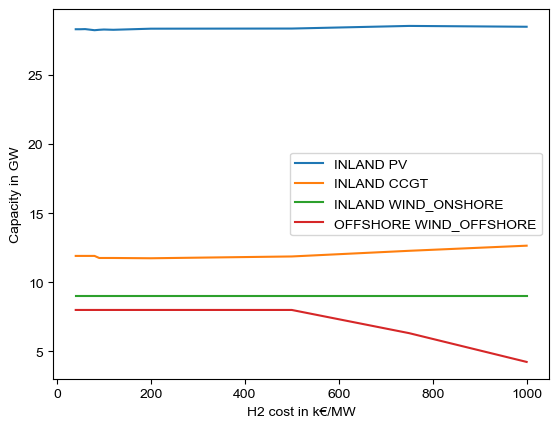

In [192]:
# graph capacities elec

scenario = 'DC_off_zb'
cluster = 'INLAND'
elements = ['PV','CCGT','WIND_ONSHORE']
variable = 'new_capacity'

evolution_elec = {}
evolution_elec[variable] = {}

for element in elements:
    evolution_elec[variable][cluster + ' ' +  element] = {}   
    for value in h2_cost:    
        evolution_elec[variable][cluster + ' ' +  element][value] = round(get_cluster_element_variable(cluster,element,variable,dictionaries[scenario][value])['values'][0],2)

        
cluster = 'OFFSHORE'
elements = ['WIND_OFFSHORE']


for element in elements:
    evolution_elec[variable][cluster + ' ' +  element] = {}   
    for value in h2_cost:    
        evolution_elec[variable][cluster + ' ' +  element][value] = round(get_cluster_element_variable(cluster,element,variable,dictionaries[scenario][value])['values'][0],2)

print(transform_into_table(evolution_elec[variable]))
transform_into_table(evolution_elec[variable]).transpose().plot()
plt.xlabel('H2 cost in k€/MW')
plt.ylabel('Capacity in GW')
plt.savefig('C:\\Users\\jocel\\OneDrive\\Doctorat\\My papers\\Impact of wind offshore on the Belgium energy system\\Article\\Images\\' + scenario + '_elec_cap'+ '.pdf',dpi=600)
plt.show()

                            40        50        60        70        80    \
PV Panels               28.72787  28.72986  28.73953  28.71305  28.67871   
CCGT                    61.33948  61.36296  61.44261  61.54556  61.64710   
Onshore Wind turbines   17.79421  17.79489  17.79580  17.80031  17.80537   
Offshore Wind turbines  26.78203  26.78040  26.77270  26.77635  26.78383   

                            90        100       120       150       200   \
PV Panels               28.74147  28.75827  28.74171  28.76940  28.81987   
CCGT                    60.91220  60.92406  60.95839  60.99375  61.08516   
Onshore Wind turbines   17.81817  17.81728  17.81844  17.81733  17.81361   
Offshore Wind turbines  26.81419  26.81580  26.81173  26.81235  26.81115   

                            500       750       1000  
PV Panels               28.83044  28.85229  28.57259  
CCGT                    62.16161  66.75727  72.73558  
Onshore Wind turbines   17.81195  17.73312  17.62574  
Offshore Wind turb

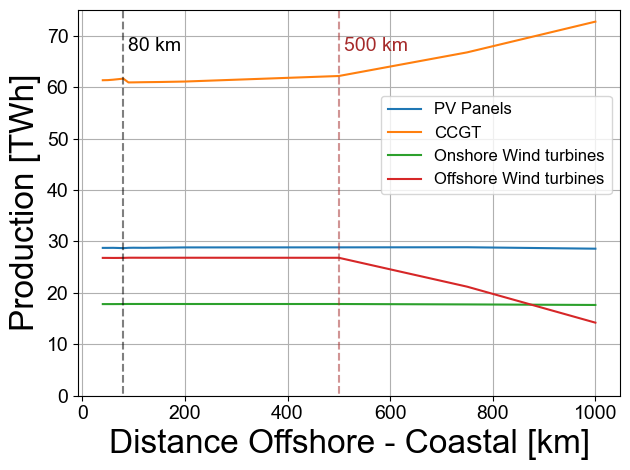

In [222]:
# graph production elec

scenario = 'DC_off_zb'
cluster = 'INLAND'
elements = ['PV','CCGT','WIND_ONSHORE']
variable = 'e_produced'
names = dict()
names['INLAND PV'] = 'PV Panels'
names['INLAND CCGT'] = 'CCGT'
names['INLAND WIND_ONSHORE'] = 'Onshore Wind turbines'
names['OFFSHORE WIND_OFFSHORE'] = 'Offshore Wind turbines'

evolution_elec = {}
evolution_elec[variable] = {}

for element in elements:
    evolution_elec[variable][names[cluster + ' ' +  element]] = {}   
    for value in h2_cost:    
        evolution_elec[variable][names[cluster + ' ' +  element]][value] = round(sum(get_cluster_element_variable(cluster,element,variable,dictionaries[scenario][value])['values']),2)/1000

cluster = 'OFFSHORE'
elements = ['WIND_OFFSHORE']
for element in elements:
    evolution_elec[variable][names[cluster + ' ' +  element]] = {}   
    for value in h2_cost:    
        evolution_elec[variable][names[cluster + ' ' +  element]][value] = round(sum(get_cluster_element_variable(cluster,element,variable,dictionaries[scenario][value])['values']),2)/1000


print(transform_into_table(evolution_elec[variable]))
transform_into_table(evolution_elec[variable]).transpose().plot()
color = 'black'
plt.plot([80]*2,[-5000,90000],color = color,linestyle='dashed',alpha=0.5)
plt.text(90, 68, '80 km', fontsize=14, ha='left', va='center', color=color)
color = 'brown'
plt.plot([500]*2,[-5000,90000],color = color,linestyle='dashed',alpha=0.5)
plt.text(510, 68, '500 km', fontsize=14, ha='left', va='center', color=color)
plt.ylim(0, 75)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize = 12, loc = 'center right',bbox_to_anchor=(1, 0.65))
plt.xlabel('Distance Offshore - Coastal [km]', fontsize = 24)
plt.ylabel('Production [TWh]', fontsize = 24)
plt.grid(True)
plt.tight_layout()
plt.savefig('C:\\Users\\jocel\\OneDrive\\Doctorat\\My papers\\Impact of wind offshore on the Belgium energy system\\Article\\Images\\' + scenario + '_elec_prod' + '.pdf',dpi=600)
plt.show()

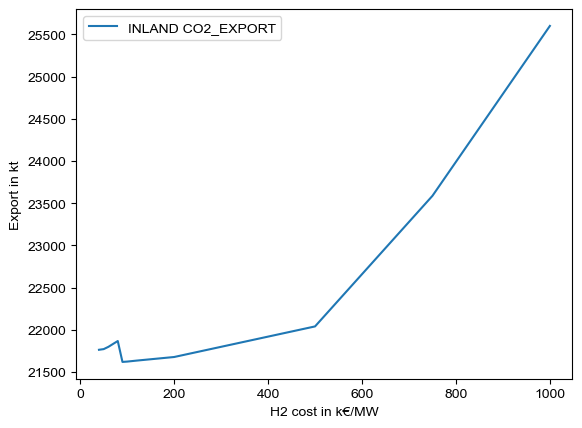

In [194]:
# CO2 export

scenario = 'DC_off_zb'
cluster = 'INLAND'
elements = ['CO2_EXPORT']
variable = 'exported'

evolution_elec[variable] = {}
for element in elements:
    evolution_elec[variable][cluster + ' ' +  element] = {}   
    for value in h2_cost:    
        evolution_elec[variable][cluster + ' ' +  element][value] = round(sum(get_cluster_element_variable(cluster,element,variable,dictionaries[scenario][value])['values']),2)

transform_into_table(evolution_elec['exported']).transpose().plot()
plt.xlabel('H2 cost in k€/MW')
plt.ylabel('Export in kt')
plt.savefig('C:\\Users\\jocel\\OneDrive\\Doctorat\\My papers\\Impact of wind offshore on the Belgium energy system\\Article\\Images\\' + scenario + '_co2_exp' + '.pdf',dpi=600)
plt.show()

# CO2 export

In [3]:
# Load json files

h2_cost = [3.5,3,2.5,2,1.5,1,0.5,0.4,0.3,0.2,0]
scenario = 'CO2_exp'
titles = []
for value in h2_cost:
    titles.append(scenario + '_' + str(value))

dictionaries = {}
dictionaries[scenario] = {}
for value in h2_cost:
    
    name_file = '3_clusters_Belgium_'+ scenario + '_' + str(value)
    name_output = name_file
    file_path = 'C:/Users/jocel/Documents/Doctorat/3_clusters/' + name_file + '.json' # path to the json file
    
    with open (file_path, 'r') as myfile:
        data = myfile.read()
        
    # parse file
    dictionary_3C = json.loads(data)
    dictionaries[scenario][value] = {}
    dictionaries[scenario][value] = dictionary_3C

                  3.5        3.0        2.5        2.0        1.5        1.0  \
Total cost  20.400714  20.400785  20.401627  20.622006  20.958664  21.315855   

                  0.5        0.4        0.3        0.2        0.0  
Total cost  21.790749  21.920857  22.057191  22.196631  22.641399  


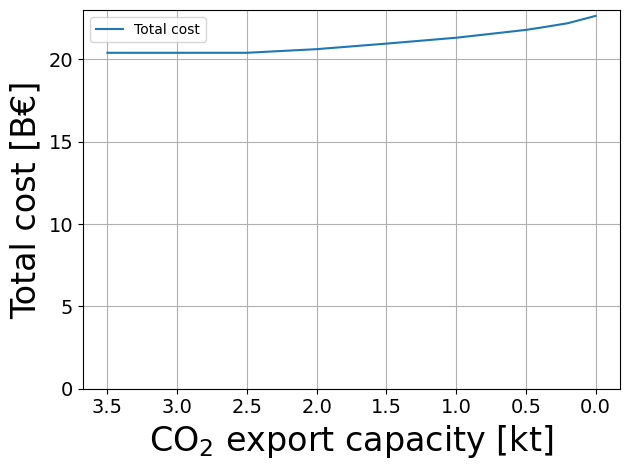

In [4]:
# Objective cost

objectives = dict()
costs = dict()
costs['Total cost'] = dict()
NG_dem = ['demand_ng_heat','demand_ng_industry','demand_ng_transport','demand_ng_transport2']
cost_NG_dem_dict = get_total_value_of_global_parameters(NG_dem,dictionaries[scenario][h2_cost[0]])
cost_NG_dem = sum(cost_NG_dem_dict[i]['Total value'] for i in cost_NG_dem_dict) * 0.202 * 0.08
load_shed = ['LOAD_SHEDDING_1','LOAD_SHEDDING_2','LOAD_SHEDDING_4','LOAD_SHEDDING_8','LOAD_SHEDDING_UNLIM']
cost_lsd = sum(get_cluster_element_parameter('INLAND',i,'yearly_existing_cost',dictionaries[scenario][h2_cost[0]])[0] for i in load_shed)
#print(cost_NG_dem)
for value in h2_cost:
    objectives[value] = dictionaries[scenario][value]['solution']['objective']
    cost_HV_OZ = get_cluster_parameter('HV_OFF_ZB','yearly_existing_cost',dictionaries[scenario][value])[0]
    cost_HV_ZI = get_cluster_parameter('HV_ZB_INL','yearly_existing_cost',dictionaries[scenario][value])[0]
    cost_NG_pipe = get_cluster_parameter('PIPE_NG_ZB_INL','yearly_existing_cost',dictionaries[scenario][value])[0]
    cost_PH = get_cluster_element_parameter('INLAND','PUMPED_HYDRO','yearly_existing_cost',dictionaries[scenario][value])[0]
    cost_NG_sto = get_cluster_element_parameter('INLAND','NG_STORAGE','yearly_existing_cost',dictionaries[scenario][value])[0]
    costs['Total cost'][value] = (objectives[value] + cost_HV_OZ + cost_HV_ZI + cost_NG_pipe + cost_NG_dem + cost_PH + cost_NG_sto + cost_lsd)/1000

print(transform_into_table(costs))
transform_into_table(costs).transpose().plot()
plt.xlabel('CO$_2$ export capacity [kt]', fontsize = 24)
plt.ylabel('Total cost [B€]', fontsize = 24)
plt.ylim(0,23)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()
plt.gca().invert_xaxis()
plt.grid(True) 
plt.savefig('C:\\Users\\jocel\\OneDrive\\Doctorat\\My papers\\Impact of wind offshore on the Belgium energy system\\Article\\Images\\' + scenario + '_obj' + '.pdf',dpi=600)
plt.show()
    

                                3.5   3.0   2.5   2.0   1.5   1.0  0.5   0.4  \
OFFSHORE ELECTROLYSIS_PLANTS   0.03  0.03  0.03  0.01  0.01  0.01  0.0  0.01   
ZEEBRUGGE ELECTROLYSIS_PLANTS  1.03  1.03  1.01  0.30  0.30  0.27  0.0  0.00   
INLAND ELECTROLYSIS_PLANTS     0.00  0.00  0.00  0.00  0.00  0.00  0.0  0.00   

                                0.3   0.2  0.0  
OFFSHORE ELECTROLYSIS_PLANTS   0.01  0.01  0.0  
ZEEBRUGGE ELECTROLYSIS_PLANTS  0.01  0.01  0.0  
INLAND ELECTROLYSIS_PLANTS     0.00  0.00  0.0  


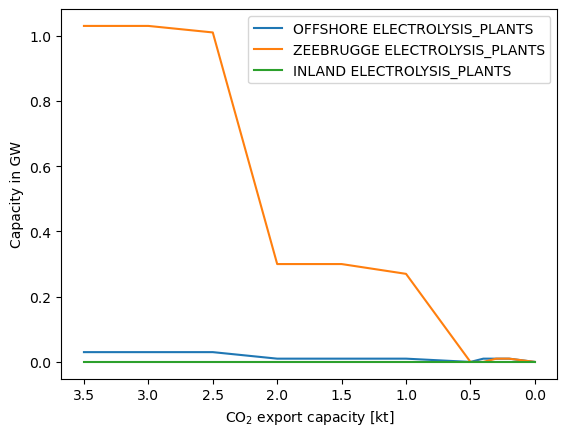

In [5]:
# graph capacities h2

clusters = ['OFFSHORE', 'ZEEBRUGGE','INLAND']
element = 'ELECTROLYSIS_PLANTS'
variable = 'new_capacity'

evolution_h2 = {}
evolution_h2[variable] = {}

for cluster in clusters:
    evolution_h2[variable][cluster + ' ' +  element] = {}   
    for value in h2_cost:    
        evolution_h2[variable][cluster + ' ' +  element][value] = round(get_cluster_element_variable(cluster,element,variable,dictionaries[scenario][value])['values'][0],2)

print(transform_into_table(evolution_h2[variable]))
transform_into_table(evolution_h2[variable]).transpose().plot()
plt.xlabel('CO$_2$ export capacity [kt]')
plt.ylabel('Capacity in GW')
plt.gca().invert_xaxis()
plt.savefig('C:\\Users\\jocel\\OneDrive\\Doctorat\\My papers\\Impact of wind offshore on the Belgium energy system\\Article\\Images\\' + scenario + '_h2_cap'+ '.pdf',dpi=600)
plt.show()

                             3.5      3.0      2.5      2.0      1.5      1.0  \
Offshore electrolysers   0.06782  0.06638  0.06631  0.02072  0.02056  0.01991   
Zeebrugge electrolysers  1.64338  1.63437  1.60652  0.48920  0.51372  0.46538   
Inland electrolysers     0.00000  0.00000  0.00000  0.00000  0.00000  0.00000   

                         0.5      0.0  
Offshore electrolysers   0.0  0.00884  
Zeebrugge electrolysers  0.0  0.00000  
Inland electrolysers     0.0  0.00000  


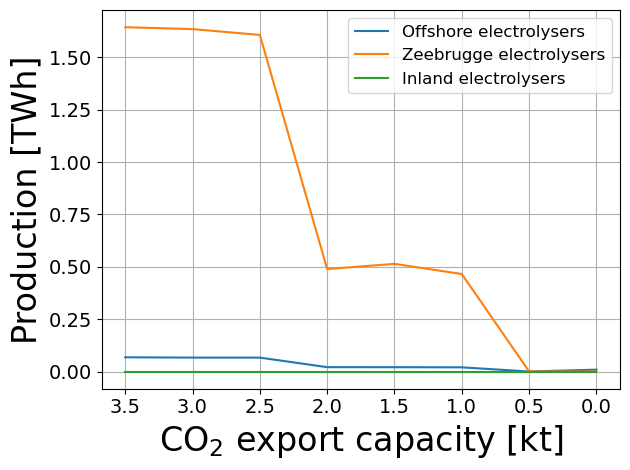

                                   3.5       3.0       2.5       2.0  \
ELECTROLYSIS_PLANTS            1.71120   1.70075   1.67283   0.50992   
INLAND SMR                     0.00000   0.00000   0.00000   0.00000   
INLAND H2_INTERCONNECTION_NL  75.97063  75.98107  76.00895  83.66055   

                                    1.5        1.0        0.5        0.0  
ELECTROLYSIS_PLANTS             0.53428    0.48529    0.00000    0.00884  
INLAND SMR                      0.00000    0.00000    0.00000    0.00000  
INLAND H2_INTERCONNECTION_NL  100.62739  117.13284  133.53538  149.70615  


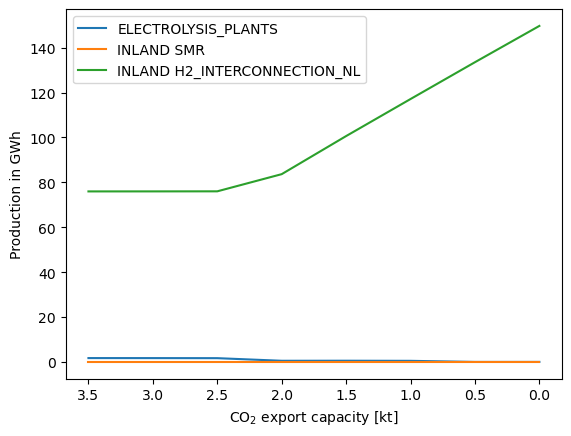

                          3.5       3.0       2.5       2.0        1.5  \
Hydrogen import      75.97063  75.98107  76.00895  83.66055  100.62739   
Hydrogen production   1.71120   1.70075   1.67283   0.50992    0.53428   

                           1.0        0.5        0.0  
Hydrogen import      117.13284  133.53538  149.70615  
Hydrogen production    0.48529    0.00000    0.00884  


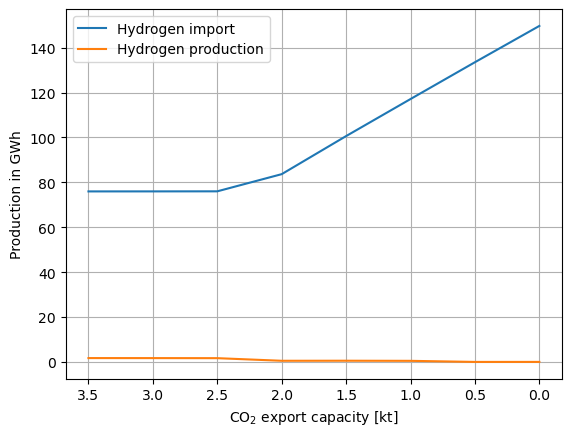

In [18]:
# graph production h2

clusters = ['OFFSHORE', 'ZEEBRUGGE','INLAND']
element = 'ELECTROLYSIS_PLANTS'
variable = 'h2_produced'
names = dict()
names['OFFSHORE ELECTROLYSIS_PLANTS'] = 'Offshore electrolysers'
names['ZEEBRUGGE ELECTROLYSIS_PLANTS'] = 'Zeebrugge electrolysers'
names['INLAND ELECTROLYSIS_PLANTS'] = 'Inland electrolysers'

evolution_ep[variable] = {}

for cluster in clusters:
    evolution_ep[variable][names[cluster + ' ' +  element]] = {}   
    for value in h2_cost:    
        evolution_ep[variable][names[cluster + ' ' +  element]][value] = round(sum(get_cluster_element_variable(cluster,element,variable,dictionaries[scenario][value])['values']),2)/1000

print(transform_into_table(evolution_ep['h2_produced']))    
transform_into_table(evolution_ep['h2_produced']).transpose().plot()
plt.xlabel('CO$_2$ export capacity [kt]', fontsize = 24)
plt.ylabel('Production [TWh]', fontsize = 24)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize = 12)
plt.grid(True)
plt.gca().invert_xaxis()
plt.tight_layout()
plt.savefig('C:\\Users\\jocel\\OneDrive\\Doctorat\\My papers\\Impact of wind offshore on the Belgium energy system\\Article\\Images\\' + scenario + '_ep_prod'+ '.pdf',dpi=600)
plt.show()

evolution_h2[variable] = {}
evolution_h2[variable]['ELECTROLYSIS_PLANTS'] = {}
for value in h2_cost:
    evolution_h2[variable]['ELECTROLYSIS_PLANTS'][value] = sum(evolution_ep[variable][i][value] for i in evolution_ep[variable])

cluster = 'INLAND'
element = 'SMR'
evolution_h2[variable][cluster + ' ' +  element] = {}  
for value in h2_cost:    
    evolution_h2[variable][cluster + ' ' +  element][value] = round(sum(get_cluster_element_variable(cluster,element,variable,dictionaries[scenario][value])['values']),2)/1000

element = 'H2_INTERCONNECTION_NL'
variable_d = 'imported'
evolution_h2['h2_produced'][cluster + ' ' +  element] = {}  
for value in h2_cost:    
    evolution_h2[variable][cluster + ' ' +  element][value] = round(sum(get_cluster_element_variable(cluster,element,variable_d,dictionaries[scenario][value])['values']),2)/1000

    

print(transform_into_table(evolution_h2['h2_produced']))    
transform_into_table(evolution_h2['h2_produced']).transpose().plot()
plt.xlabel('CO$_2$ export capacity [kt]')
plt.ylabel('Production in GWh')
plt.gca().invert_xaxis()
plt.savefig('C:\\Users\\jocel\\OneDrive\\Doctorat\\My papers\\Impact of wind offshore on the Belgium energy system\\Article\\Images\\' + scenario + '_h2_prod'+ '.pdf',dpi=600)
plt.show()

evolution_h2_tot = {}
evolution_h2_tot[variable] = {}
evolution_h2_tot[variable]['Hydrogen import'] = {}
evolution_h2_tot[variable]['Hydrogen production'] = {}
for value in h2_cost:
    evolution_h2_tot[variable]['Hydrogen import'][value] = evolution_h2[variable]['INLAND H2_INTERCONNECTION_NL'][value] 
    evolution_h2_tot[variable]['Hydrogen production'][value] = evolution_h2[variable]['ELECTROLYSIS_PLANTS'][value] + evolution_h2[variable]['INLAND SMR'][value]
    
print(transform_into_table(evolution_h2_tot['h2_produced']))    
transform_into_table(evolution_h2_tot['h2_produced']).transpose().plot()
plt.xlabel('CO$_2$ export capacity [kt]')
plt.ylabel('Production in GWh')
plt.gca().invert_xaxis()
plt.grid(True) 
plt.savefig('C:\\Users\\jocel\\OneDrive\\Doctorat\\My papers\\Impact of wind offshore on the Belgium energy system\\Article\\Images\\' + scenario + '_h2_tot_prod'+ '.pdf',dpi=600)
plt.show()

                 3.5   3.0   2.5   2.0   1.5   1.0   0.5   0.0
HV_OFF_ZB       4.54  4.55  4.55  4.57  4.57  4.57  4.57  4.57
HV_ZB_INL       3.54  3.54  3.59  3.95  3.92  3.82  3.87  3.62
PIPE_H2_OFF_ZB  0.03  0.03  0.03  0.01  0.01  0.01  0.00  0.00
PIPE_H2_ZB_INL  1.06  1.05  1.03  0.31  0.31  0.28  0.00  0.00


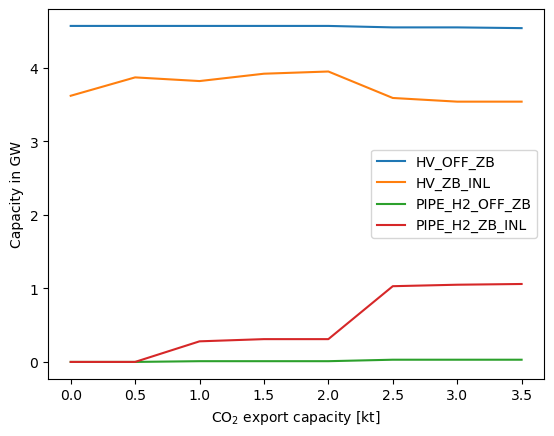

In [9]:
# graph capacities interconnection

clusters = ['HV_OFF_ZB','HV_ZB_INL']
variable = 'new_capacity'
evolution_inter[variable] = {}
for cluster in clusters:
    evolution_inter[variable][cluster] = {}
    for value in h2_cost:
        evolution_inter[variable][cluster][value] = round(get_cluster_variable(cluster,variable,dictionaries[scenario][value])['values'][0],2)

clusters = ['PIPE_H2_OFF_ZB','PIPE_H2_ZB_INL']
variable = 'new_capacity'
variable_v = 'new_capacity_forward'
for cluster in clusters:
    evolution_inter[variable][cluster] = {}
    for value in h2_cost:
        evolution_inter[variable][cluster][value] = round(get_cluster_variable(cluster,variable_v,dictionaries[scenario][value])['values'][0],2)

print(transform_into_table(evolution_inter[variable]))
transform_into_table(evolution_inter[variable]).transpose().plot()
plt.xlabel('CO$_2$ export capacity [kt]')
plt.ylabel('Capacity in GW')
plt.savefig('C:\\Users\\jocel\\OneDrive\\Doctorat\\My papers\\Impact of wind offshore on the Belgium energy system\\Article\\Images\\' + scenario + '_inter_cap'+ '.pdf',dpi=600)
plt.show()

                     3.5       3.0       2.5       2.0       1.5       1.0  \
HV_OFF_ZB       26701.84  26698.62  26694.48  26676.35  26633.95  26650.58   
HV_ZB_INL       28966.77  28971.89  29021.81  30459.26  30418.65  30507.54   
PIPE_H2_OFF_ZB     67.82     66.38     66.31     20.72     20.56     19.91   
PIPE_H2_ZB_INL   1711.14   1700.68   1672.78    509.90    534.26    485.27   

                     0.5       0.0  
HV_OFF_ZB       26873.99  26878.88  
HV_ZB_INL       31427.61  31565.78  
PIPE_H2_OFF_ZB      0.00      8.84  
PIPE_H2_ZB_INL      0.00      7.64  


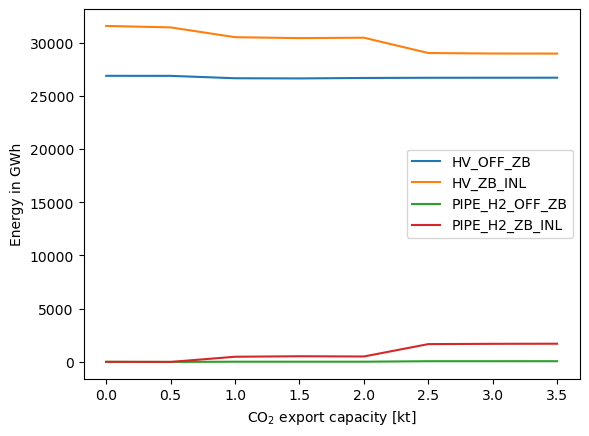

In [10]:
# graph energy interconnection

clusters = ['HV_OFF_ZB','HV_ZB_INL']
variable = 'e_forward_in'
evolution_inter[variable] = {}
for cluster in clusters:
    evolution_inter[variable][cluster] = {}
    for value in h2_cost:
        evolution_inter[variable][cluster][value] = round(sum(get_cluster_variable(cluster,variable,dictionaries[scenario][value])['values']),2)

clusters = ['PIPE_H2_OFF_ZB','PIPE_H2_ZB_INL']
variable = 'e_forward_in'
variable_v = 'flow_forward_in'
for cluster in clusters:
    evolution_inter[variable][cluster] = {}
    for value in h2_cost:
        evolution_inter[variable][cluster][value] = round(sum(get_cluster_variable(cluster,variable_v,dictionaries[scenario][value])['values']),2)

print(transform_into_table(evolution_inter[variable]))
transform_into_table(evolution_inter[variable]).transpose().plot()
plt.xlabel('CO$_2$ export capacity [kt]')
plt.ylabel('Energy in GWh')
plt.savefig('C:\\Users\\jocel\\OneDrive\\Doctorat\\My papers\\Impact of wind offshore on the Belgium energy system\\Article\\Images\\' + scenario + '_inter_ener'+ '.pdf',dpi=600)
plt.show()

In [11]:
# graph cost interconnection

clusters = ['HV_OFF_ZB','PIPE_H2_OFF_ZB']
objectives = ['fix_cost','var_cost']
evolution_obj = dict()
evolution_obj['costs'] = dict()

for cluster in clusters:
    evolution_obj['costs'][cluster] = {}
    for value in h2_cost:
        total = 0
        for objective in objectives:
            total += get_cluster_objective(cluster, objective,dictionaries[scenario][value])
        evolution_obj['costs'][cluster][value] = total
        #print(total)
        
        
cluster = 'OFFSHORE'
element = 'WIND_OFFSHORE'
evolution_obj['costs'][element] = dict()
for value in h2_cost:
        total = 0
        for objective in objectives:
            total += get_objective_element(cluster,element,objective,dictionaries[scenario][value])
        evolution_obj['costs'][element][value] = total

print(transform_into_table(evolution_obj['costs']))



                        3.5          3.0          2.5          2.0  \
HV_OFF_ZB        155.682743   155.712065   155.711668   156.442188   
PIPE_H2_OFF_ZB     0.045983     0.045027     0.044995     0.016502   
WIND_OFFSHORE   1635.982512  1635.980561  1635.978999  1635.947104   

                        1.5          1.0          0.5          0.0  
HV_OFF_ZB        156.442121   156.442143   156.587742   156.455029  
PIPE_H2_OFF_ZB     0.016522     0.016521     0.000000     0.007454  
WIND_OFFSHORE   1635.929504  1635.935139  1636.012326  1636.018171  


                       3.5    3.0    2.5     2.0     1.5     1.0     0.5  \
OFFSHORE BATTERIES    1.14   1.14   1.14    1.23    1.19    1.19    1.32   
ZEEBRUGGE BATTERIES  10.36  10.35  11.35   26.65   25.21   24.58   29.67   
INLAND BATTERIES     16.25  16.28  16.12   22.37   24.66   26.30   26.00   
INLAND CO2_STORAGE    0.00   7.45  59.65  100.00  100.00  100.00  100.00   

                       0.4    0.3    0.2     0.0  
OFFSHORE BATTERIES    1.23   1.17   1.17    1.24  
ZEEBRUGGE BATTERIES  29.66  28.86  28.89   31.80  
INLAND BATTERIES     26.99  27.78  28.40   28.20  
INLAND CO2_STORAGE   67.04  45.23  72.26  100.00  


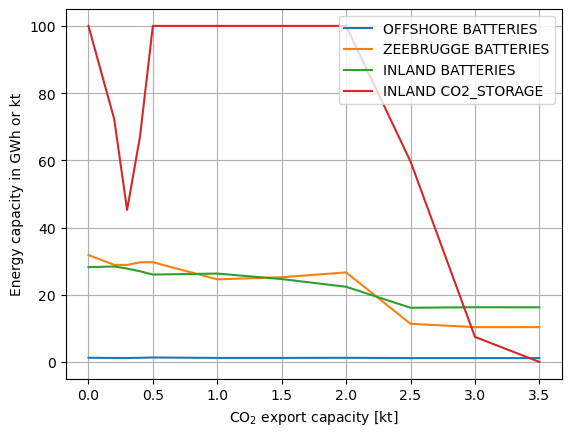

In [6]:
# batteries 

cluster = 'OFFSHORE'
elements = ['BATTERIES']
variable = 'new_energy_capacity'

evolution_elec[variable] = {}
for element in elements:
    evolution_elec[variable][cluster + ' ' +  element] = {}   
    for value in h2_cost:    
        evolution_elec[variable][cluster + ' ' +  element][value] = round(sum(get_cluster_element_variable(cluster,element,variable,dictionaries[scenario][value])['values']),2)

cluster = 'ZEEBRUGGE'
#elements = ['BATTERIES','H2_STORAGE']

for element in elements:
    evolution_elec[variable][cluster + ' ' +  element] = {}   
    for value in h2_cost:    
        evolution_elec[variable][cluster + ' ' +  element][value] = round(sum(get_cluster_element_variable(cluster,element,variable,dictionaries[scenario][value])['values']),2)

cluster = 'INLAND'
elements = ['BATTERIES','CO2_STORAGE']

for element in elements:
    evolution_elec[variable][cluster + ' ' +  element] = {}   
    for value in h2_cost:    
        evolution_elec[variable][cluster + ' ' +  element][value] = round(sum(get_cluster_element_variable(cluster,element,variable,dictionaries[scenario][value])['values']),2)

transform_into_table(evolution_elec[variable]).transpose().plot()
print(transform_into_table(evolution_elec[variable]))
plt.xlabel('CO$_2$ export capacity [kt]')
plt.ylabel('Energy capacity in GWh or kt')
plt.grid(True)
plt.savefig('C:\\Users\\jocel\\OneDrive\\Doctorat\\My papers\\Impact of wind offshore on the Belgium energy system\\Article\\Images\\' + scenario + '_batt' + '.pdf',dpi=600)
plt.show()

                      3.5  3.0  2.5  2.0  1.5  1.0  0.5  0.4  0.3  0.2  0.0
OFFSHORE H2_STORAGE   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
ZEEBRUGGE H2_STORAGE  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
INLAND H2_STORAGE     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0


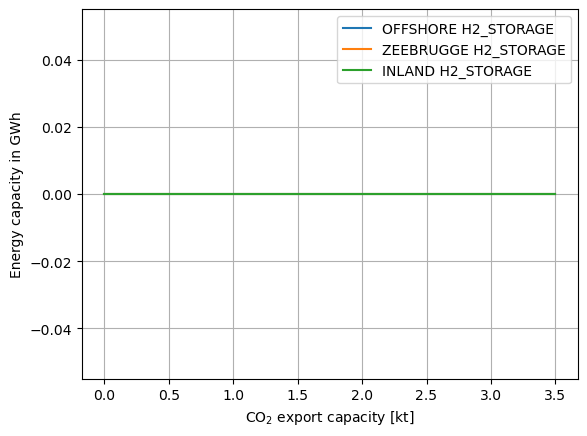

In [7]:
# h2 storage

cluster = 'OFFSHORE'
elements = ['H2_STORAGE']
variable = 'new_energy_capacity'

evolution_elec[variable] = {}
for element in elements:
    evolution_elec[variable][cluster + ' ' +  element] = {}   
    for value in h2_cost:    
        evolution_elec[variable][cluster + ' ' +  element][value] = round(sum(get_cluster_element_variable(cluster,element,variable,dictionaries[scenario][value])['values']),2)

cluster = 'ZEEBRUGGE'
#elements = ['BATTERIES','H2_STORAGE']

for element in elements:
    evolution_elec[variable][cluster + ' ' +  element] = {}   
    for value in h2_cost:    
        evolution_elec[variable][cluster + ' ' +  element][value] = round(sum(get_cluster_element_variable(cluster,element,variable,dictionaries[scenario][value])['values']),2)

cluster = 'INLAND'
#elements = ['BATTERIES','CO2_STORAGE']

for element in elements:
    evolution_elec[variable][cluster + ' ' +  element] = {}   
    for value in h2_cost:    
        evolution_elec[variable][cluster + ' ' +  element][value] = round(sum(get_cluster_element_variable(cluster,element,variable,dictionaries[scenario][value])['values']),2)

transform_into_table(evolution_elec[variable]).transpose().plot()
print(transform_into_table(evolution_elec[variable]))
plt.xlabel('CO$_2$ export capacity [kt]')
plt.ylabel('Energy capacity in GWh')
plt.grid(True)
plt.savefig('C:\\Users\\jocel\\OneDrive\\Doctorat\\My papers\\Impact of wind offshore on the Belgium energy system\\Article\\Images\\' + scenario + '_h2_sto' + '.pdf',dpi=600)
plt.show()

                          3.5    3.0    2.5    2.0    1.5    1.0    0.5  \
INLAND PV               28.32  28.31  28.50  35.34  36.20  37.04  39.88   
INLAND CCGT             11.91  11.91  11.86  10.53   8.49   6.11   0.01   
INLAND WIND_ONSHORE      9.00   9.00   9.00   9.00   9.00   9.00   9.00   
INLAND FUEL_CELLS        0.00   0.00   0.00   0.66   2.49   4.47   6.34   
OFFSHORE WIND_OFFSHORE   8.00   8.00   8.00   8.00   8.00   8.00   8.00   

                          0.4    0.3    0.2    0.0  
INLAND PV               39.60  39.53  39.52  39.32  
INLAND CCGT              0.00   0.00   0.00   0.00  
INLAND WIND_ONSHORE      9.00   9.00   9.00   9.00  
INLAND FUEL_CELLS        6.67   6.77   6.88   7.24  
OFFSHORE WIND_OFFSHORE   8.00   8.00   8.00   8.00  


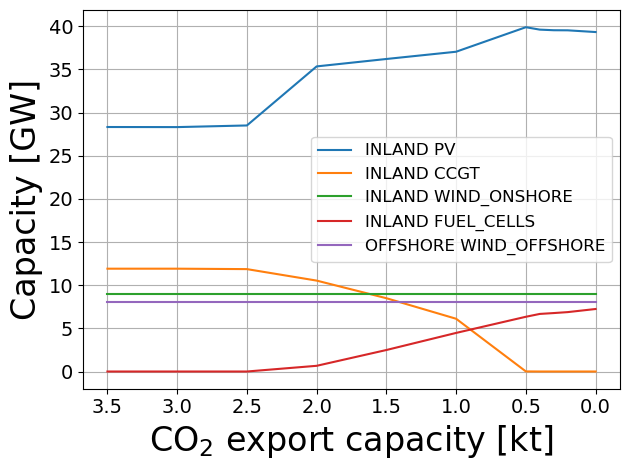

In [8]:
# graph capacities elec

cluster = 'INLAND'
elements = ['PV','CCGT','WIND_ONSHORE','FUEL_CELLS']
variable = 'new_capacity'

evolution_elec = {}
evolution_elec[variable] = {}

for element in elements:
    evolution_elec[variable][cluster + ' ' +  element] = {}   
    for value in h2_cost:    
        evolution_elec[variable][cluster + ' ' +  element][value] = round(get_cluster_element_variable(cluster,element,variable,dictionaries[scenario][value])['values'][0],2)

        
cluster = 'OFFSHORE'
elements = ['WIND_OFFSHORE']


for element in elements:
    evolution_elec[variable][cluster + ' ' +  element] = {}   
    for value in h2_cost:    
        evolution_elec[variable][cluster + ' ' +  element][value] = round(get_cluster_element_variable(cluster,element,variable,dictionaries[scenario][value])['values'][0],2)

print(transform_into_table(evolution_elec[variable]))
transform_into_table(evolution_elec[variable]).transpose().plot()
plt.gca().invert_xaxis()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize = 12)
plt.xlabel('CO$_2$ export capacity [kt]', fontsize = 24)
plt.ylabel('Capacity [GW]', fontsize = 24)
plt.grid(True)
plt.tight_layout()
plt.savefig('C:\\Users\\jocel\\OneDrive\\Doctorat\\My papers\\Impact of wind offshore on the Belgium energy system\\Article\\Images\\' + scenario + '_elec_cap'+ '.pdf',dpi=600)
plt.show()

                             3.5       3.0       2.5       2.0       1.5  \
PV Panels               28.73474  28.72915  28.90439  34.63765  35.46192   
CCGT                    61.32334  61.31947  61.01377  48.73235  35.72401   
Onshore Wind turbines   17.79384  17.79361  17.78177  17.31273  17.30340   
Onshore Fuel cells       0.00000   0.00000   0.00000   3.76415  13.61904   
Offshore Wind turbines  26.78630  26.78130  26.77729  26.69551  26.65038   

                             1.0       0.5       0.4       0.3       0.2  \
PV Panels               36.33939  39.03685  38.86242  38.81212  38.81869   
CCGT                    22.71411   0.04332   0.00000   0.00001   0.00000   
Onshore Wind turbines   17.30829  17.30090  17.31086  17.31238  17.31518   
Onshore Fuel cells      23.16381  32.39612  33.17457  33.38268  33.52940   
Offshore Wind turbines  26.66483  26.86275  26.83525  26.82781  26.83713   

                             0.0  
PV Panels               38.67704  
CCGT            

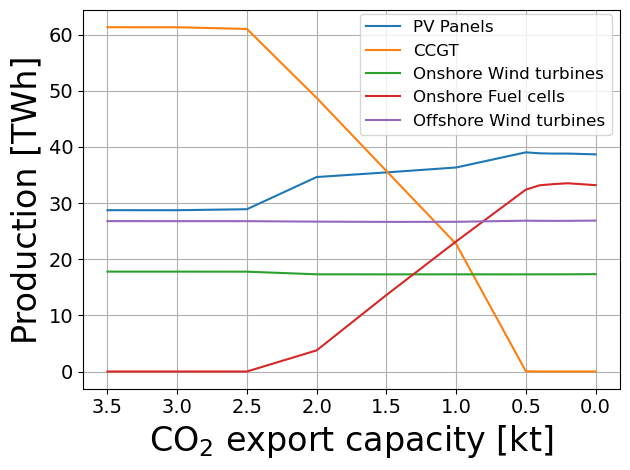

In [9]:
# graph production elec

cluster = 'INLAND'
elements = ['PV','CCGT','WIND_ONSHORE','FUEL_CELLS']
variable = 'e_produced'
names = dict()
names['INLAND PV'] = 'PV Panels'
names['INLAND CCGT'] = 'CCGT'
names['INLAND WIND_ONSHORE'] = 'Onshore Wind turbines'
names['INLAND FUEL_CELLS'] = 'Onshore Fuel cells'
names['OFFSHORE WIND_OFFSHORE'] = 'Offshore Wind turbines'

evolution_elec = {}
evolution_elec[variable] = {}

for element in elements:
    evolution_elec[variable][names[cluster + ' ' +  element]] = {}   
    for value in h2_cost:    
        evolution_elec[variable][names[cluster + ' ' +  element]][value] = round(sum(get_cluster_element_variable(cluster,element,variable,dictionaries[scenario][value])['values']),2)/1000

cluster = 'OFFSHORE'
elements = ['WIND_OFFSHORE']
for element in elements:
    evolution_elec[variable][names[cluster + ' ' +  element]] = {}   
    for value in h2_cost:    
        evolution_elec[variable][names[cluster + ' ' +  element]][value] = round(sum(get_cluster_element_variable(cluster,element,variable,dictionaries[scenario][value])['values']),2)/1000


print(transform_into_table(evolution_elec[variable]))
transform_into_table(evolution_elec[variable]).transpose().plot()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize = 12, loc = 'center right',bbox_to_anchor=(1, 0.83))
plt.xlabel('CO$_2$ export capacity [kt]', fontsize = 24)
plt.ylabel('Production [TWh]', fontsize = 24)
plt.grid(True)
plt.tight_layout()
plt.gca().invert_xaxis()
plt.savefig('C:\\Users\\jocel\\OneDrive\\Doctorat\\My papers\\Impact of wind offshore on the Belgium energy system\\Article\\Images\\' + scenario + '_elec_prod' + '.pdf',dpi=600)
plt.show()

                          3.5   3.0   2.5   2.0   1.5   1.0   0.5   0.4   0.3  \
Offshore electrolysers   0.03  0.03  0.03  0.01  0.01  0.01  0.00  0.01  0.01   
Zeebrugge electrolysers  1.03  1.03  1.01  0.30  0.30  0.27  0.00  0.00  0.01   
Inland electrolysers     0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00   
Biomethane plants        1.65  1.65  1.65  1.65  1.65  1.65  1.65  1.65  1.65   
Methanation plants       0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00   
Steam methane reformers  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00   

                          0.2   0.0  
Offshore electrolysers   0.01  0.00  
Zeebrugge electrolysers  0.01  0.00  
Inland electrolysers     0.00  0.00  
Biomethane plants        1.65  1.65  
Methanation plants       0.33  2.28  
Steam methane reformers  0.00  0.00  


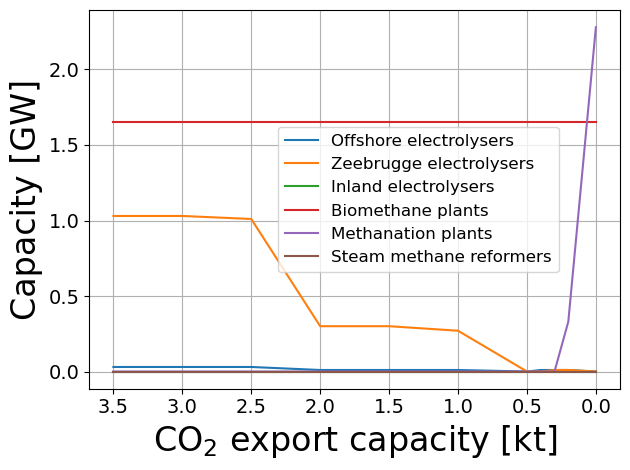

In [10]:
# graph capacities molecule

names = dict()
names['OFFSHORE ELECTROLYSIS_PLANTS'] = 'Offshore electrolysers'
names['ZEEBRUGGE ELECTROLYSIS_PLANTS'] = 'Zeebrugge electrolysers'
names['INLAND ELECTROLYSIS_PLANTS'] = 'Inland electrolysers'
names['INLAND SMR'] = 'Steam methane reformers'
names['INLAND BIOMETHANE'] = 'Biomethane plants'
names['INLAND METHANATION'] = 'Methanation plants'

clusters = ['OFFSHORE','ZEEBRUGGE','INLAND']
element = 'ELECTROLYSIS_PLANTS'
variable = 'new_capacity'

evolution_h2 = {}
evolution_h2[variable] = {}

for cluster in clusters:
    evolution_h2[variable][names[cluster + ' ' +  element]] = {}   
    for value in h2_cost:    
        evolution_h2[variable][names[cluster + ' ' +  element]][value] = round(get_cluster_element_variable(cluster,element,variable,dictionaries[scenario][value])['values'][0],2)

cluster = 'INLAND'
elements = ['BIOMETHANE','METHANATION','SMR']   
for element in elements:
    evolution_h2[variable][names[cluster + ' ' +  element]] = {}
    for value in h2_cost:    
        evolution_h2[variable][names[cluster + ' ' +  element]][value] = round(get_cluster_element_variable(cluster,element,variable,dictionaries[scenario][value])['values'][0],2)


print(transform_into_table(evolution_h2[variable]))
transform_into_table(evolution_h2[variable]).transpose().plot()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('CO$_2$ export capacity [kt]',fontsize = 24)
plt.ylabel('Capacity [GW]',fontsize = 24)
plt.grid()
plt.tight_layout()
plt.legend(fontsize = 12, loc = 'center right',bbox_to_anchor=(0.9, 0.5))
plt.gca().invert_xaxis()
plt.savefig('C:\\Users\\jocel\\OneDrive\\Doctorat\\My papers\\Impact of wind offshore on the Belgium energy system\\Article\\Images\\' + scenario + '_mol_cap'+ '.pdf',dpi=600)
plt.show()

                              3.5       3.0       2.5       2.0       1.5  \
Offshore electrolysers    0.06782   0.06638   0.06631   0.02072   0.02056   
Zeebrugge electrolysers   1.64338   1.63437   1.60652   0.48920   0.51372   
Inland electrolysers      0.00000   0.00000   0.00000   0.00000   0.00000   
Steam methane reformers   0.00000   0.00000   0.00000   0.00000   0.00000   
Methanation plants        0.00000   0.00000   0.00000   0.00000   0.00000   
Biomethane plants        14.08052  14.08052  14.08052  14.08052  14.08052   

                              1.0       0.5       0.4       0.3       0.2  \
Offshore electrolysers    0.01991   0.00000   0.01628   0.01823   0.01823   
Zeebrugge electrolysers   0.46538   0.00000   0.00001   0.01244   0.02149   
Inland electrolysers      0.00000   0.00000   0.00000   0.00000   0.00000   
Steam methane reformers   0.00000   0.00000   0.00000   0.00000   0.00000   
Methanation plants        0.00000   0.00000   0.00001   0.00005   2.39449  

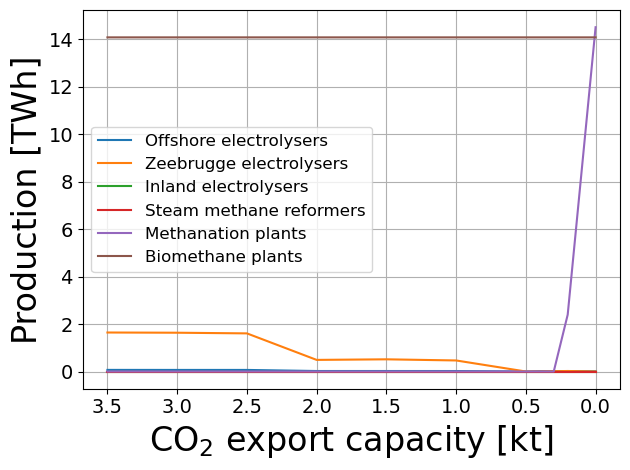

                                   3.5       3.0       2.5       2.0  \
ELECTROLYSIS_PLANTS           15.79172  15.78127  15.75335  14.59044   
INLAND SMR                     0.00000   0.00000   0.00000   0.00000   
INLAND H2_INTERCONNECTION_NL  75.97063  75.98107  76.00895  83.66055   

                                    1.5        1.0        0.5        0.4  \
ELECTROLYSIS_PLANTS            14.61480   14.56581   14.08052   14.09681   
INLAND SMR                      0.00000    0.00000    0.00000    0.00000   
INLAND H2_INTERCONNECTION_NL  100.62739  117.13284  133.53538  137.40720   

                                    0.3        0.2        0.0  
ELECTROLYSIS_PLANTS            14.11125   16.51474   28.59771  
INLAND SMR                      0.00000    0.00000    0.00000  
INLAND H2_INTERCONNECTION_NL  141.79977  146.04408  149.70615  


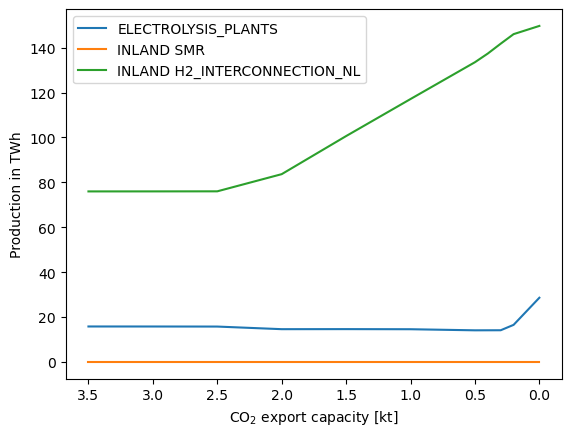

                          3.5       3.0       2.5       2.0        1.5  \
Hydrogen import      75.97063  75.98107  76.00895  83.66055  100.62739   
Hydrogen production  15.79172  15.78127  15.75335  14.59044   14.61480   

                           1.0        0.5        0.4        0.3        0.2  \
Hydrogen import      117.13284  133.53538  137.40720  141.79977  146.04408   
Hydrogen production   14.56581   14.08052   14.09681   14.11125   16.51474   

                           0.0  
Hydrogen import      149.70615  
Hydrogen production   28.59771  


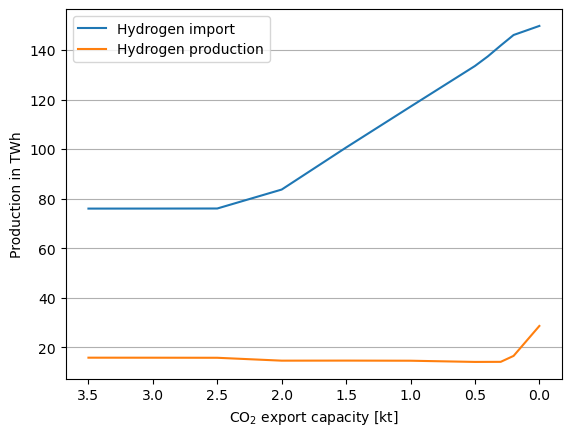

In [11]:
# graph production molecules

clusters = ['OFFSHORE', 'ZEEBRUGGE','INLAND']
element = 'ELECTROLYSIS_PLANTS'
variable = 'h2_produced'
names = dict()
names['OFFSHORE ELECTROLYSIS_PLANTS'] = 'Offshore electrolysers'
names['ZEEBRUGGE ELECTROLYSIS_PLANTS'] = 'Zeebrugge electrolysers'
names['INLAND ELECTROLYSIS_PLANTS'] = 'Inland electrolysers'
names['INLAND SMR'] = 'Steam methane reformers'
names['INLAND BIOMETHANE'] = 'Biomethane plants'
names['INLAND METHANATION'] = 'Methanation plants'


evolution_ep[variable] = {}

for cluster in clusters:
    evolution_ep[variable][names[cluster + ' ' +  element]] = {}   
    for value in h2_cost:    
        evolution_ep[variable][names[cluster + ' ' +  element]][value] = round(sum(get_cluster_element_variable(cluster,element,variable,dictionaries[scenario][value])['values']),2)/1000

cluster = 'INLAND'
elements = ['SMR','METHANATION','BIOMETHANE']

for element in elements:
    evolution_ep[variable][names[cluster + ' ' +  element]] = {}   
    for value in h2_cost:
        if element == 'SMR':
            evolution_ep[variable][names[cluster + ' ' +  element]][value] = round(sum(get_cluster_element_variable(cluster,element,variable,dictionaries[scenario][value])['values']),2)/1000
        else:
            evolution_ep[variable][names[cluster + ' ' +  element]][value] = round(sum(get_cluster_element_variable(cluster,element,'ng_produced',dictionaries[scenario][value])['values']),2)/1000

print(transform_into_table(evolution_ep['h2_produced']))    
transform_into_table(evolution_ep['h2_produced']).transpose().plot()
plt.xlabel('CO$_2$ export capacity [kt]', fontsize = 24)
plt.ylabel('Production [TWh]', fontsize = 24)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize = 12)
plt.grid(True)
plt.tight_layout()
plt.gca().invert_xaxis()
plt.savefig('C:\\Users\\jocel\\OneDrive\\Doctorat\\My papers\\Impact of wind offshore on the Belgium energy system\\Article\\Images\\' + scenario + '_mol_prod'+ '.pdf',dpi=600)
plt.show()

evolution_h2[variable] = {}
evolution_h2[variable]['ELECTROLYSIS_PLANTS'] = {}
for value in h2_cost:
    evolution_h2[variable]['ELECTROLYSIS_PLANTS'][value] = sum(evolution_ep[variable][i][value] for i in evolution_ep[variable])

cluster = 'INLAND'
element = 'SMR'
evolution_h2[variable][cluster + ' ' +  element] = {}  
for value in h2_cost:    
    evolution_h2[variable][cluster + ' ' +  element][value] = round(sum(get_cluster_element_variable(cluster,element,variable,dictionaries[scenario][value])['values']),2)/1000

element = 'H2_INTERCONNECTION_NL'
variable_d = 'imported'
evolution_h2['h2_produced'][cluster + ' ' +  element] = {}  
for value in h2_cost:    
    evolution_h2[variable][cluster + ' ' +  element][value] = round(sum(get_cluster_element_variable(cluster,element,variable_d,dictionaries[scenario][value])['values']),2)/1000

    

print(transform_into_table(evolution_h2['h2_produced']))    
transform_into_table(evolution_h2['h2_produced']).transpose().plot()
plt.xlabel('CO$_2$ export capacity [kt]')
plt.ylabel('Production in TWh')
plt.gca().invert_xaxis()
plt.savefig('C:\\Users\\jocel\\OneDrive\\Doctorat\\My papers\\Impact of wind offshore on the Belgium energy system\\Article\\Images\\' + scenario + '_h2_prod'+ '.pdf',dpi=600)
plt.show()

evolution_h2_tot = {}
evolution_h2_tot[variable] = {}
evolution_h2_tot[variable]['Hydrogen import'] = {}
evolution_h2_tot[variable]['Hydrogen production'] = {}
for value in h2_cost:
    evolution_h2_tot[variable]['Hydrogen import'][value] = evolution_h2[variable]['INLAND H2_INTERCONNECTION_NL'][value] 
    evolution_h2_tot[variable]['Hydrogen production'][value] = evolution_h2[variable]['ELECTROLYSIS_PLANTS'][value] + evolution_h2[variable]['INLAND SMR'][value]
    
print(transform_into_table(evolution_h2_tot['h2_produced']))    
transform_into_table(evolution_h2_tot['h2_produced']).transpose().plot()
plt.xlabel('CO$_2$ export capacity [kt]')
plt.ylabel('Production in TWh')
plt.grid(axis = 'y') 
plt.gca().invert_xaxis()
plt.savefig('C:\\Users\\jocel\\OneDrive\\Doctorat\\My papers\\Impact of wind offshore on the Belgium energy system\\Article\\Images\\' + scenario + '_h2_tot_prod'+ '.pdf',dpi=600)
plt.show()

                       3.5       3.0       2.5       2.0       1.5      1.0  \
INLAND PCCC_CCGT  18093.88  18092.64  18044.97  14357.00  10447.81  6550.32   
INLAND PCCC_SMR       0.00      0.00      0.00      0.00      0.00     0.00   
INLAND DAC         3664.56   3664.50   3609.25   3162.48   2692.19  2209.68   

                      0.5      0.4     0.3    0.2      0.0  
INLAND PCCC_CCGT    12.26     0.00    0.00   0.00     0.00  
INLAND PCCC_SMR      0.00     0.00    0.00   0.00     0.00  
INLAND DAC        1758.79  1187.46  383.41  60.34  1012.38  


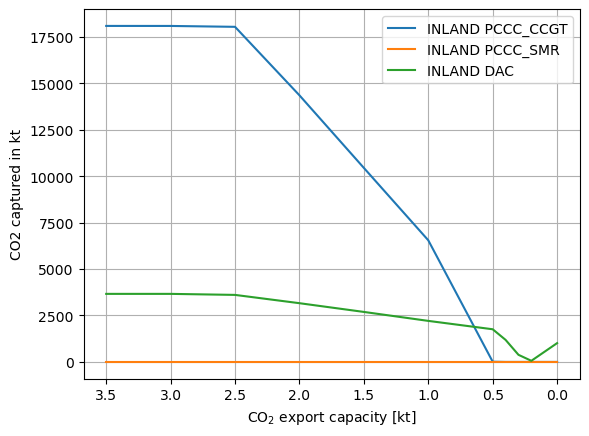

In [12]:
# Capture de CO2

cluster = 'INLAND'
elements = ['PCCC_CCGT','PCCC_SMR','DAC']
variable = 'co2_captured'

evolution_elec[variable] = {}
for element in elements:
    evolution_elec[variable][cluster + ' ' +  element] = {}   
    for value in h2_cost:    
        evolution_elec[variable][cluster + ' ' +  element][value] = round(sum(get_cluster_element_variable(cluster,element,variable,dictionaries[scenario][value])['values']),2)

transform_into_table(evolution_elec['co2_captured']).transpose().plot()
print(transform_into_table(evolution_elec['co2_captured']))
plt.xlabel('CO$_2$ export capacity [kt]')
plt.ylabel('CO2 captured in kt')
plt.grid(True)
plt.gca().invert_xaxis()
plt.savefig('C:\\Users\\jocel\\OneDrive\\Doctorat\\My papers\\Impact of wind offshore on the Belgium energy system\\Article\\Images\\' + scenario + '_co2_capt' + '.pdf',dpi=600)
plt.show()

         3.5   3.0    2.5   2.0    1.5    1.0    0.5    0.4    0.3    0.2  \
e_ens   9.38  9.34  10.05  6.71  15.07  32.34  47.41  52.19  52.38  52.43   
h2_ens  0.00  0.00   0.00  0.00   0.00   0.00   0.00   0.00   0.00   0.00   
ng_ens  0.00  0.00   0.00  0.00   0.00   0.00   0.00   0.00   0.00   0.00   

          0.0  
e_ens   50.54  
h2_ens   0.51  
ng_ens   0.00  


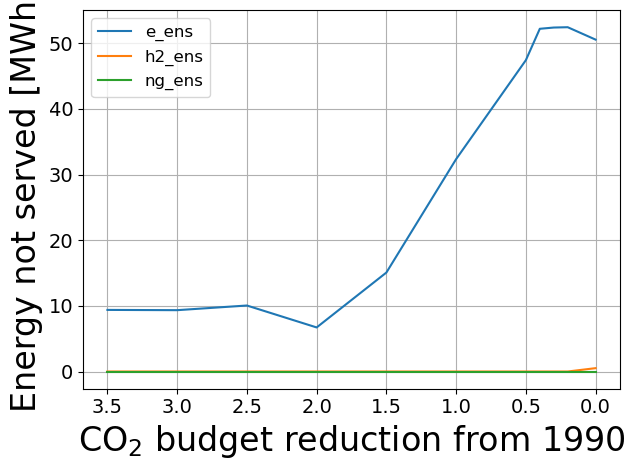

In [13]:
# energy not served

cluster = 'INLAND'
variables = ['e_ens','h2_ens','ng_ens']

evolution_ens = {}
for variable in variables:
    evolution_ens[variable] = {}
    for value in h2_cost:
        evolution_ens[variable][value] = round(sum(get_cluster_variable(cluster,variable,dictionaries[scenario][value])['values']),2)
        
transform_into_table(evolution_ens).transpose().plot()
print(transform_into_table(evolution_ens))
plt.xlabel('CO$_2$ budget reduction from 1990', fontsize = '24')
plt.ylabel('Energy not served [MWh]', fontsize='24')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize = 12)
plt.grid(True)
plt.gca().invert_xaxis()
plt.tight_layout()
plt.savefig('C:\\Users\\jocel\\OneDrive\\Doctorat\\My papers\\Impact of wind offshore on the Belgium energy system\\Article\\Images\\' + scenario + '_ens' + '.pdf',dpi=600)
plt.show()

                               3.5       3.0       2.5       2.0       1.5  \
Synthetic methane import   0.00000   0.00000   0.00000   0.00000   0.00000   
NV natural gas import      0.00000   0.00000   0.00000   0.00000   0.00000   
UK natural gas import      0.00000   0.00000   0.00000   0.00000   0.00000   
NL natural gas import      0.00000   0.00000   0.00000   0.00000   0.00000   
DE natural gas import     29.00371  28.99630  28.60350  13.68497   2.60927   
Carbon dioxide export     21.75844  21.75714  21.65422  17.51947  13.14000   

                              1.0      0.5      0.4      0.3      0.2      0.0  
Synthetic methane import  0.00000  0.00000  0.00000  0.00000  0.00000  3.01043  
NV natural gas import     0.00000  0.00000  0.00001  0.00001  0.00001  0.00000  
UK natural gas import     0.00000  0.00000  0.00000  0.00001  0.00001  0.00000  
NL natural gas import     0.00000  0.00000  0.00000  0.00000  0.00000  0.00000  
DE natural gas import     0.78406  0.34818  0.18

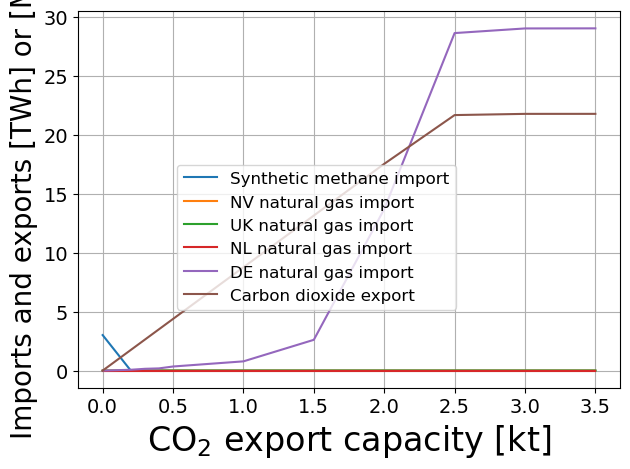

In [14]:
# import gas

cluster = 'ZEEBRUGGE'
elements = ['REGAS_GREEN','NG_INTERCONNECTION_NV','NG_INTERCONNECTION_UK']
variable = 'imported'

names = dict()
names['ZEEBRUGGE REGAS_GREEN'] = 'Synthetic methane import'
names['ZEEBRUGGE NG_INTERCONNECTION_NV'] = 'NV natural gas import'
names['ZEEBRUGGE NG_INTERCONNECTION_UK'] = 'UK natural gas import'
names['INLAND NG_INTERCONNECTION_DE'] = 'DE natural gas import'
names['INLAND NG_INTERCONNECTION_NL'] = 'NL natural gas import'
names['INLAND CO2_EXPORT'] = 'Carbon dioxide export'




evolution_elec[variable] = {}
for element in elements:
    evolution_elec[variable][names[cluster + ' ' +  element]] = {}   
    for value in h2_cost:    
        evolution_elec[variable][names[cluster + ' ' +  element]][value] = round(sum(get_cluster_element_variable(cluster,element,variable,dictionaries[scenario][value])['values']),2)/1000

cluster = 'INLAND'
elements = ['NG_INTERCONNECTION_NL','NG_INTERCONNECTION_DE']
for element in elements:
    evolution_elec[variable][names[cluster + ' ' +  element]] = {}   
    for value in h2_cost:    
        evolution_elec[variable][names[cluster + ' ' +  element]][value] = round(sum(get_cluster_element_variable(cluster,element,variable,dictionaries[scenario][value])['values']),2)/1000

        
cluster = 'INLAND'
elements = ['CO2_EXPORT']
variable_v = 'exported'

for element in elements:
    evolution_elec[variable][names[cluster + ' ' +  element]] = {}   
    for value in h2_cost:    
        evolution_elec[variable][names[cluster + ' ' +  element]][value] = round(sum(get_cluster_element_variable(cluster,element,variable_v,dictionaries[scenario][value])['values']),2)/1000

transform_into_table(evolution_elec[variable]).transpose().plot()
print(transform_into_table(evolution_elec[variable]))
plt.xlabel('CO$_2$ export capacity [kt]', fontsize = 24)
plt.ylabel('Imports and exports [TWh] or [Mt]', fontsize = 20)
plt.grid(True)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize = 12, loc = 'center', bbox_to_anchor=(0.44, 0.4))
plt.tight_layout()
plt.savefig('C:\\Users\\jocel\\OneDrive\\Doctorat\\My papers\\Impact of wind offshore on the Belgium energy system\\Article\\Images\\' + scenario + '_ng_imp' + '.pdf',dpi=600)
plt.show()

     Hydrogen import  Natural gas import  Electricity import  \
3.5         75.97063            29.00371            16.74090   
3.0         75.98107            28.99630            16.74192   
2.5         76.00895            28.60350            16.74369   
2.0         83.66055            13.68497            16.78827   
1.5        100.62739             2.60927            16.78975   
1.0        117.13284             0.78406            16.82753   
0.5        133.53538             0.34818            17.06613   
0.4        137.40720             0.18841            17.05758   
0.3        141.79977             0.15315            17.04551   
0.2        146.04408             0.07185            17.04490   
0.0        149.70615             0.00000            16.99837   

     Synthetic methane import  
3.5                   0.00000  
3.0                   0.00000  
2.5                   0.00000  
2.0                   0.00000  
1.5                   0.00000  
1.0                   0.00000  
0.5    

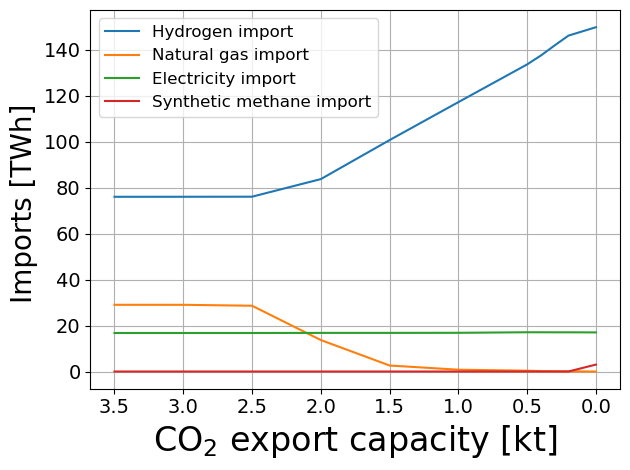

In [15]:
# All imports

# Somme import gaz

cluster = 'ZEEBRUGGE'
elements = ['NG_INTERCONNECTION_NV','NG_INTERCONNECTION_UK']
variable = 'imported'

tot_gas_import_zb = dict()
for value in h2_cost:
    tot_gas_import_zb[value] = 0
    for element in elements:
        tot_gas_import_zb[value] += round(sum(get_cluster_element_variable(cluster,element,variable,dictionaries[scenario][value])['values']),2)/1000

cluster = 'INLAND'
elements = ['NG_INTERCONNECTION_NL','NG_INTERCONNECTION_DE']

tot_gas_import_inl = dict()
for value in h2_cost:
    tot_gas_import_inl[value] = 0
    for element in elements:
        tot_gas_import_inl[value] += round(sum(get_cluster_element_variable(cluster,element,variable,dictionaries[scenario][value])['values']),2)/1000


tot_gas_import = dict()
for value in h2_cost:
    tot_gas_import[value] = tot_gas_import_zb[value] + tot_gas_import_inl[value]

# Somme import electricity

clusters = ['DENMARK','UNITED_KINGDOM','NETHERLANDS','DEUTSCHLAND','LUXEMBOURG','FRANCE']
variable = 'imported'

tot_elec_import = dict()
for value in h2_cost:
    tot_elec_import[value] = 0
    for cluster in clusters:
        tot_elec_import[value] += round(sum(get_cluster_variable(cluster,variable,dictionaries[scenario][value])['values']),2)/1000 

# import h2

cluster = 'INLAND'
element = 'H2_INTERCONNECTION_NL'
tot_h2_import = dict()  
for value in h2_cost:    
    tot_h2_import[value] = round(sum(get_cluster_element_variable(cluster,element,variable_d,dictionaries[scenario][value])['values']),2)/1000

# all imports

cluster = 'ZEEBRUGGE'
element = 'REGAS_GREEN'

tot_import = dict()
for value in h2_cost:
    tot_import[value] = dict()
    tot_import[value]['Hydrogen import'] = tot_h2_import[value]
    tot_import[value]['Natural gas import'] = tot_gas_import[value]
    tot_import[value]['Electricity import'] = tot_elec_import[value]
    tot_import[value]['Synthetic methane import'] = round(sum(get_cluster_element_variable(cluster,element,variable,dictionaries[scenario][value])['values']),2)/1000
print(transform_into_table(tot_import))

transform_into_table(tot_import).plot()
plt.xlabel('CO$_2$ export capacity [kt]', fontsize = 24)
plt.ylabel('Imports [TWh] ', fontsize = 20)
plt.grid(True)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize = 12)#, loc = 'center', bbox_to_anchor=(0.44, 0.6))
plt.gca().invert_xaxis()
plt.tight_layout()
plt.savefig('C:\\Users\\jocel\\OneDrive\\Doctorat\\My papers\\Impact of wind offshore on the Belgium energy system\\Article\\Images\\' + scenario + '_imp' + '.pdf',dpi=600)
plt.show()

     CO$_2$ export  CO$_2$ emission
3.5       21.75844                0
3.0       21.75714                0
2.5       21.65422                0
2.0       17.51947                0
1.5       13.14000                0
1.0        8.76000                0
0.5        4.38000                0
0.0        0.00000                0


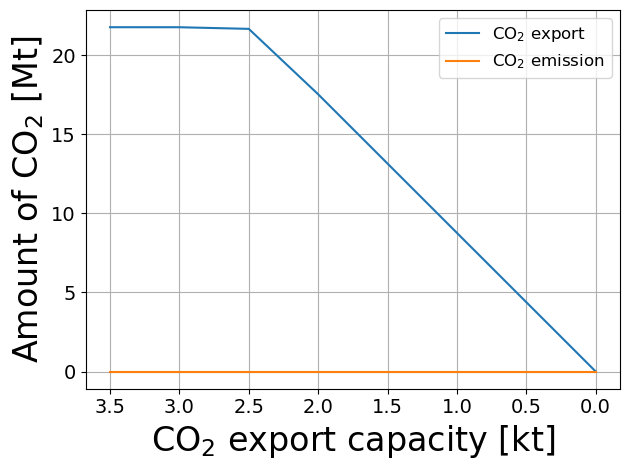

In [42]:
# CO2 emitted and exported

cluster = 'INLAND'
variable = 'total_co2_emitted'

co2_emission = {}
for value in h2_cost:
    co2_emission[value] = 0 #round(sum(get_cluster_variable(cluster,variable,dictionaries[scenario][value])['values'])/1000,2) - round(sum(get_cluster_variable(cluster,variable,dictionaries[scenario][value])['values'])/1000,2)
    

cluster = 'INLAND'
element = 'CO2_EXPORT'
variable = 'exported'

co2_export = {}   
for value in h2_cost:    
    co2_export[value] = round(sum(get_cluster_element_variable(cluster,element,variable,dictionaries[scenario][value])['values']),2)/1000

evolution_co2 = dict()
for value in h2_cost:
    evolution_co2[value] = dict()
    evolution_co2[value]['CO$_2$ export'] = co2_export[value]
    evolution_co2[value]['CO$_2$ emission'] = co2_emission[value]
    
print(transform_into_table(evolution_co2))    
transform_into_table(evolution_co2).plot()
plt.xlabel('CO$_2$ export capacity [kt]', fontsize = 24)
plt.ylabel('Amount of CO$_2$ [Mt]', fontsize = 24)
plt.grid()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize = 12)
plt.gca().invert_xaxis()
plt.tight_layout()
plt.savefig('C:\\Users\\jocel\\OneDrive\\Doctorat\\My papers\\Impact of wind offshore on the Belgium energy system\\Article\\Images\\' + scenario + '_co2' + '.pdf',dpi=600)
plt.show()

# Coût import H2 pour high renew 

In [138]:
# Load json files

h2_cost = [0.075,0.1,0.10625,0.1125,0.125,0.15] #,0.2,0.3]
scenario = 'Inf_renew_cost_h2'
titles = []
for value in h2_cost:
    titles.append(scenario + '_' + str(value))

dictionaries = {}
dictionaries[scenario] = {}
for value in h2_cost:
    
    name_file = '3_clusters_Belgium_'+ scenario + '_' + str(value)
    name_output = name_file
    file_path = 'C:/Users/jocel/Documents/Doctorat/3_clusters/' + name_file + '.json' # path to the json file
    
    with open (file_path, 'r') as myfile:
        data = myfile.read()
        
    # parse file
    dictionary_3C = json.loads(data)
    dictionaries[scenario][value] = {}
    dictionaries[scenario][value] = dictionary_3C

                               0.07500  0.10000  0.10625  0.11250  0.12500  \
OFFSHORE ELECTROLYSIS_PLANTS      2.07     3.63     3.43     3.29     3.19   
ZEEBRUGGE ELECTROLYSIS_PLANTS     3.28     2.32     2.39     2.25     2.32   
INLAND ELECTROLYSIS_PLANTS        0.00     1.59     1.03     0.59     0.68   
INLAND SMR                        0.00     0.00     2.16     4.50     5.10   

                               0.15000  
OFFSHORE ELECTROLYSIS_PLANTS      3.68  
ZEEBRUGGE ELECTROLYSIS_PLANTS     2.04  
INLAND ELECTROLYSIS_PLANTS        0.22  
INLAND SMR                        5.94  


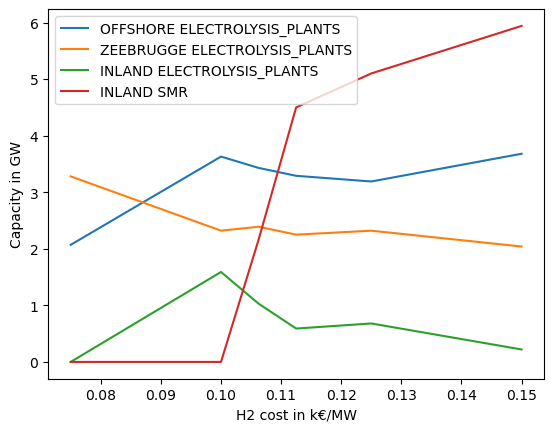

In [84]:
# graph capacities h2

scenario = 'Inf_renew_cost_h2'
clusters = ['OFFSHORE', 'ZEEBRUGGE','INLAND']
element = 'ELECTROLYSIS_PLANTS'
variable = 'new_capacity'

evolution_h2[variable] = {}

for cluster in clusters:
    evolution_h2[variable][cluster + ' ' +  element] = {}   
    for value in h2_cost:    
        evolution_h2[variable][cluster + ' ' +  element][value] = round(get_cluster_element_variable(cluster,element,variable,dictionaries[scenario][value])['values'][0],2)

cluster = 'INLAND'
element = 'SMR'
evolution_h2[variable][cluster + ' ' +  element] = {}  
for value in h2_cost:    
    evolution_h2[variable][cluster + ' ' +  element][value] = round(get_cluster_element_variable(cluster,element,variable,dictionaries[scenario][value])['values'][0],2)

print(transform_into_table(evolution_h2[variable]))
transform_into_table(evolution_h2[variable]).transpose().plot()
plt.xlabel('H2 cost in k€/MW')
plt.ylabel('Capacity in GW')
plt.savefig('C:\\Users\\jocel\\OneDrive\\Doctorat\\My papers\\Impact of wind offshore on the Belgium energy system\\Article\\Images\\' + scenario + '_h2_cap'+ '.pdf',dpi=600)
plt.show()


                               0.07500   0.10000   0.10625   0.11250  \
OFFSHORE ELECTROLYSIS_PLANTS   7234.15  12941.23  12597.43  12188.51   
ZEEBRUGGE ELECTROLYSIS_PLANTS  7837.13   5099.37   5377.30   5067.36   
INLAND ELECTROLYSIS_PLANTS        0.00   3439.97   2261.64   1315.87   

                                0.12500   0.15000  
OFFSHORE ELECTROLYSIS_PLANTS   11348.51  11572.21  
ZEEBRUGGE ELECTROLYSIS_PLANTS   4968.48   3973.34  
INLAND ELECTROLYSIS_PLANTS      1449.63    449.25  


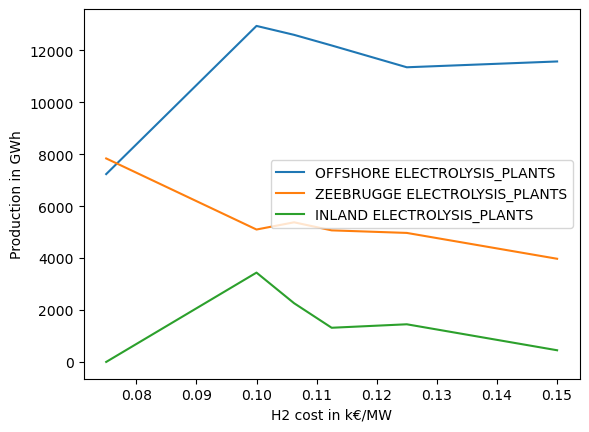

                               0.07500   0.10000   0.10625   0.11250  \
ELECTROLYSIS_PLANTS           15071.28  21480.57  20236.37  18571.74   
INLAND SMR                        0.00      0.00  18137.71  36811.96   
INLAND H2_INTERCONNECTION_NL  62626.56  56224.22  39330.36  22358.36   

                               0.12500   0.15000  
ELECTROLYSIS_PLANTS           17766.62  15994.80  
INLAND SMR                    41191.22  47526.69  
INLAND H2_INTERCONNECTION_NL  18792.24  14232.99  


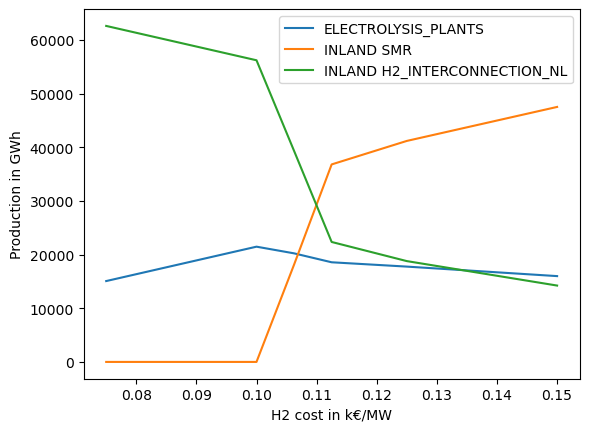

In [85]:
# graph production h2

scenario = 'Inf_renew_cost_h2'
clusters = ['OFFSHORE', 'ZEEBRUGGE','INLAND']
element = 'ELECTROLYSIS_PLANTS'
variable = 'h2_produced'

evolution_ep[variable] = {}

for cluster in clusters:
    evolution_ep[variable][cluster + ' ' +  element] = {}   
    for value in h2_cost:    
        evolution_ep[variable][cluster + ' ' +  element][value] = round(sum(get_cluster_element_variable(cluster,element,variable,dictionaries[scenario][value])['values']),2)

print(transform_into_table(evolution_ep['h2_produced']))    
transform_into_table(evolution_ep['h2_produced']).transpose().plot()
plt.xlabel('H2 cost in k€/MW')
plt.ylabel('Production in GWh')
plt.savefig('C:\\Users\\jocel\\OneDrive\\Doctorat\\My papers\\Impact of wind offshore on the Belgium energy system\\Article\\Images\\' + scenario + '_ep_prod'+ '.pdf',dpi=600)
plt.show()

evolution_h2[variable] = {}
evolution_h2[variable]['ELECTROLYSIS_PLANTS'] = {}
for value in h2_cost:
    evolution_h2[variable]['ELECTROLYSIS_PLANTS'][value] = sum(evolution_ep[variable][i][value] for i in evolution_ep[variable])

cluster = 'INLAND'
element = 'SMR'
evolution_h2[variable][cluster + ' ' +  element] = {}  
for value in h2_cost:    
    evolution_h2[variable][cluster + ' ' +  element][value] = round(sum(get_cluster_element_variable(cluster,element,variable,dictionaries[scenario][value])['values']),2)

element = 'H2_INTERCONNECTION_NL'
variable_d = 'imported'
evolution_h2['h2_produced'][cluster + ' ' +  element] = {}  
for value in h2_cost:    
    evolution_h2[variable][cluster + ' ' +  element][value] = round(sum(get_cluster_element_variable(cluster,element,variable_d,dictionaries[scenario][value])['values']),2)

    

print(transform_into_table(evolution_h2['h2_produced']))    
transform_into_table(evolution_h2['h2_produced']).transpose().plot()
plt.xlabel('H2 cost in k€/MW')
plt.ylabel('Production in GWh')
plt.savefig('C:\\Users\\jocel\\OneDrive\\Doctorat\\My papers\\Impact of wind offshore on the Belgium energy system\\Article\\Images\\' + scenario + '_h2_prod'+ '.pdf',dpi=600)
plt.show()

                0.07500  0.10000  0.10625  0.11250  0.12500  0.15000
HV_OFF_ZB          3.12     1.61     1.41     1.44     1.83     2.33
HV_ZB_INL          2.58     2.31     2.23     2.28     2.47     2.93
PIPE_H2_OFF_ZB     2.07     3.63     3.43     3.29     3.19     3.68
PIPE_H2_ZB_INL     5.34     5.96     5.81     5.54     5.50     5.70


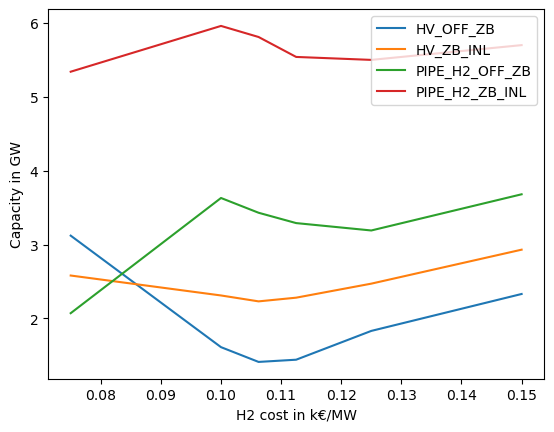

In [94]:
# graph capacities interconnection
scenario = 'Inf_renew_cost_h2'
clusters = ['HV_OFF_ZB','HV_ZB_INL']
variable = 'new_capacity'
evolution_inter[variable] = {}
for cluster in clusters:
    evolution_inter[variable][cluster] = {}
    for value in h2_cost:
        evolution_inter[variable][cluster][value] = round(get_cluster_variable(cluster,variable,dictionaries[scenario][value])['values'][0],2)

clusters = ['PIPE_H2_OFF_ZB','PIPE_H2_ZB_INL']
variable = 'new_capacity'
variable_v = 'new_capacity_forward'
for cluster in clusters:
    evolution_inter[variable][cluster] = {}
    for value in h2_cost:
        evolution_inter[variable][cluster][value] = round(get_cluster_variable(cluster,variable_v,dictionaries[scenario][value])['values'][0],2)

print(transform_into_table(evolution_inter[variable]))
transform_into_table(evolution_inter[variable]).transpose().plot()
plt.xlabel('H2 cost in k€/MW')
plt.ylabel('Capacity in GW')
plt.savefig('C:\\Users\\jocel\\OneDrive\\Doctorat\\My papers\\Impact of wind offshore on the Belgium energy system\\Article\\Images\\' + scenario + '_inter_cap'+ '.pdf',dpi=600)
plt.show()

                 0.07500   0.10000   0.10625   0.11250   0.12500   0.15000
HV_OFF_ZB       22343.49  15936.10  16135.63  16465.76  17749.96  17809.60
HV_ZB_INL       19268.27  15711.99  15898.86  16717.43  17830.21  19167.98
PIPE_H2_OFF_ZB   7234.15  12941.23  12597.43  12188.51  11348.51  11572.21
PIPE_H2_ZB_INL  15065.50  18030.24  17964.66  17246.12  16307.91  15530.60


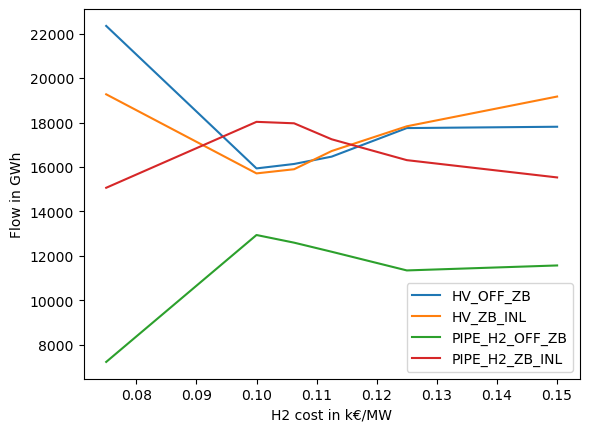

In [93]:
# graph production interconnection
scenario = 'Inf_renew_cost_h2'
clusters = ['HV_OFF_ZB','HV_ZB_INL']
variable = 'forward'
variable_v = 'e_forward_in'
evolution_inter[variable] = {}
for cluster in clusters:
    evolution_inter[variable][cluster] = {}
    for value in h2_cost:
        evolution_inter[variable][cluster][value] = round(sum(get_cluster_variable(cluster,variable_v,dictionaries[scenario][value])['values']),2)

clusters = ['PIPE_H2_OFF_ZB','PIPE_H2_ZB_INL']
variable = 'forward'
variable_v = 'flow_forward_in'
for cluster in clusters:
    evolution_inter[variable][cluster] = {}
    for value in h2_cost:
        evolution_inter[variable][cluster][value] = round(sum(get_cluster_variable(cluster,variable_v,dictionaries[scenario][value])['values']),2)

print(transform_into_table(evolution_inter[variable]))
transform_into_table(evolution_inter[variable]).transpose().plot()
plt.xlabel('H2 cost in k€/MW')
plt.ylabel('Flow in GWh')
plt.savefig('C:\\Users\\jocel\\OneDrive\\Doctorat\\My papers\\Impact of wind offshore on the Belgium energy system\\Article\\Images\\' + scenario + '_inter_prod'+ '.pdf',dpi=600)
plt.show()

             0.07500  0.10000  0.10625  0.11250  0.12500  0.15000
INLAND PV      28.22    29.00    29.14    29.84    32.73    37.98
INLAND CCGT    10.84    11.62    11.75    11.70    11.41    10.77


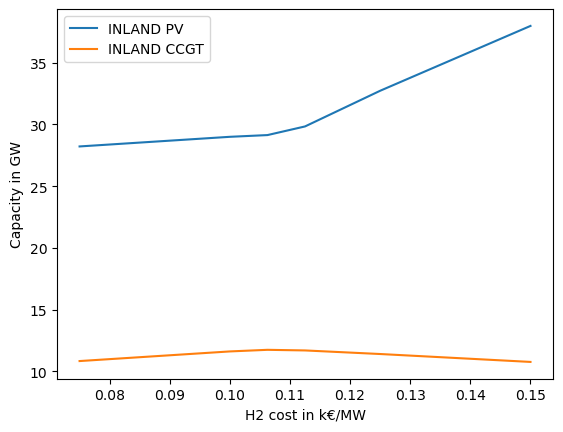

In [92]:
# graph capacities elec

scenario = 'Inf_renew_cost_h2'
cluster = 'INLAND'
elements = ['PV','CCGT']
variable = 'new_capacity'

evolution_elec = {}
evolution_elec[variable] = {}

for element in elements:
    evolution_elec[variable][cluster + ' ' +  element] = {}   
    for value in h2_cost:    
        evolution_elec[variable][cluster + ' ' +  element][value] = round(get_cluster_element_variable(cluster,element,variable,dictionaries[scenario][value])['values'][0],2)

# cluster = 'OFFSHORE'
# elements = ['WIND_OFFSHORE']
# variable = 'new_capacity'

# for element in elements:
#     evolution_elec[variable][cluster + ' ' +  element] = {}   
#     for value in h2_cost:    
#         evolution_elec[variable][cluster + ' ' +  element][value] = round(get_cluster_element_variable(cluster,element,variable,dictionaries[scenario][value])['values'][0],2)

print(transform_into_table(evolution_elec[variable]))
transform_into_table(evolution_elec[variable]).transpose().plot()
plt.xlabel('H2 cost in k€/MW')
plt.ylabel('Capacity in GW')
plt.savefig('C:\\Users\\jocel\\OneDrive\\Doctorat\\My papers\\Impact of wind offshore on the Belgium energy system\\Article\\Images\\' + scenario + '_elec_cap'+ '.pdf',dpi=600)
plt.show()

              0.07500   0.10000   0.10625   0.11250   0.12500   0.15000
INLAND PV    28981.51  29663.02  29768.45  30383.39  32810.29  36650.27
INLAND CCGT  49112.65  55087.29  56859.45  57775.37  54804.16  49677.52


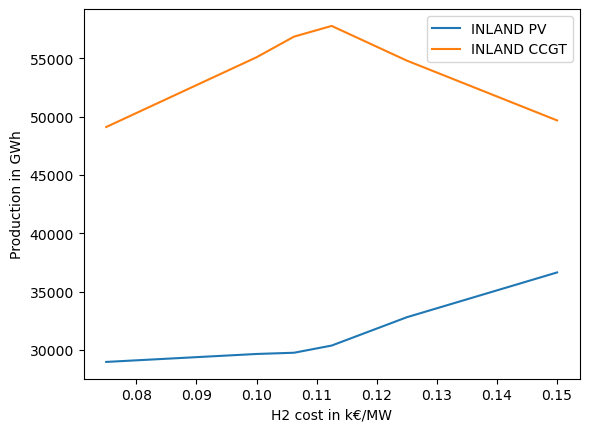

In [91]:
# graph elec production

scenario = 'Inf_renew_cost_h2'
cluster = 'INLAND'
elements = ['PV','CCGT']
variable = 'e_produced'

evolution_elec[variable] = {}
for element in elements:
    evolution_elec[variable][cluster + ' ' +  element] = {}   
    for value in h2_cost:    
        evolution_elec[variable][cluster + ' ' +  element][value] = round(sum(get_cluster_element_variable(cluster,element,variable,dictionaries[scenario][value])['values']),2)

# cluster = 'OFFSHORE'
# elements = ['WIND_OFFSHORE']
# variable = 'e_produced'

# for element in elements:
#     evolution_elec[variable][cluster + ' ' +  element] = {}   
#     for value in h2_cost:    
#         evolution_elec[variable][cluster + ' ' +  element][value] = round(sum(get_cluster_element_variable(cluster,element,variable,dictionaries[scenario][value])['values']),2)

print(transform_into_table(evolution_elec['e_produced']))
transform_into_table(evolution_elec['e_produced']).transpose().plot()
plt.xlabel('H2 cost in k€/MW')
plt.ylabel('Production in GWh')
plt.savefig('C:\\Users\\jocel\\OneDrive\\Doctorat\\My papers\\Impact of wind offshore on the Belgium energy system\\Article\\Images\\' + scenario + '_elec_prod' + '.pdf',dpi=600)
plt.show()

                    0.07500   0.10000   0.10625   0.11250   0.12500   0.15000
INLAND CO2_EXPORT  17650.81  19662.68  25080.24  30352.08  30515.53  30473.12


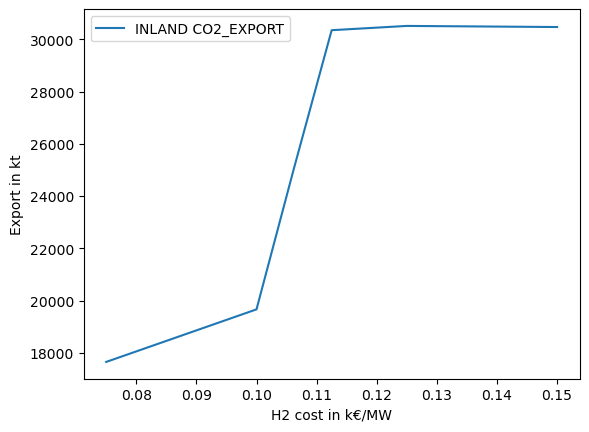

In [90]:
# CO2 export

scenario = 'Inf_renew_cost_h2'
cluster = 'INLAND'
elements = ['CO2_EXPORT']
variable = 'exported'

evolution_elec[variable] = {}
for element in elements:
    evolution_elec[variable][cluster + ' ' +  element] = {}   
    for value in h2_cost:    
        evolution_elec[variable][cluster + ' ' +  element][value] = round(sum(get_cluster_element_variable(cluster,element,variable,dictionaries[scenario][value])['values']),2)

print(transform_into_table(evolution_elec['exported']))
transform_into_table(evolution_elec['exported']).transpose().plot()
plt.xlabel('H2 cost in k€/MW')
plt.ylabel('Export in kt')
plt.savefig('C:\\Users\\jocel\\OneDrive\\Doctorat\\My papers\\Impact of wind offshore on the Belgium energy system\\Article\\Images\\' + scenario + '_co2_exp' + '.pdf',dpi=600)
plt.show()

# Distance Offshore - Zeebrugge pour high renew

In [4]:
# Load json files

h2_cost = [50,100,150,200,300,400,500,1000]
scenario = 'Inf_renew_DC_off_zb'
titles = []
for value in h2_cost:
    titles.append(scenario + '_' + str(value))

dictionaries = {}
dictionaries[scenario] = {}
for value in h2_cost:
    
    name_file = '3_clusters_Belgium_'+ scenario + '_' + str(value)
    name_output = name_file
    file_path = 'C:/Users/jocel/Documents/Doctorat/3_clusters/' + name_file + '.json' # path to the json file
    
    with open (file_path, 'r') as myfile:
        data = myfile.read()
        
    # parse file
    dictionary_3C = json.loads(data)
    dictionaries[scenario][value] = {}
    dictionaries[scenario][value] = dictionary_3C

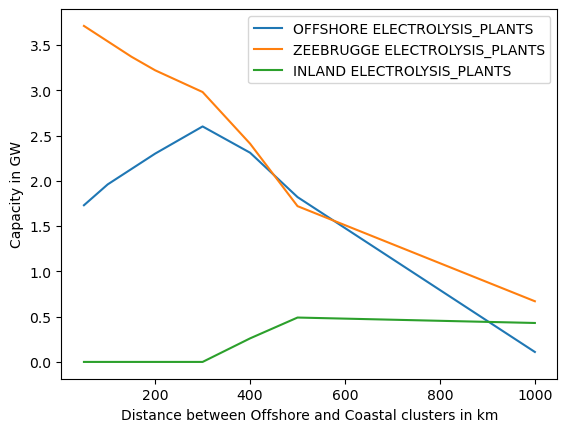

In [5]:
# graph capacities h2

scenario = 'Inf_renew_DC_off_zb'
clusters = ['OFFSHORE', 'ZEEBRUGGE','INLAND']
element = 'ELECTROLYSIS_PLANTS'
variable = 'new_capacity'

evolution_h2 = {}
evolution_h2[variable] = {}

for cluster in clusters:
    evolution_h2[variable][cluster + ' ' +  element] = {}   
    for value in h2_cost:    
        evolution_h2[variable][cluster + ' ' +  element][value] = round(get_cluster_element_variable(cluster,element,variable,dictionaries[scenario][value])['values'][0],2)

transform_into_table(evolution_h2[variable]).transpose().plot()
plt.xlabel('Distance between Offshore and Coastal clusters in km')
plt.ylabel('Capacity in GW')
plt.savefig('C:\\Users\\jocel\\OneDrive\\Doctorat\\My papers\\Impact of wind offshore on the Belgium energy system\\Article\\Images\\' + scenario + '_h2_cap'+ '.pdf',dpi=600)
plt.show()

                                  50       100      150      200      300   \
OFFSHORE ELECTROLYSIS_PLANTS   5960.72  6745.78  7336.66  8013.11  9125.57   
ZEEBRUGGE ELECTROLYSIS_PLANTS  8997.23  8536.54  8092.43  7623.80  7005.16   
INLAND ELECTROLYSIS_PLANTS        0.00     0.00     0.00     0.00     0.00   

                                  400      500      1000  
OFFSHORE ELECTROLYSIS_PLANTS   8077.11  6349.40   355.94  
ZEEBRUGGE ELECTROLYSIS_PLANTS  5595.03  3875.90  1308.57  
INLAND ELECTROLYSIS_PLANTS      587.44  1074.34   934.95  


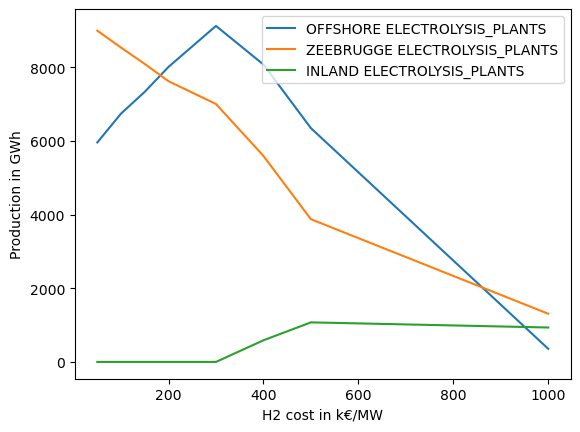

                                  50        100       150       200   \
ELECTROLYSIS_PLANTS           14957.95  15282.32  15429.09  15636.91   
INLAND SMR                        0.00      0.00      0.00      0.00   
INLAND H2_INTERCONNECTION_NL  62738.78  62415.29  62269.11  62062.00   

                                  300       400       500       1000  
ELECTROLYSIS_PLANTS           16130.73  14259.58  11299.64   2599.46  
INLAND SMR                        0.00      0.00      0.00      0.00  
INLAND H2_INTERCONNECTION_NL  61569.47  63437.81  66393.62  75082.16  


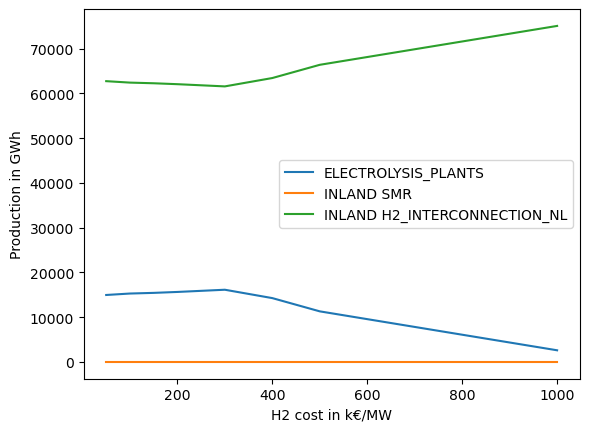

In [6]:
# graph production h2

scenario = 'Inf_renew_DC_off_zb'
clusters = ['OFFSHORE', 'ZEEBRUGGE','INLAND']
element = 'ELECTROLYSIS_PLANTS'
variable = 'h2_produced'

evolution_ep[variable] = {}

for cluster in clusters:
    evolution_ep[variable][cluster + ' ' +  element] = {}   
    for value in h2_cost:    
        evolution_ep[variable][cluster + ' ' +  element][value] = round(sum(get_cluster_element_variable(cluster,element,variable,dictionaries[scenario][value])['values']),2)

print(transform_into_table(evolution_ep['h2_produced']))    
transform_into_table(evolution_ep['h2_produced']).transpose().plot()
plt.xlabel('H2 cost in k€/MW')
plt.ylabel('Production in GWh')
plt.savefig('C:\\Users\\jocel\\OneDrive\\Doctorat\\My papers\\Impact of wind offshore on the Belgium energy system\\Article\\Images\\' + scenario + '_ep_prod'+ '.pdf',dpi=600)
plt.show()

evolution_h2[variable] = {}
evolution_h2[variable]['ELECTROLYSIS_PLANTS'] = {}
for value in h2_cost:
    evolution_h2[variable]['ELECTROLYSIS_PLANTS'][value] = sum(evolution_ep[variable][i][value] for i in evolution_ep[variable])

cluster = 'INLAND'
element = 'SMR'
evolution_h2[variable][cluster + ' ' +  element] = {}  
for value in h2_cost:    
    evolution_h2[variable][cluster + ' ' +  element][value] = round(sum(get_cluster_element_variable(cluster,element,variable,dictionaries[scenario][value])['values']),2)

element = 'H2_INTERCONNECTION_NL'
variable_d = 'imported'
evolution_h2['h2_produced'][cluster + ' ' +  element] = {}  
for value in h2_cost:    
    evolution_h2[variable][cluster + ' ' +  element][value] = round(sum(get_cluster_element_variable(cluster,element,variable_d,dictionaries[scenario][value])['values']),2)

    

print(transform_into_table(evolution_h2['h2_produced']))    
transform_into_table(evolution_h2['h2_produced']).transpose().plot()
plt.xlabel('H2 cost in k€/MW')
plt.ylabel('Production in GWh')
plt.savefig('C:\\Users\\jocel\\OneDrive\\Doctorat\\My papers\\Impact of wind offshore on the Belgium energy system\\Article\\Images\\' + scenario + '_h2_prod'+ '.pdf',dpi=600)
plt.show()

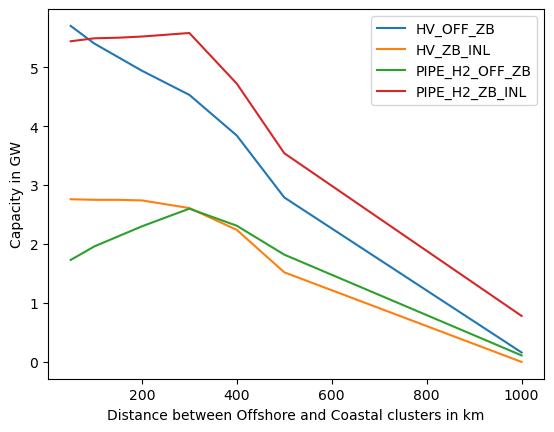

In [7]:
# graph capacities interconnection
scenario = 'Inf_renew_DC_off_zb'
clusters = ['HV_OFF_ZB','HV_ZB_INL']
variable = 'new_capacity'
evolution_inter[variable] = {}
for cluster in clusters:
    evolution_inter[variable][cluster] = {}
    for value in h2_cost:
        evolution_inter[variable][cluster][value] = round(get_cluster_variable(cluster,variable,dictionaries[scenario][value])['values'][0],2)

clusters = ['PIPE_H2_OFF_ZB','PIPE_H2_ZB_INL']
variable = 'new_capacity'
variable_v = 'new_capacity_forward'
for cluster in clusters:
    evolution_inter[variable][cluster] = {}
    for value in h2_cost:
        evolution_inter[variable][cluster][value] = round(get_cluster_variable(cluster,variable_v,dictionaries[scenario][value])['values'][0],2)

transform_into_table(evolution_inter[variable]).transpose().plot()
plt.xlabel('Distance between Offshore and Coastal clusters in km')
plt.ylabel('Capacity in GW')
plt.savefig('C:\\Users\\jocel\\OneDrive\\Doctorat\\My papers\\Impact of wind offshore on the Belgium energy system\\Article\\Images\\' + scenario + '_inter_cap'+ '.pdf',dpi=600)
plt.show()

                    50        100       150       200       300       400   \
HV_OFF_ZB       24057.07  23036.47  22283.45  21427.94  20036.25  17117.51   
HV_ZB_INL       20401.23  20036.22  19847.11  19600.68  19031.90  17516.94   
PIPE_H2_OFF_ZB   5960.72   6745.78   7336.66   8013.11   9125.57   8077.11   
PIPE_H2_ZB_INL  14953.18  15276.93  15423.23  15630.51  16123.43  13665.68   

                    500      1000  
HV_OFF_ZB       12653.01   779.32  
HV_ZB_INL       14823.26  6559.87  
PIPE_H2_OFF_ZB   6349.40   355.94  
PIPE_H2_ZB_INL  10220.22  1664.22  


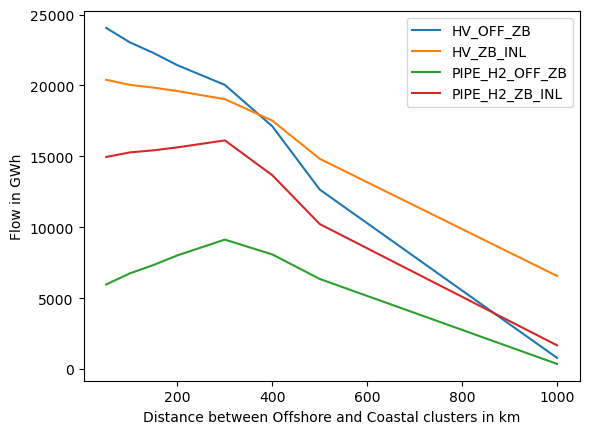

In [8]:
# graph production interconnection
scenario = 'Inf_renew_DC_off_zb'
clusters = ['HV_OFF_ZB','HV_ZB_INL']
variable = 'forward'
variable_v = 'e_forward_in'
evolution_inter[variable] = {}
for cluster in clusters:
    evolution_inter[variable][cluster] = {}
    for value in h2_cost:
        evolution_inter[variable][cluster][value] = round(sum(get_cluster_variable(cluster,variable_v,dictionaries[scenario][value])['values']),2)

clusters = ['PIPE_H2_OFF_ZB','PIPE_H2_ZB_INL']
variable = 'forward'
variable_v = 'flow_forward_in'
for cluster in clusters:
    evolution_inter[variable][cluster] = {}
    for value in h2_cost:
        evolution_inter[variable][cluster][value] = round(sum(get_cluster_variable(cluster,variable_v,dictionaries[scenario][value])['values']),2)

print(transform_into_table(evolution_inter[variable]))
transform_into_table(evolution_inter[variable]).transpose().plot()
plt.xlabel('Distance between Offshore and Coastal clusters in km')
plt.ylabel('Flow in GWh')
plt.savefig('C:\\Users\\jocel\\OneDrive\\Doctorat\\My papers\\Impact of wind offshore on the Belgium energy system\\Article\\Images\\' + scenario + '_inter_prod'+ '.pdf',dpi=600)
plt.show()

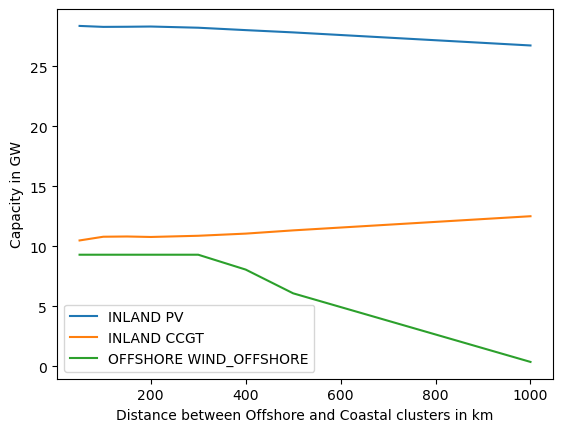

In [11]:
# graph capacities elec

scenario = 'Inf_renew_DC_off_zb'
cluster = 'INLAND'
elements = ['PV','CCGT']
variable = 'new_capacity'

evolution_elec = {}
evolution_elec[variable] = {}

for element in elements:
    evolution_elec[variable][cluster + ' ' +  element] = {}   
    for value in h2_cost:    
        evolution_elec[variable][cluster + ' ' +  element][value] = round(get_cluster_element_variable(cluster,element,variable,dictionaries[scenario][value])['values'][0],2)

cluster = 'OFFSHORE'
elements = ['WIND_OFFSHORE']
variable = 'new_capacity'

for element in elements:
    evolution_elec[variable][cluster + ' ' +  element] = {}   
    for value in h2_cost:    
        evolution_elec[variable][cluster + ' ' +  element][value] = round(get_cluster_element_variable(cluster,element,variable,dictionaries[scenario][value])['values'][0],2)

transform_into_table(evolution_elec[variable]).transpose().plot()
plt.xlabel('Distance between Offshore and Coastal clusters in km')
plt.ylabel('Capacity in GW')
plt.savefig('C:\\Users\\jocel\\OneDrive\\Doctorat\\My papers\\Impact of wind offshore on the Belgium energy system\\Article\\Images\\' + scenario + '_elec_cap'+ '.pdf',dpi=600)
plt.show()

                            50        100       150       200       300   \
INLAND PV               29143.94  29066.32  29074.98  29088.21  28996.24   
INLAND CCGT             46879.10  47968.41  48188.77  48375.72  49372.58   
INLAND WIND_ONSHORE     39818.88  39801.89  39793.75  39787.64  39770.84   
OFFSHORE WIND_OFFSHORE  32087.92  32088.38  32088.21  32092.68  32106.31   

                            400       500       1000  
INLAND PV               28797.77  28590.25  27259.00  
INLAND CCGT             51600.81  55022.73  65795.65  
INLAND WIND_ONSHORE     39763.24  39691.95  38530.56  
OFFSHORE WIND_OFFSHORE  27648.28  20607.12   1132.64  


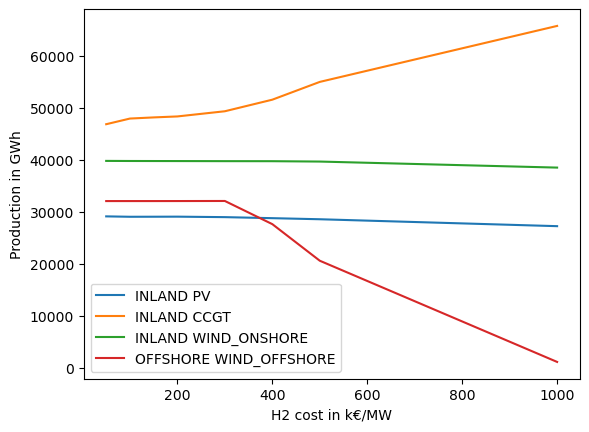

                            50        100       150      200       300   \
OFFSHORE WIND_OFFSHORE  0.393871  0.393877  0.393875  0.39393  0.394097   

                            400      500       1000  
OFFSHORE WIND_OFFSHORE  0.391588  0.38691  0.359158  


In [17]:
# graph production elec

scenario = 'Inf_renew_DC_off_zb'
cluster = 'INLAND'
elements = ['PV','CCGT','WIND_ONSHORE']
variable = 'e_produced'

evolution_elec[variable] = {}

for element in elements:
    evolution_elec[variable][cluster + ' ' +  element] = {}   
    for value in h2_cost:    
        evolution_elec[variable][cluster + ' ' +  element][value] = round(sum(get_cluster_element_variable(cluster,element,variable,dictionaries[scenario][value])['values']),2)

cluster = 'OFFSHORE'
elements = ['WIND_OFFSHORE']
variable = 'e_produced'

for element in elements:
    evolution_elec[variable][cluster + ' ' +  element] = {}   
    for value in h2_cost:    
        evolution_elec[variable][cluster + ' ' +  element][value] = round(sum(get_cluster_element_variable(cluster,element,variable,dictionaries[scenario][value])['values']),2)

print(transform_into_table(evolution_elec[variable]))
transform_into_table(evolution_elec[variable]).transpose().plot()
plt.xlabel('H2 cost in k€/MW')
plt.ylabel('Production in GWh')
plt.savefig('C:\\Users\\jocel\\OneDrive\\Doctorat\\My papers\\Impact of wind offshore on the Belgium energy system\\Article\\Images\\' + scenario + '_elec_prod' + '.pdf',dpi=600)
plt.show()

evolution_cf_elec ={}
for element in elements:
    evolution_cf_elec[cluster + ' ' +  element] = {}   
    for value in h2_cost:    
        evolution_cf_elec[cluster + ' ' +  element][value] = evolution_elec[variable][cluster + ' ' +  element][value]/(evolution_elec['new_capacity'][cluster + ' ' +  element][value]*8760) 
        
print(transform_into_table(evolution_cf_elec))

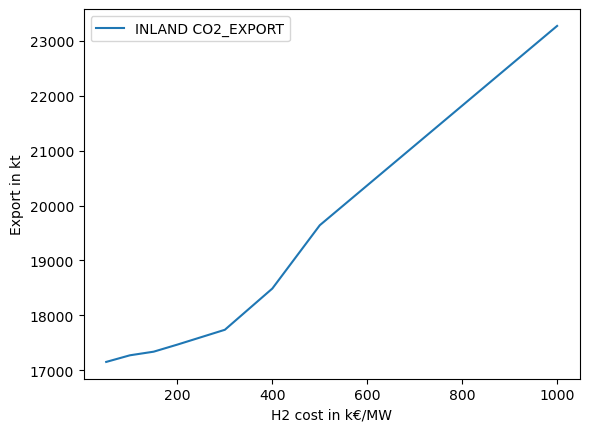

In [53]:
# CO2 export

scenario = 'Inf_renew_DC_off_zb'
cluster = 'INLAND'
elements = ['CO2_EXPORT']
variable = 'exported'

evolution_elec[variable] = {}
for element in elements:
    evolution_elec[variable][cluster + ' ' +  element] = {}   
    for value in h2_cost:    
        evolution_elec[variable][cluster + ' ' +  element][value] = round(sum(get_cluster_element_variable(cluster,element,variable,dictionaries[scenario][value])['values']),2)

transform_into_table(evolution_elec['exported']).transpose().plot()
plt.xlabel('H2 cost in k€/MW')
plt.ylabel('Export in kt')
plt.savefig('C:\\Users\\jocel\\OneDrive\\Doctorat\\My papers\\Impact of wind offshore on the Belgium energy system\\Article\\Images\\' + scenario + '_co2_exp' + '.pdf',dpi=600)
plt.show()